In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

from scipy import stats
from sklearn.linear_model import LassoCV

In [ ]:
'''it appears that our target column is the last column (SalePrice)'''

df = pd.read_csv('/content/drive/Shareddrives/machine learning /train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

#the hardest part
so the hardest part would be pre-processing the data

we want to normalize features with high values so it has the same priority as the other attributes possibly via the z-score

we want also to one-hot encode ctaegorical values although this could introduce a new problem which the number of features making hard for our model to finish training

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print(f"missing values: \n{missing_values}")

rows_num = df.shape[0]

missing_percentage = (missing_values/rows_num)*100
print(f"missing values percentage: \n{missing_percentage}")

more_than_half_missing = missing_percentage[missing_percentage >= 50]
print(f"\n\ncolumns with more than 50% missing values: \n{more_than_half_missing}")



missing values: 
PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64
missing values percentage: 
PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
MasVnrType       59.726027
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


columns with more than 50% missing values: 
PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
MasVnrType     59.726027
dtype: float64


In [ ]:
#I dont know if nan is considered as the third choice (check the word) and should be replaced or should it be omitted
#this problem arises in all of the 5 features below
df['Alley'].unique().tolist()

[nan, 'Grvl', 'Pave']

In [ ]:
for col in more_than_half_missing.index:
  print(f"{col}: {df[col].unique().tolist()}")

PoolQC: [nan, 'Ex', 'Fa', 'Gd']
MiscFeature: [nan, 'Shed', 'Gar2', 'Othr', 'TenC']
Alley: [nan, 'Grvl', 'Pave']
Fence: [nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw']
MasVnrType: ['BrkFace', nan, 'Stone', 'BrkCmn']


In [ ]:
unique_poolqc_values = df[df['PoolQC'].isnull()]['PoolArea'].unique().tolist()

print(unique_poolqc_values)

#nothing will be omitted PoolQC

[0]


In [ ]:
for col in df:
  print(f"{col}: {df[col].unique().tolist()}")

Id: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

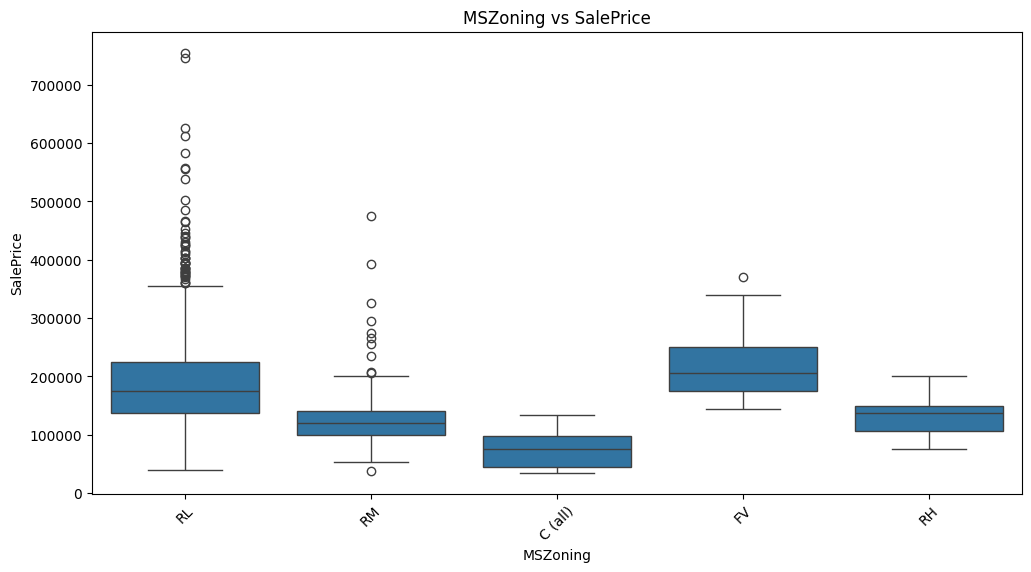

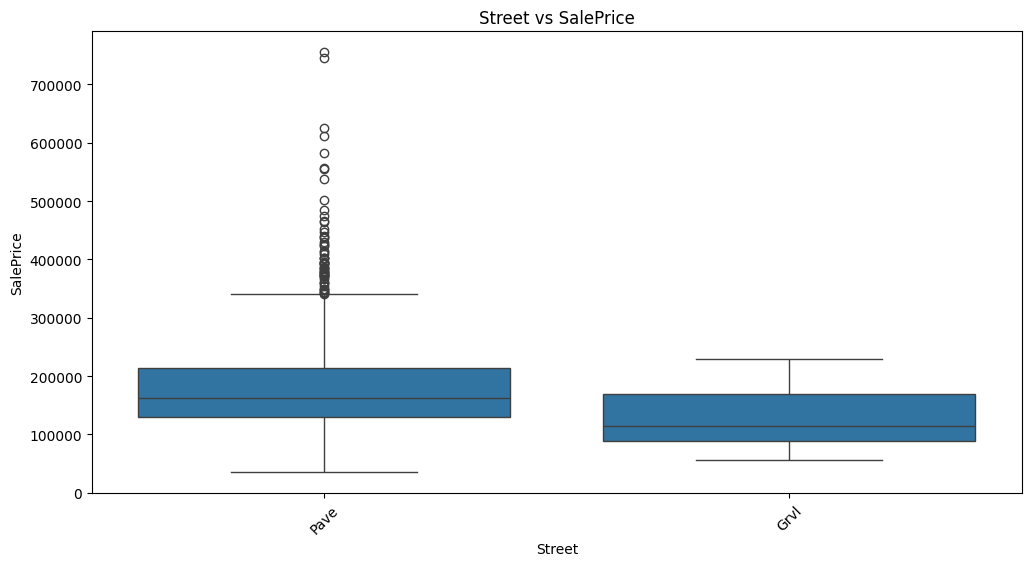

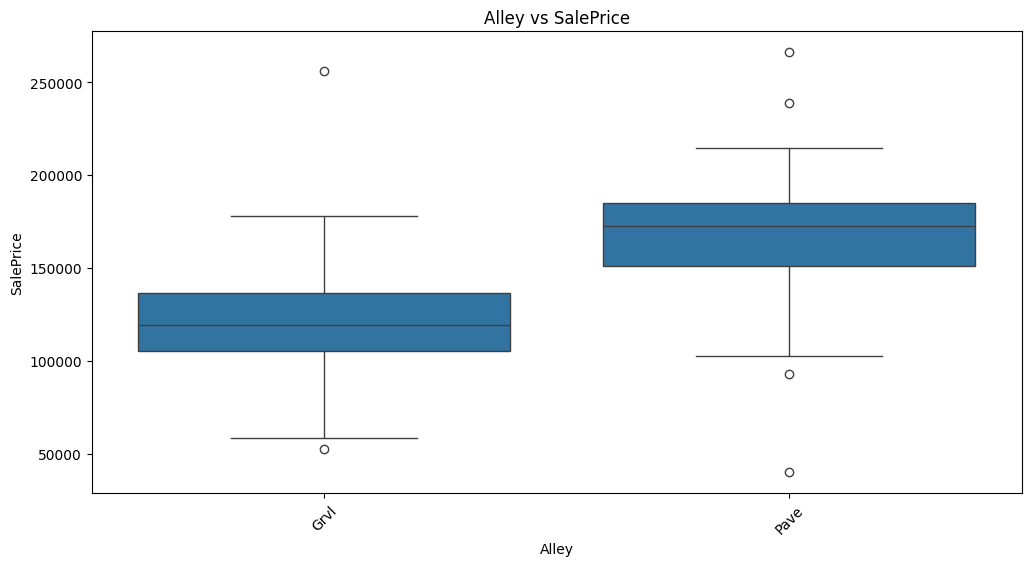

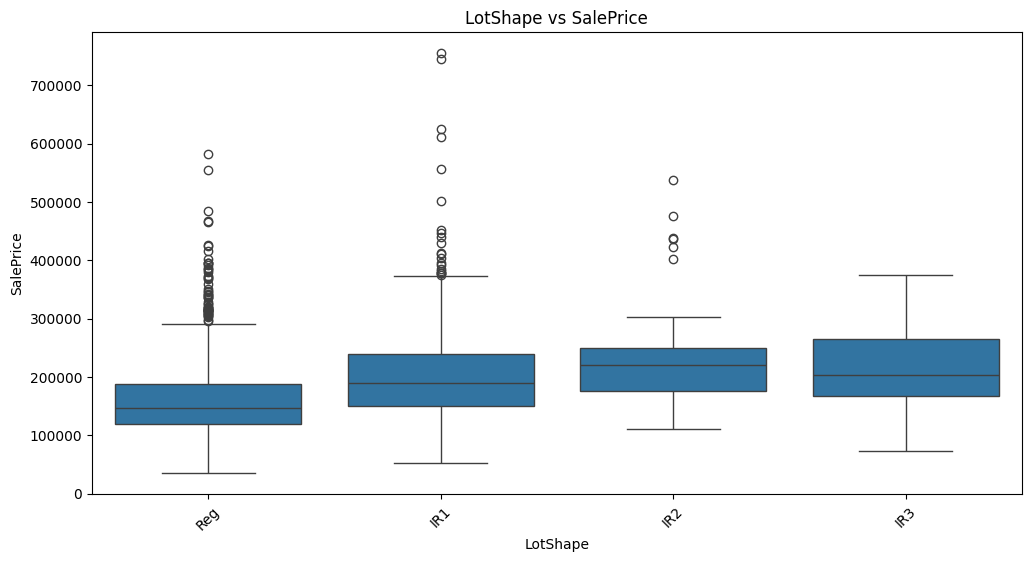

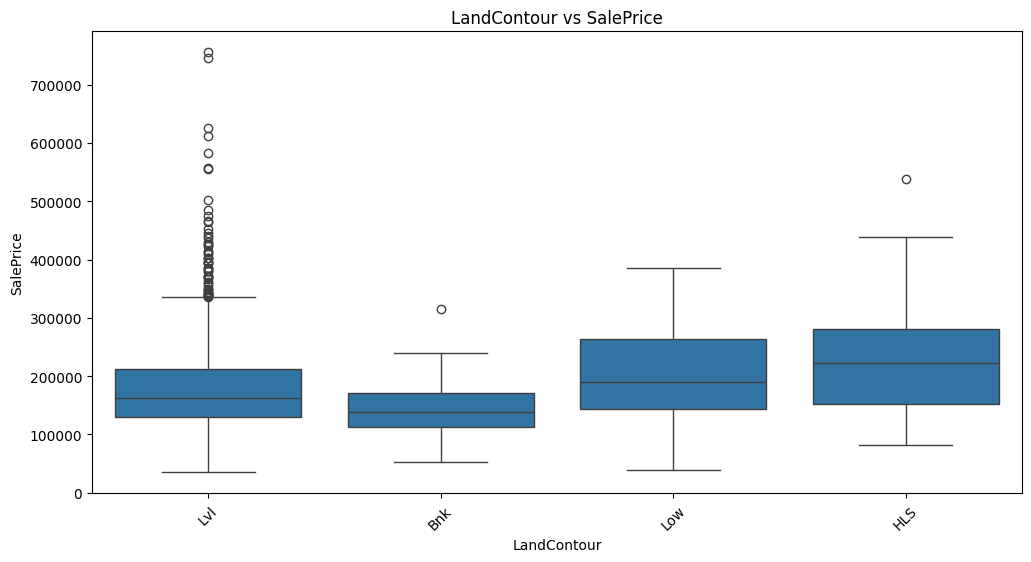

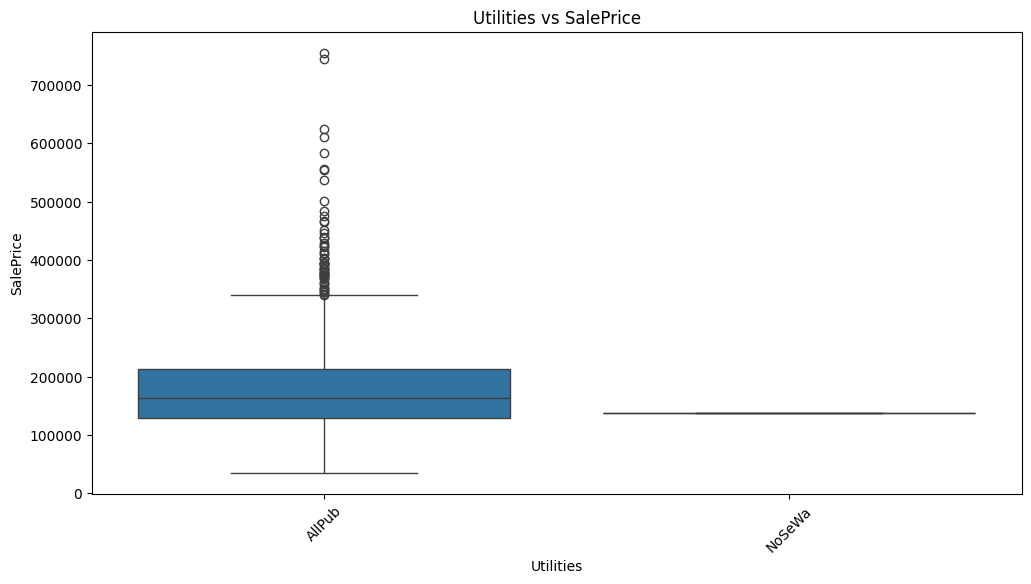

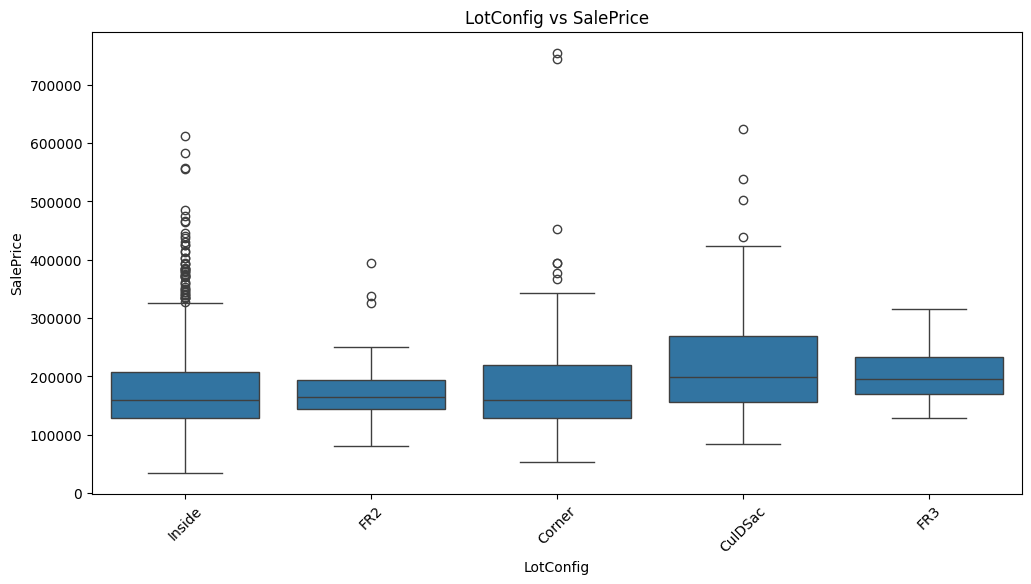

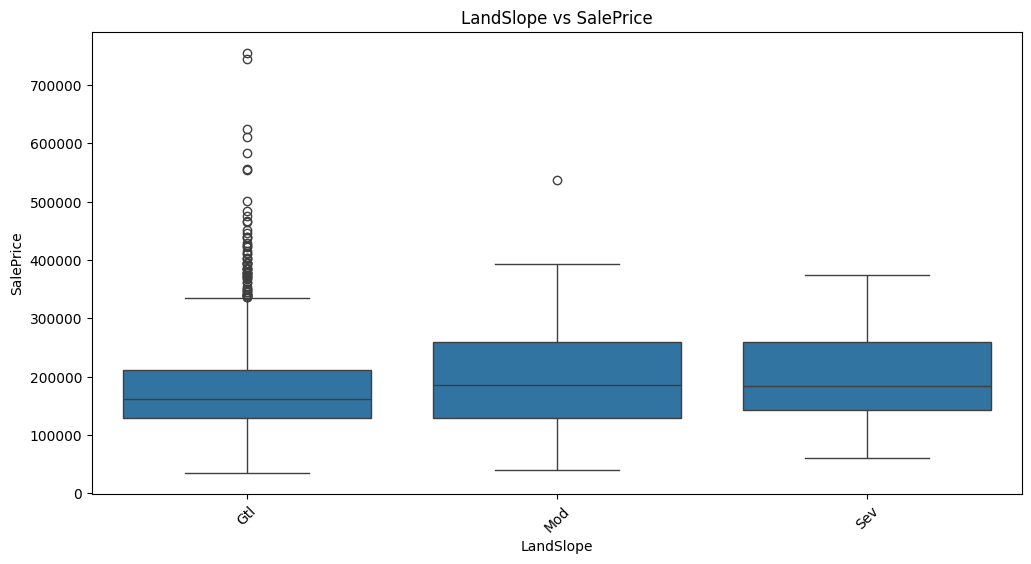

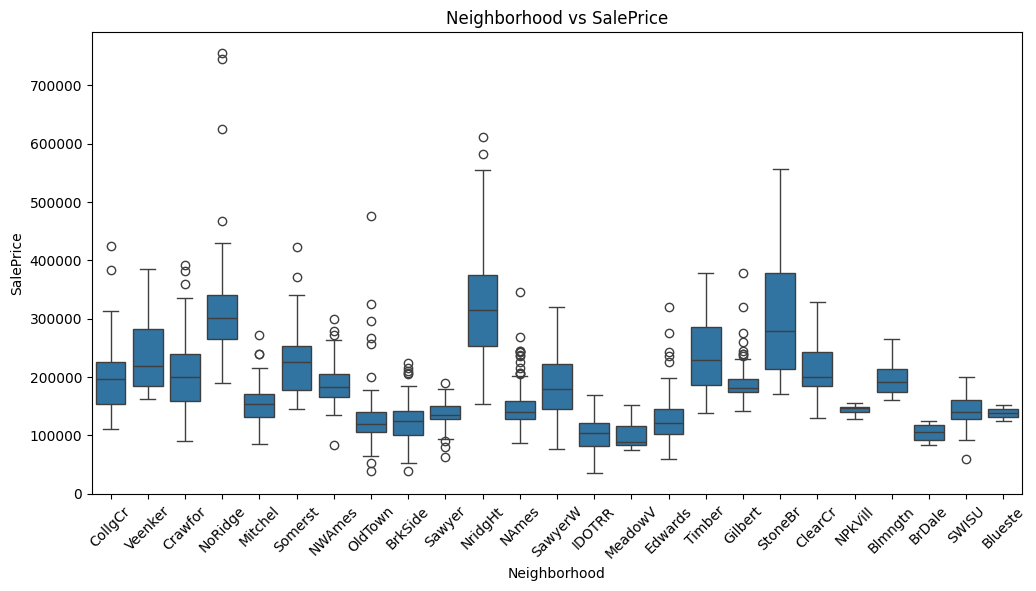

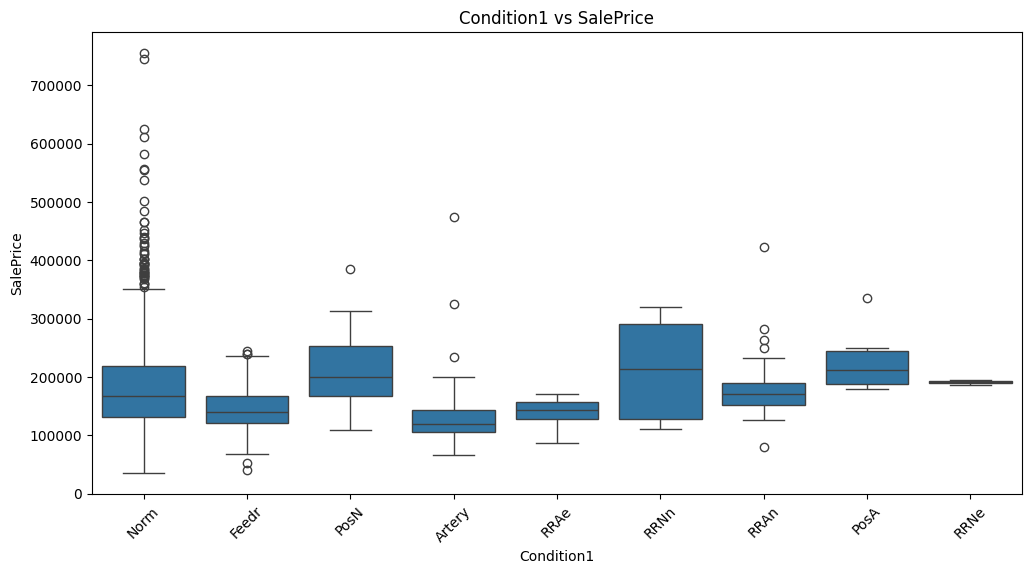

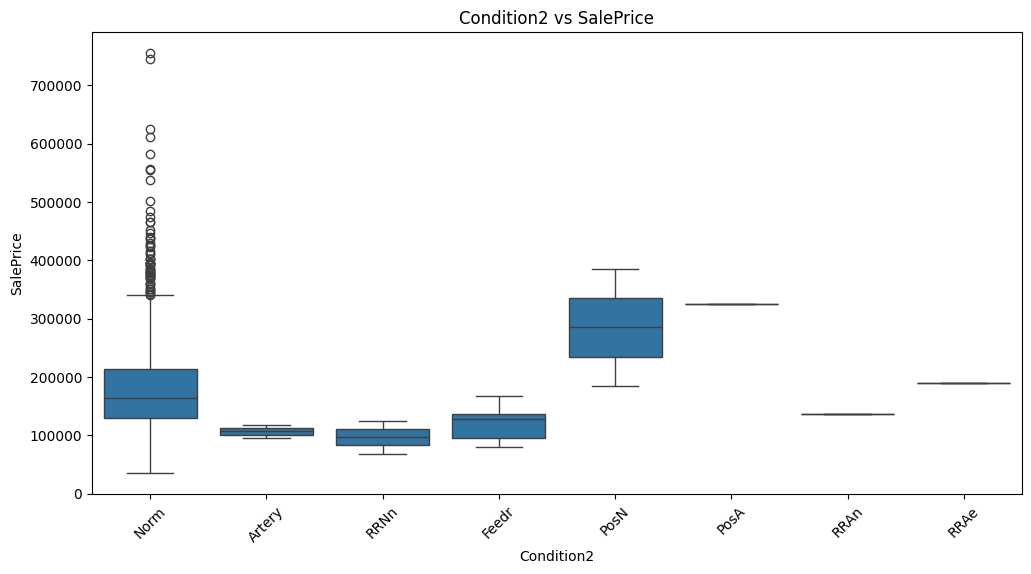

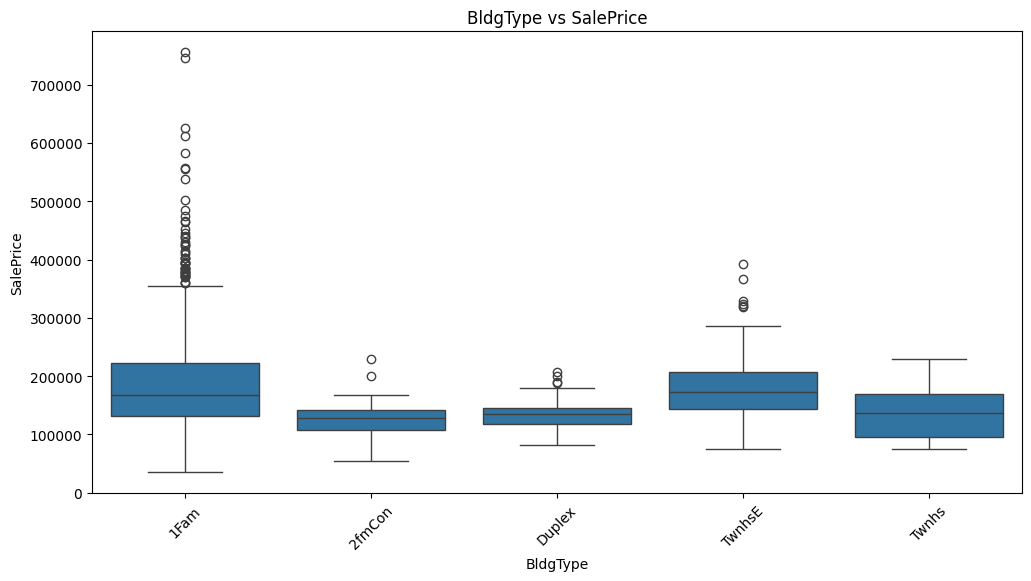

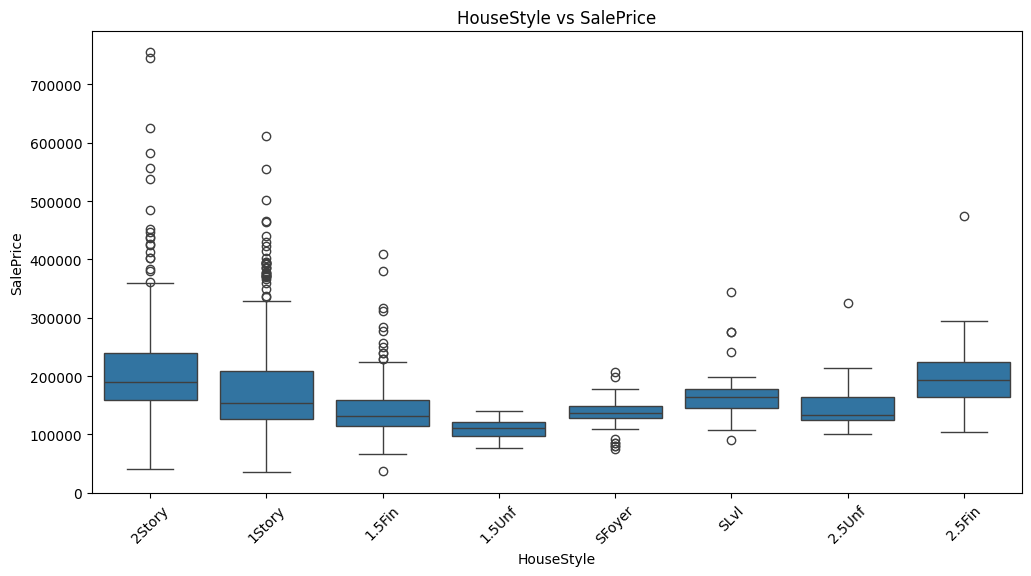

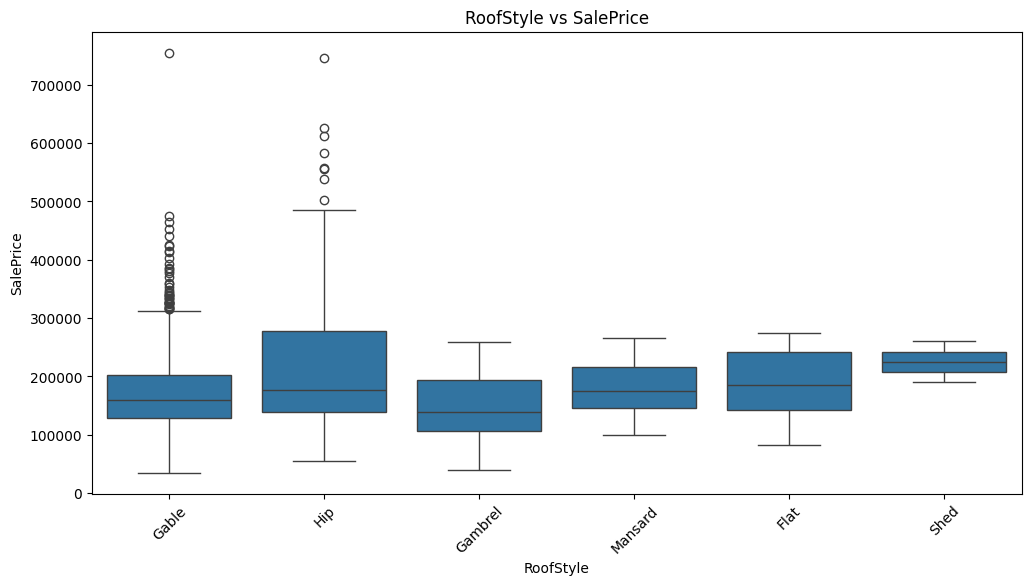

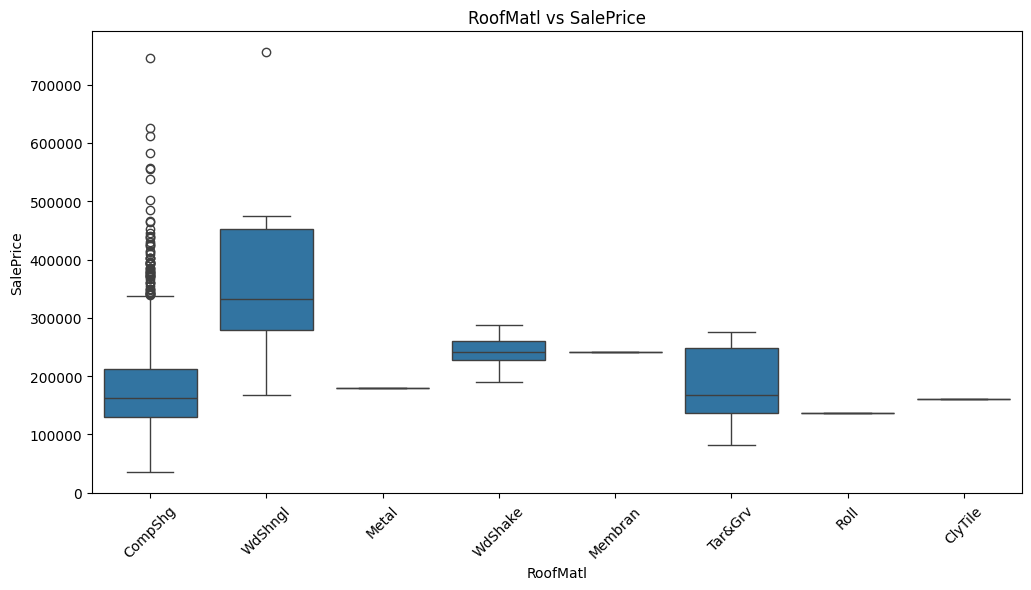

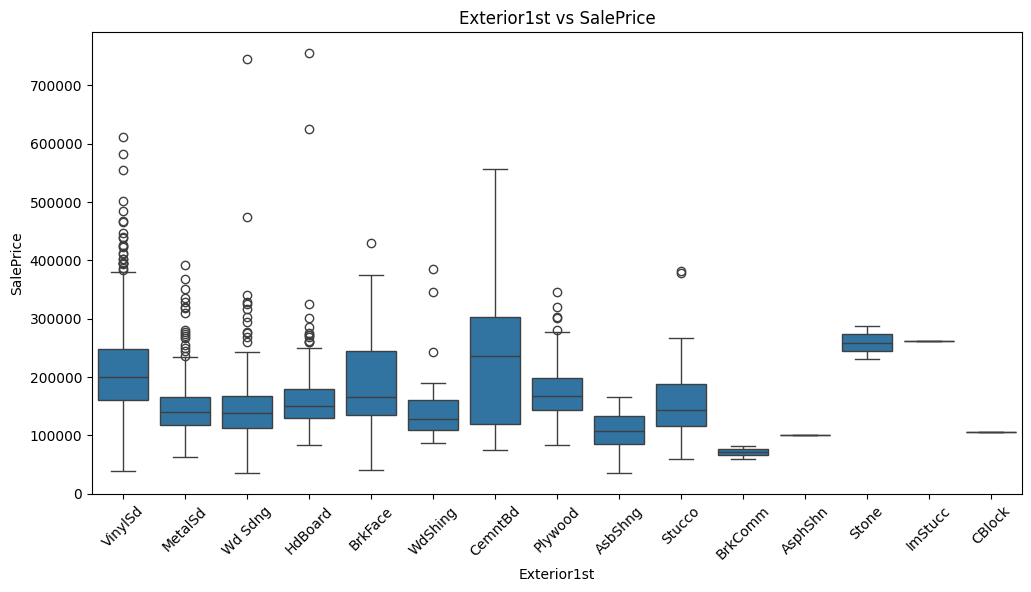

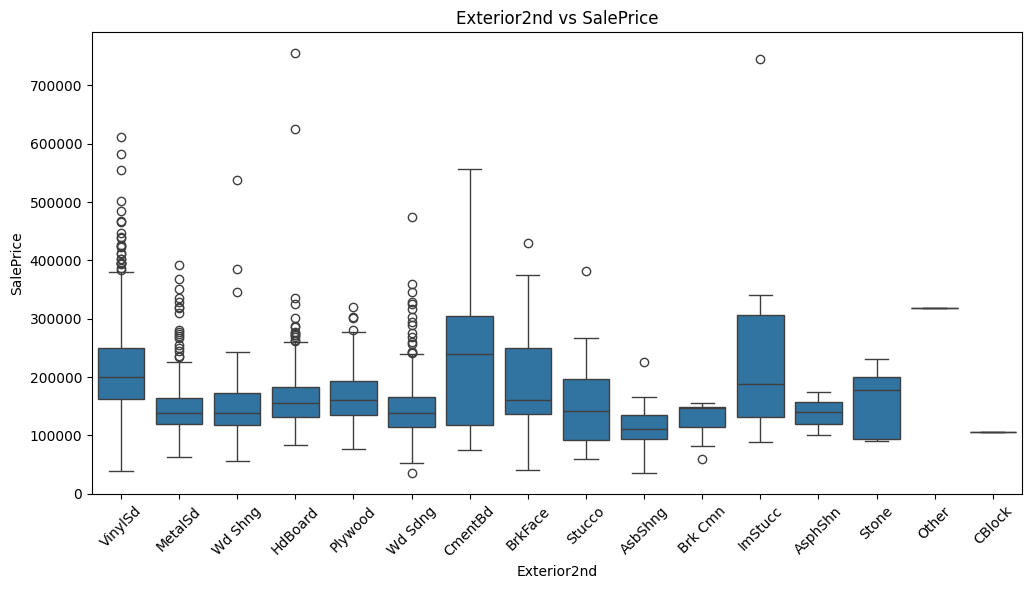

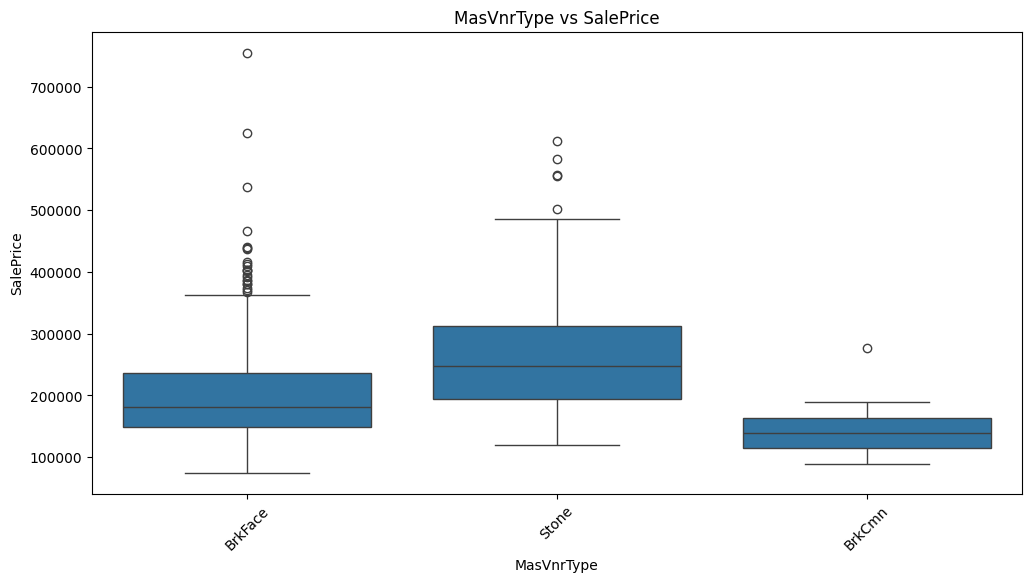

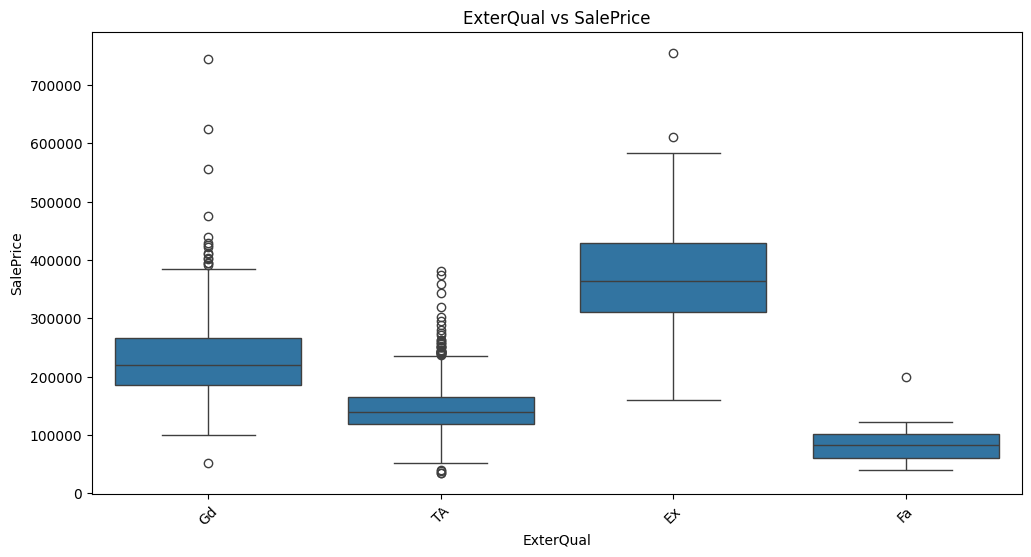

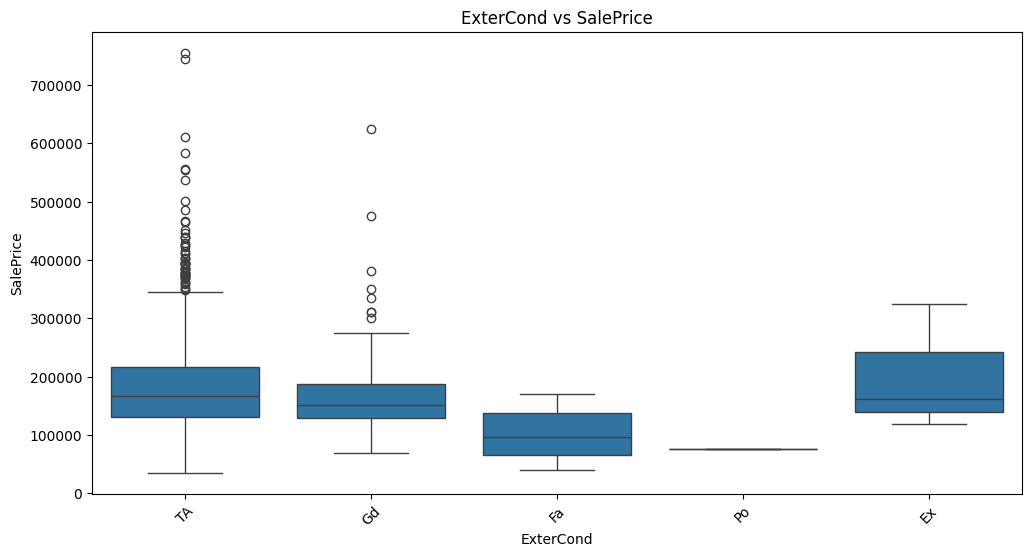

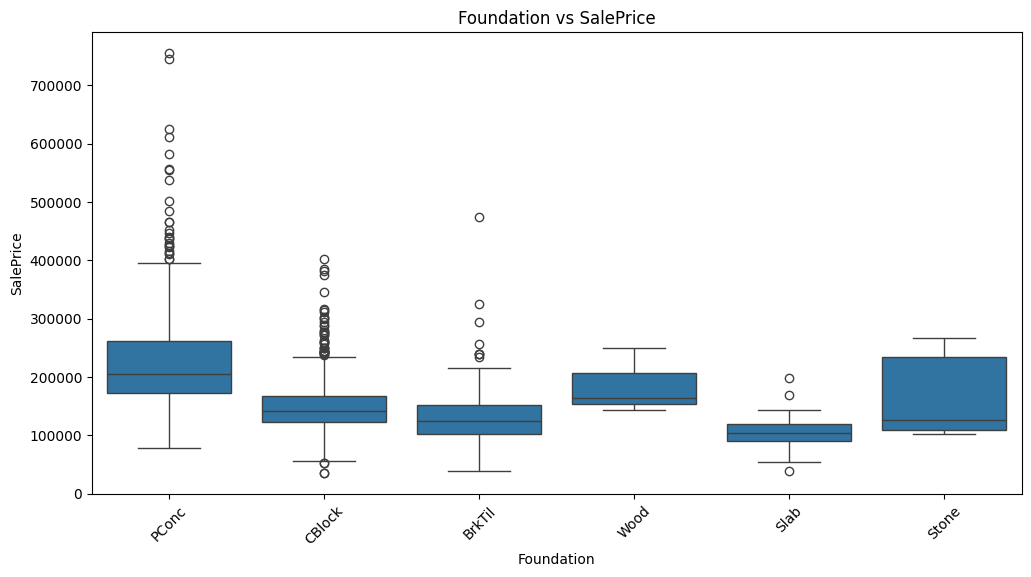

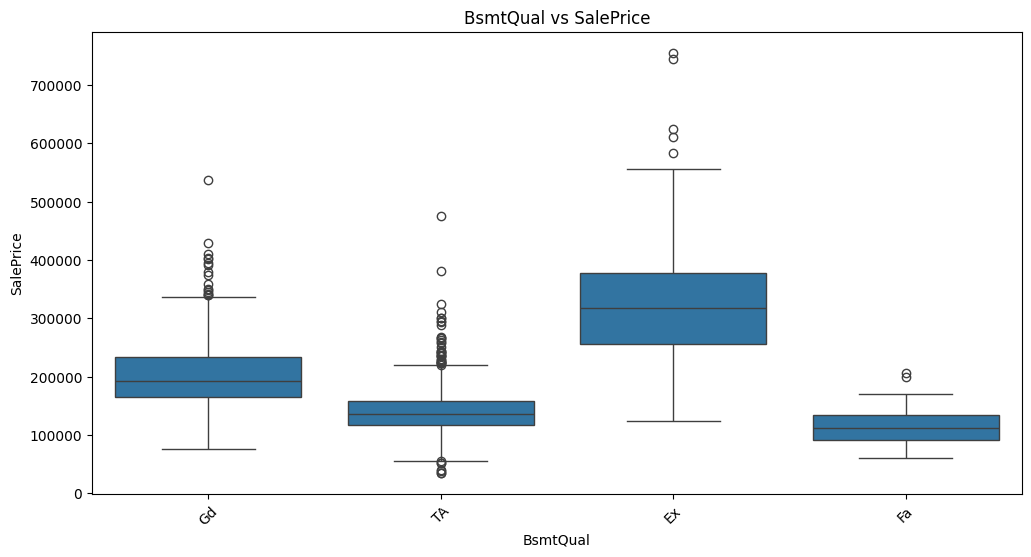

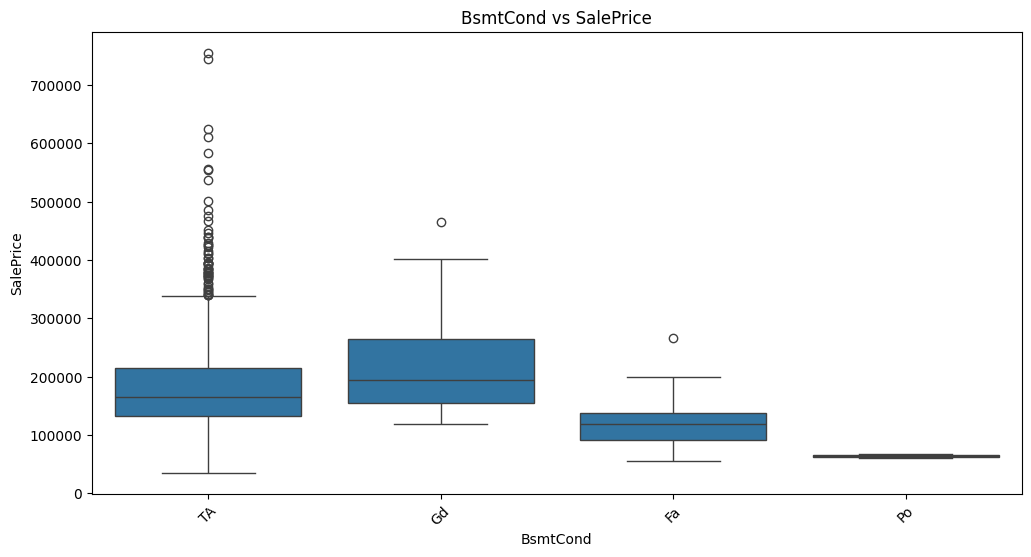

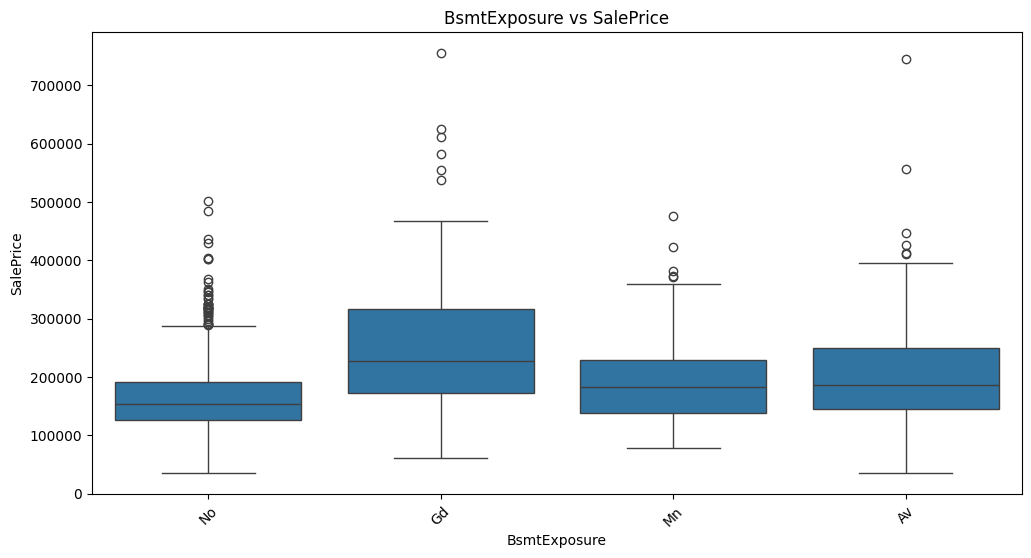

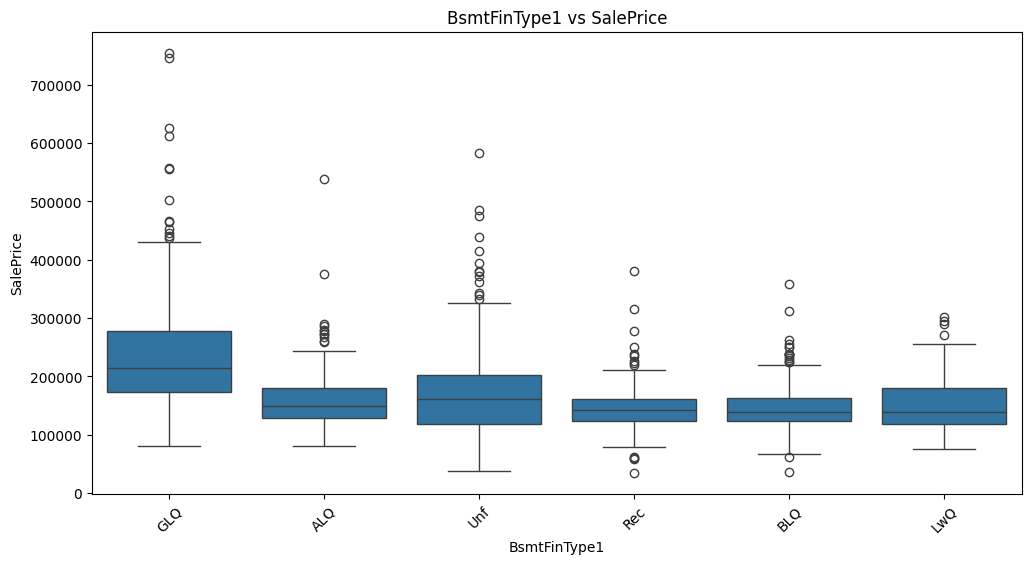

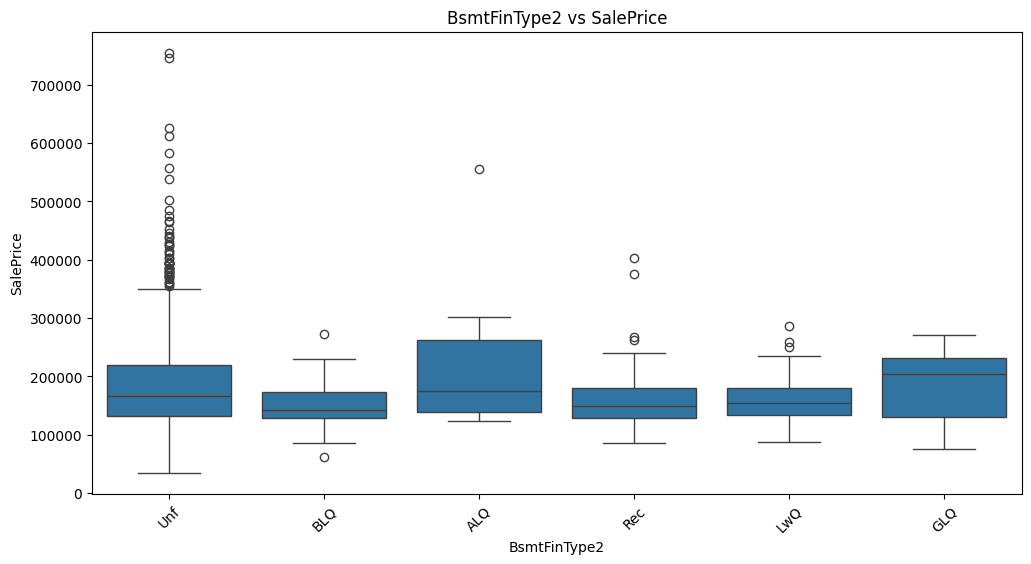

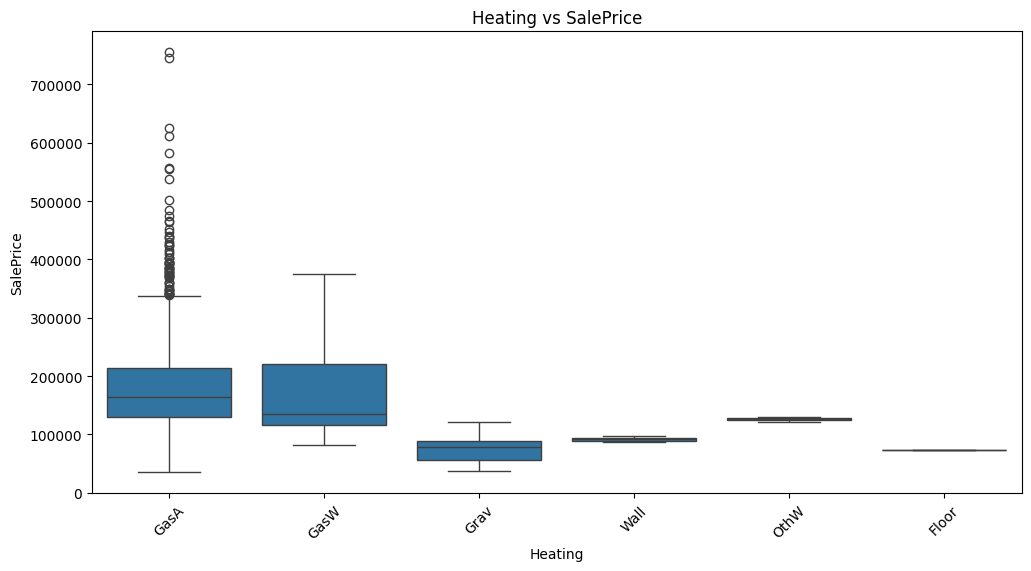

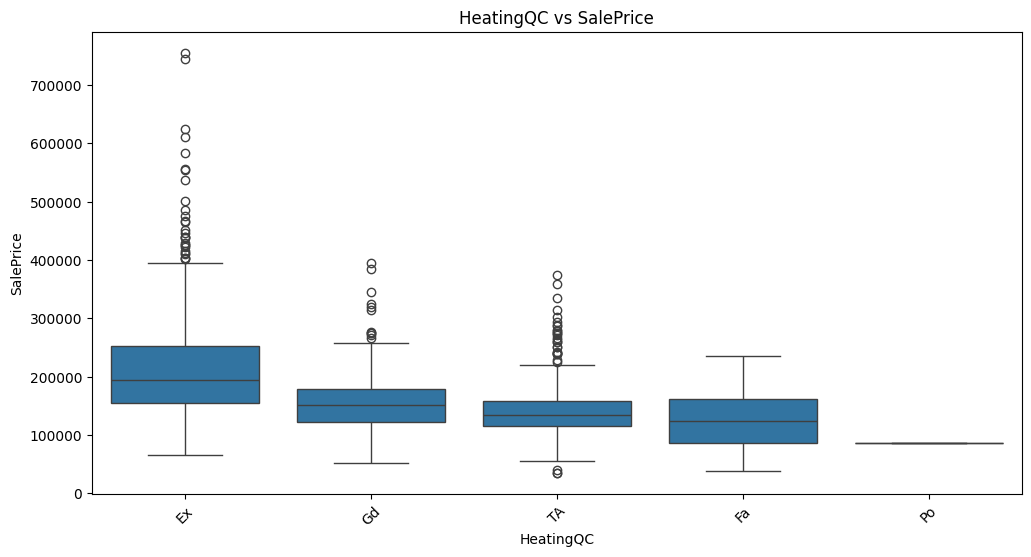

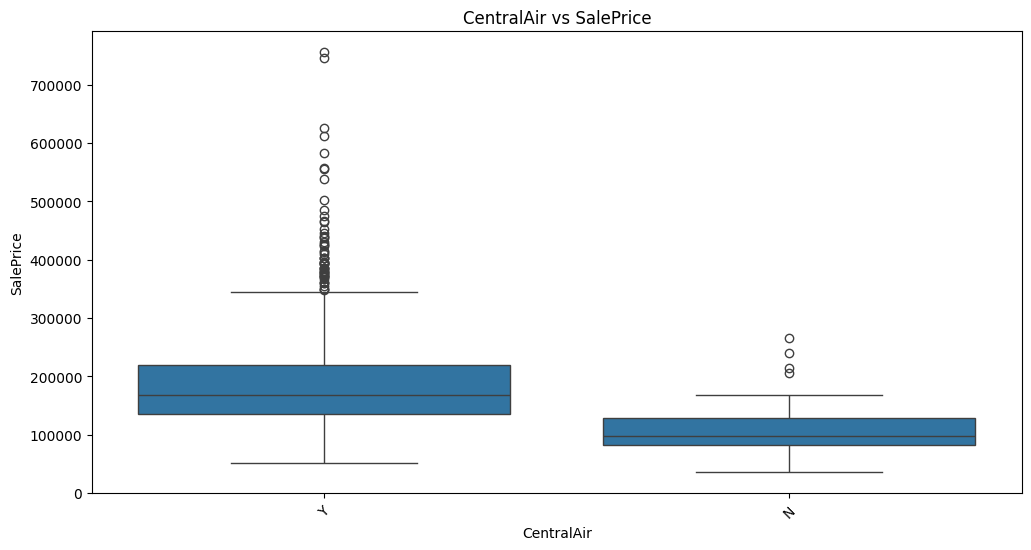

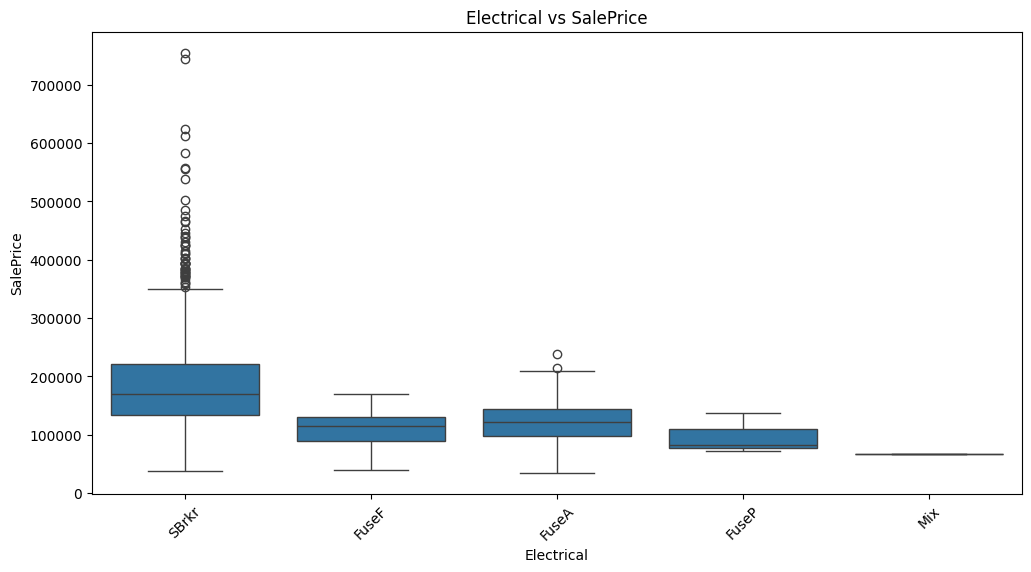

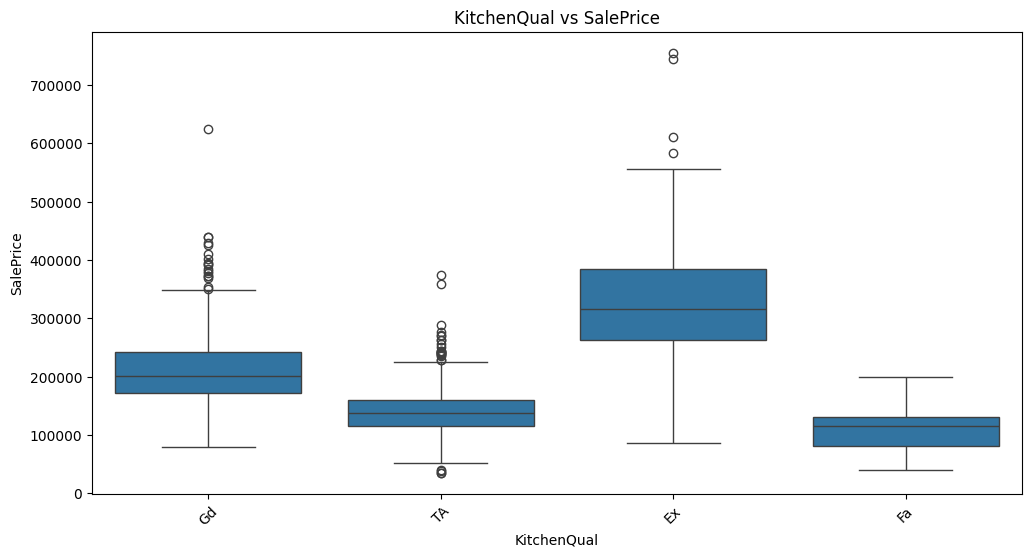

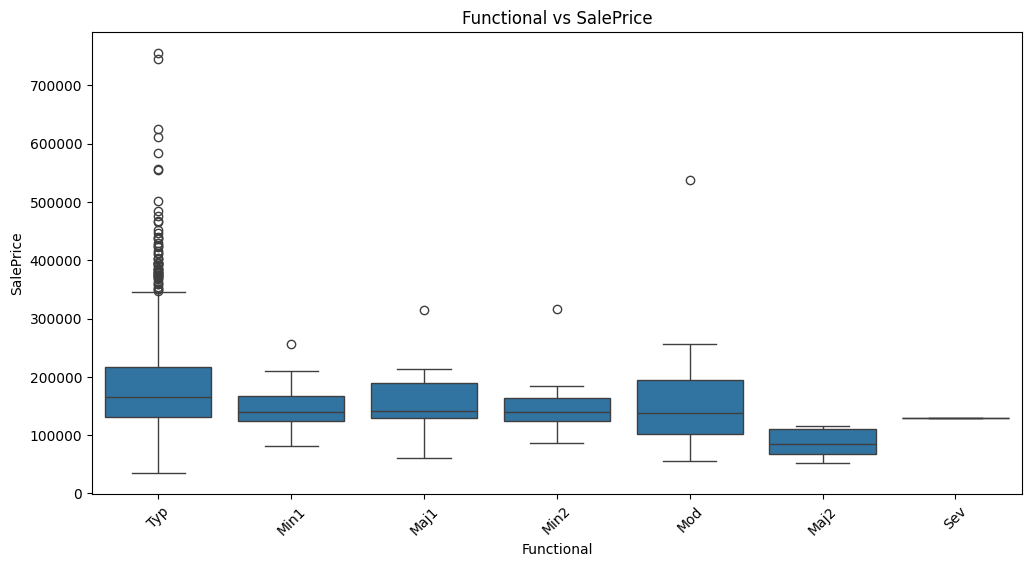

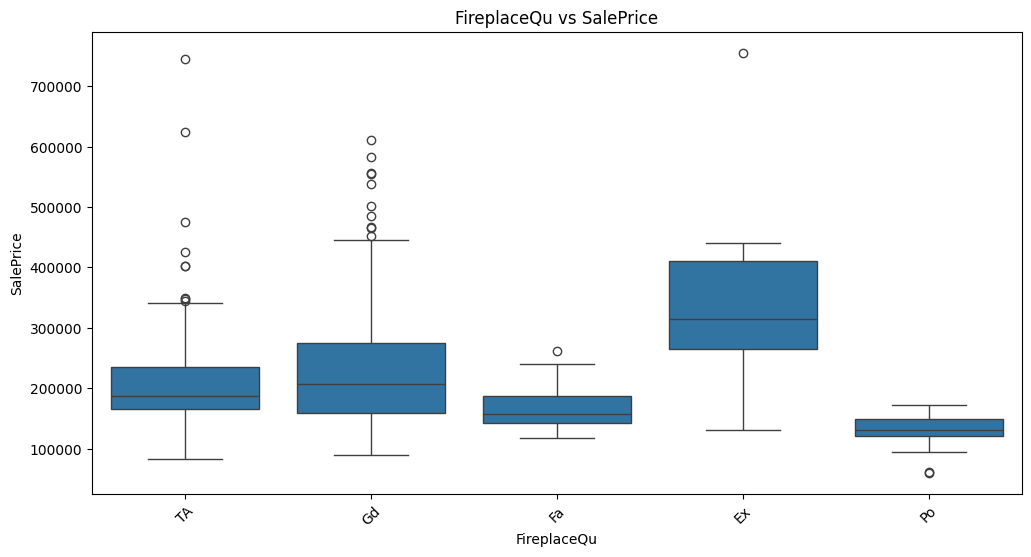

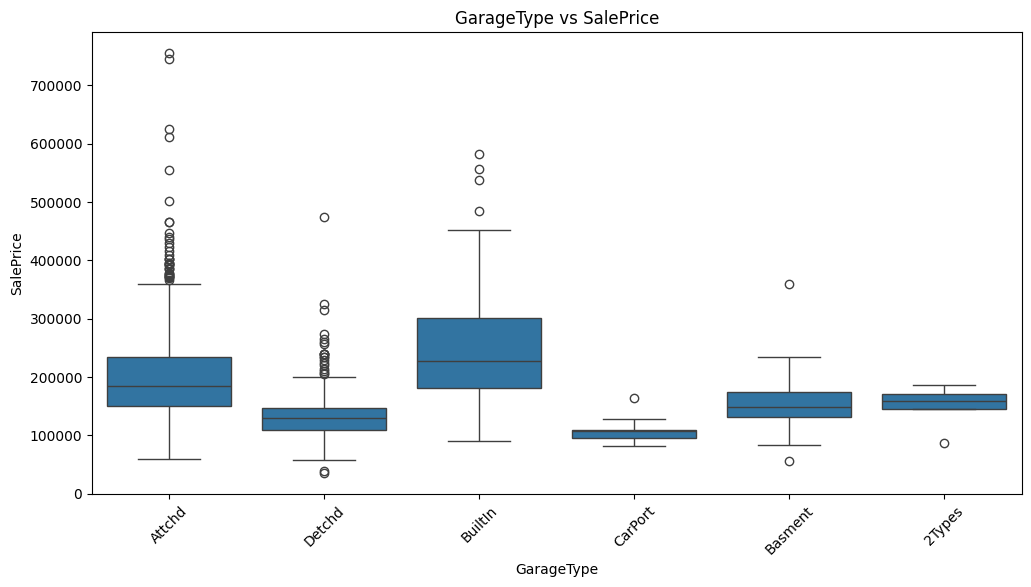

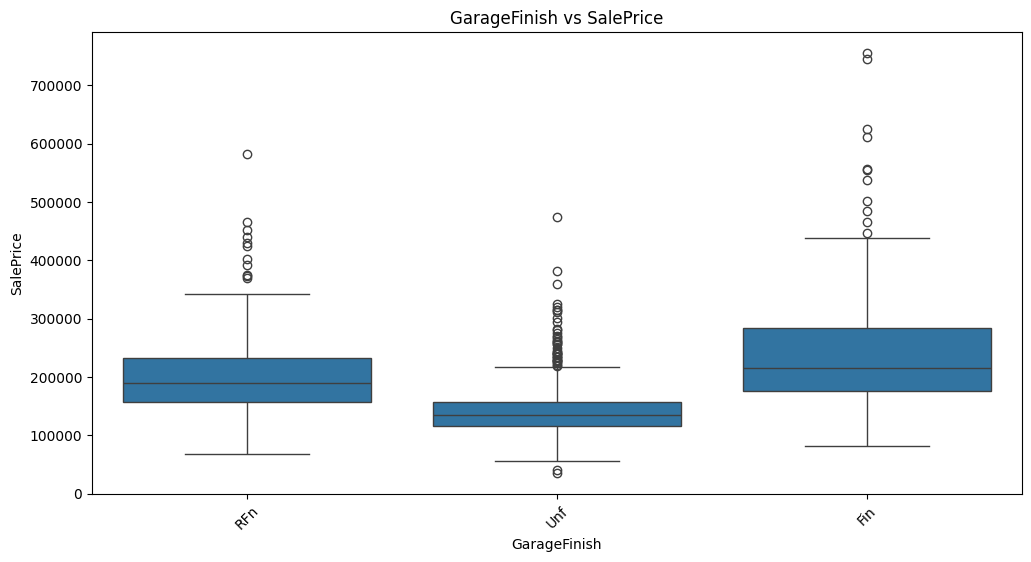

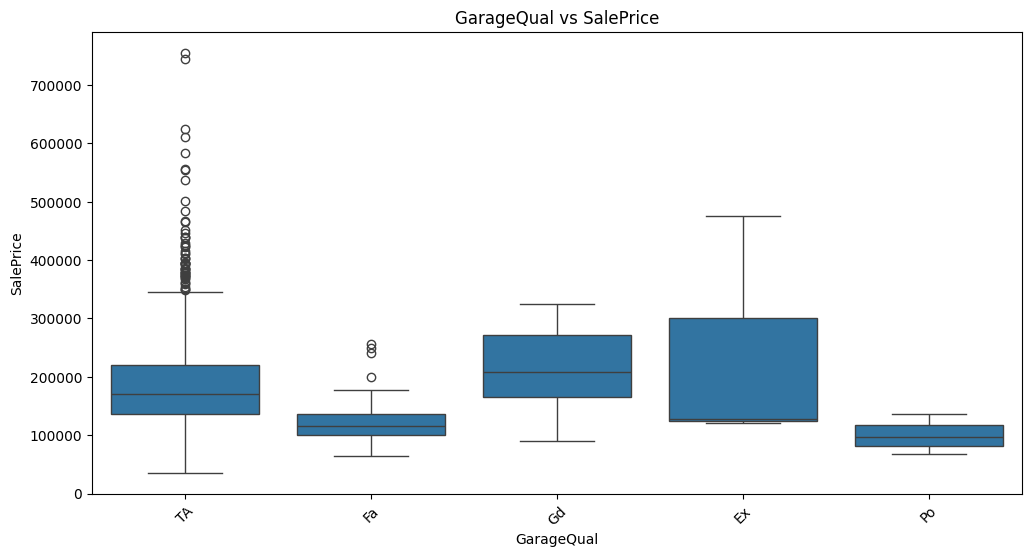

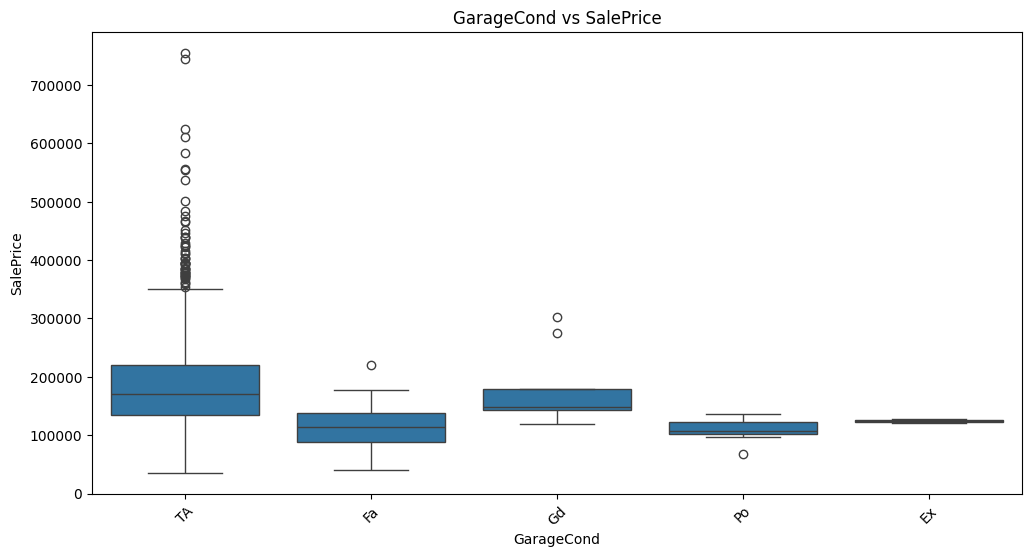

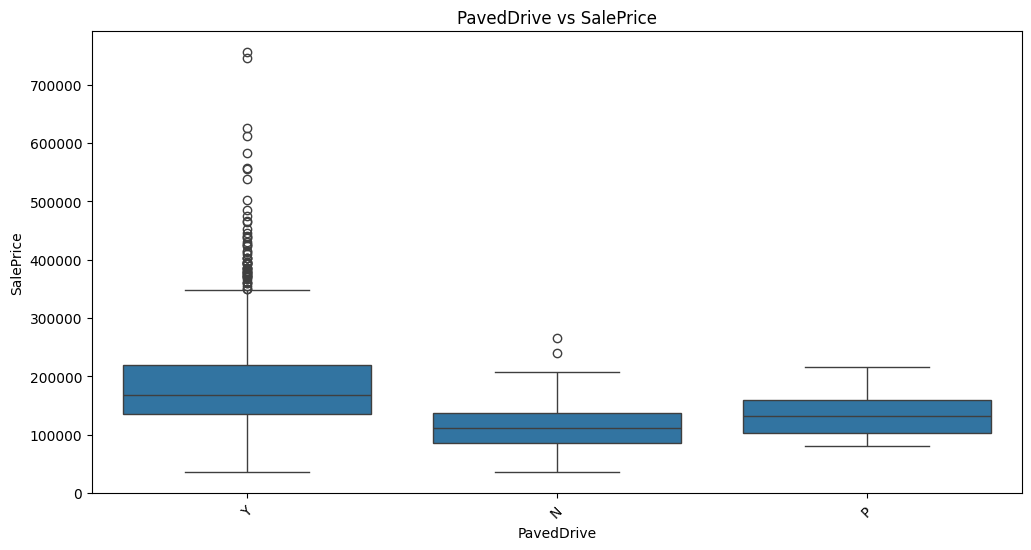

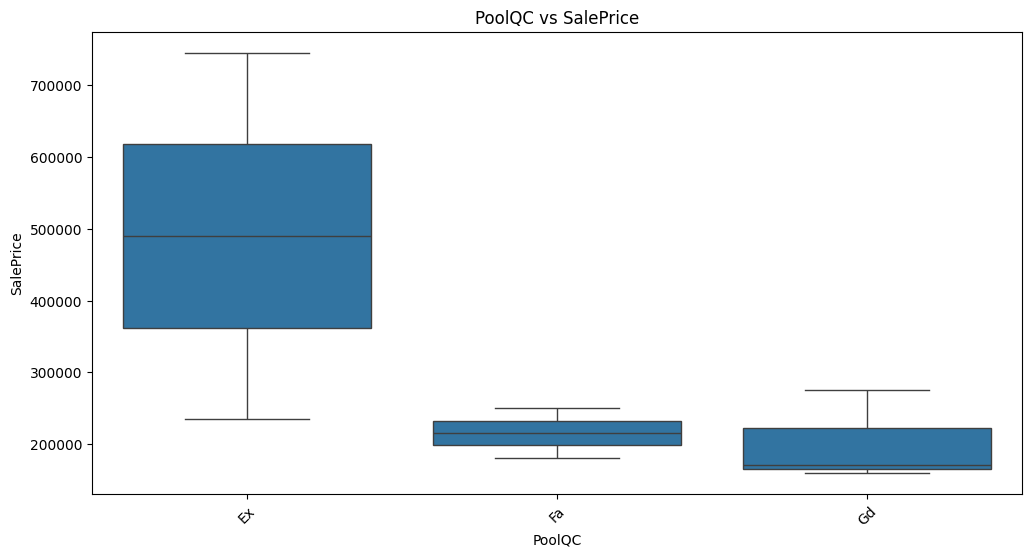

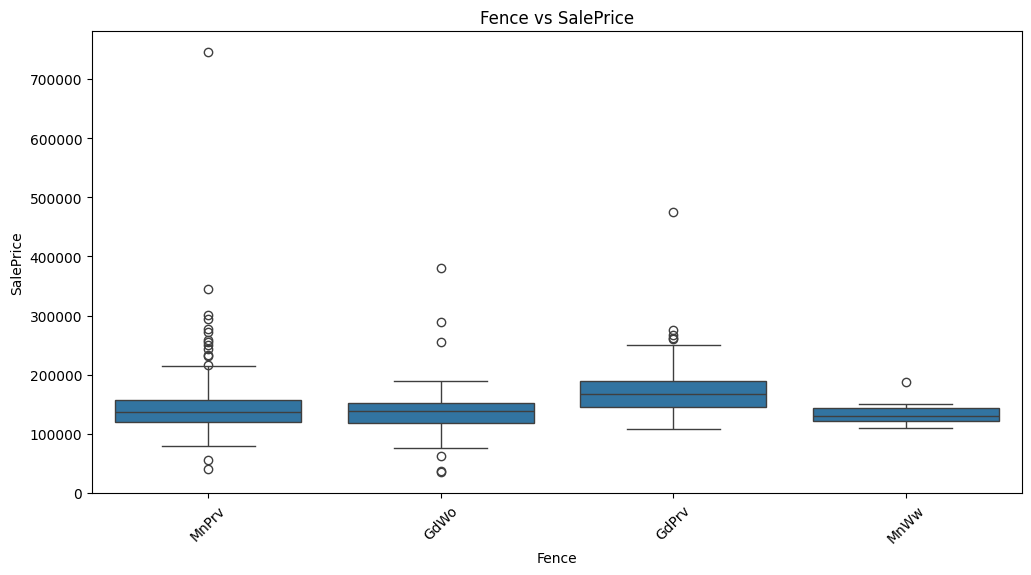

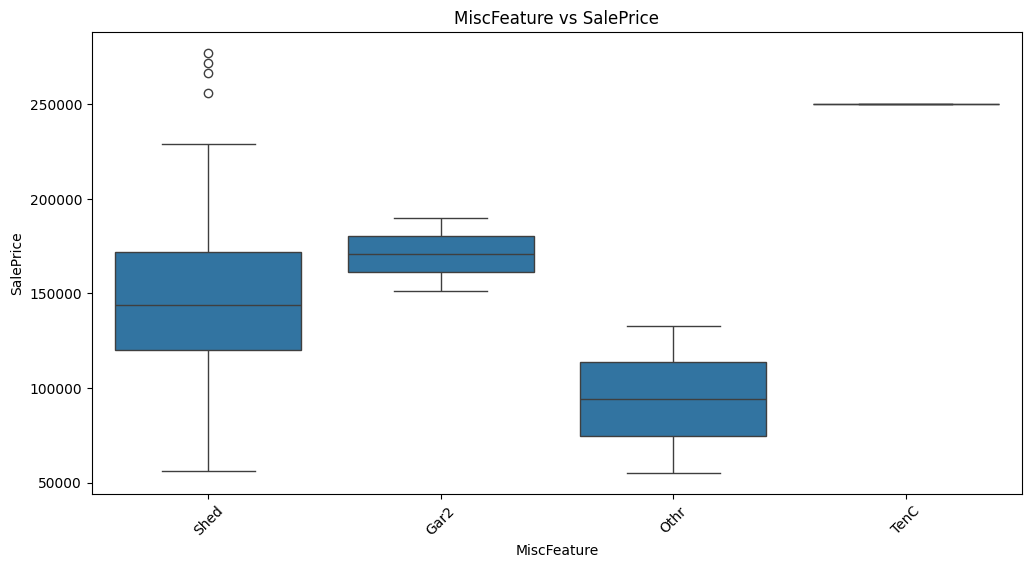

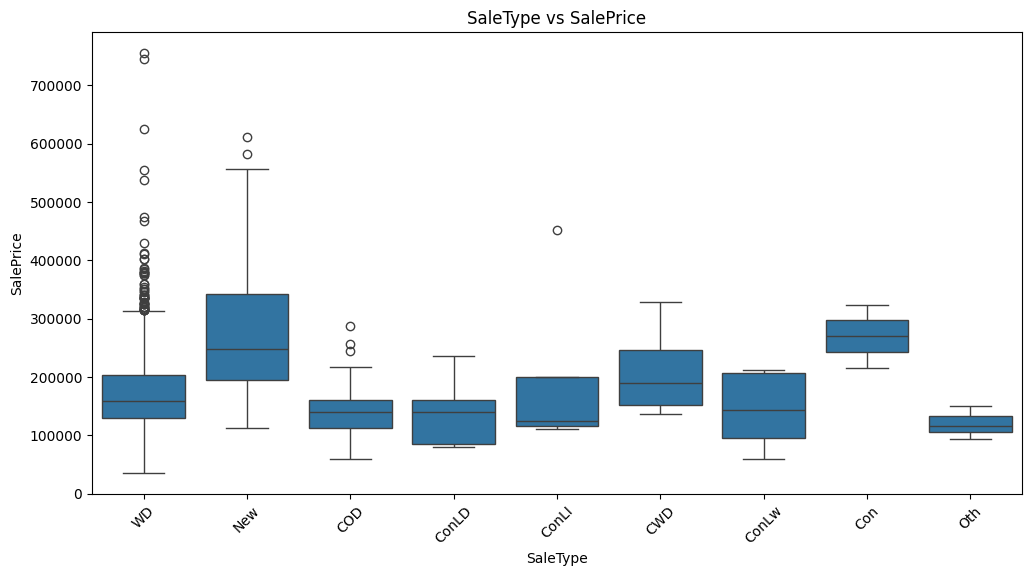

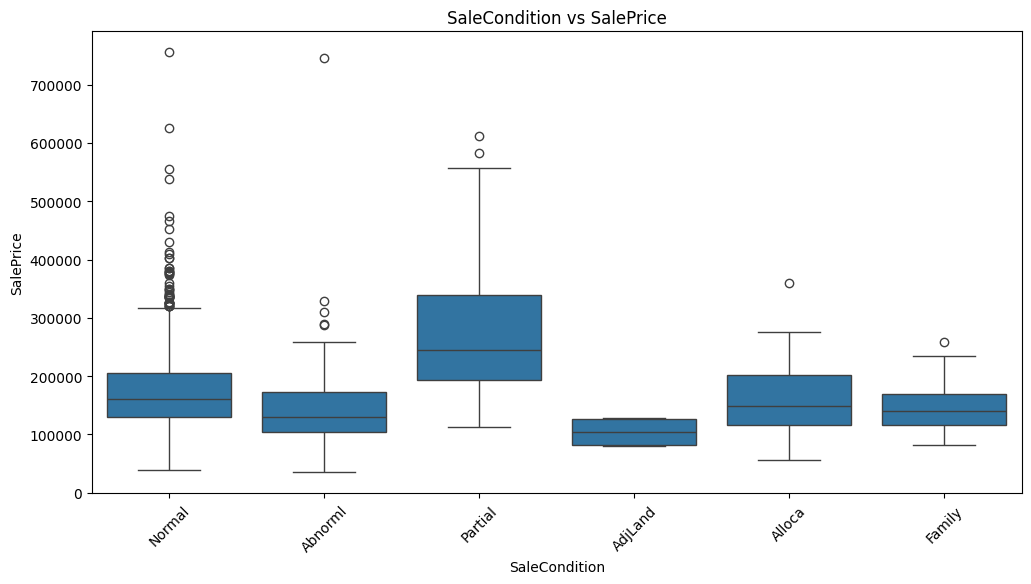

In [ ]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns
target_column = 'SalePrice'  # Change to your target column

for col in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[col], y=df[target_column])
    plt.xticks(rotation=45)
    plt.title(f"{col} vs {target_column}")
    plt.show()


In [ ]:
df['Utilities'].unique().tolist()

['AllPub', 'NoSeWa']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder


# Define the order for the categories
utilities_order = [['ELO', 'NoSeWa', 'NoSewr', 'AllPub']]

# Apply Ordinal Encoding
encoder = OrdinalEncoder(categories=utilities_order)
df['Utilities'] = encoder.fit_transform(df[['Utilities']])

df['Utilities'].unique().tolist()

[3.0, 1.0]

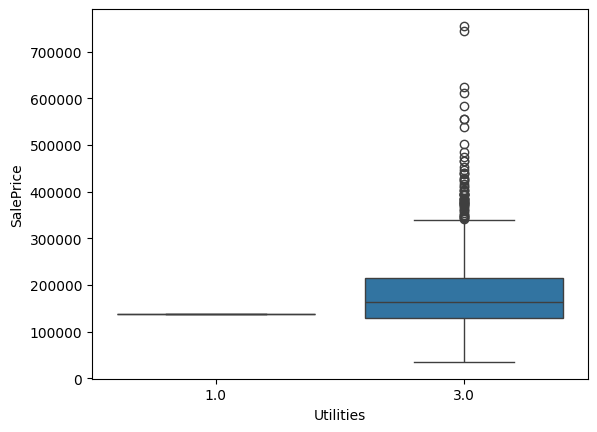

Spearman Correlation: 0.016709609503697546
Utilities
3.0    1459
1.0       1
Name: count, dtype: int64


In [ ]:
sns.boxplot(x='Utilities', y='SalePrice', data=df)
plt.show()

corr = df['Utilities'].corr(df['SalePrice'], method='spearman')
print(f"Spearman Correlation: {corr}")
df['Utilities'].describe()

print(df['Utilities'].value_counts())

df.drop('Utilities', inplace=True, axis=1)

['Pave', 'Grvl']
Street
Pave    1454
Grvl       6
Name: count, dtype: int64


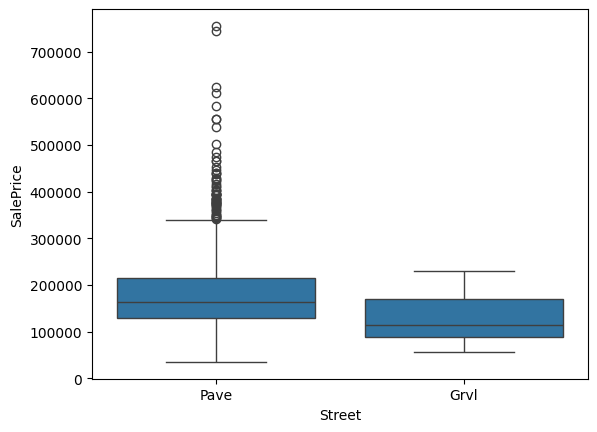

In [ ]:
print(df['Street'].unique().tolist())

print(df['Street'].value_counts())

sns.boxplot(x='Street', y='SalePrice', data=df)
plt.show()

df['Street'].describe()
df.drop('Street', inplace=True, axis=1)

Alley
Grvl    50
Pave    41
Name: count, dtype: int64
[nan, 'Grvl', 'Pave']


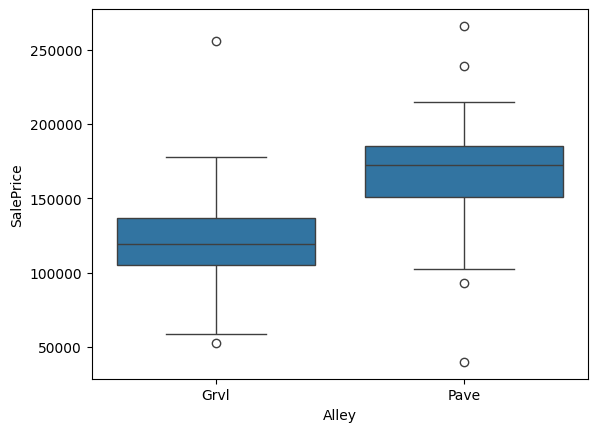

F_onewayResult(statistic=np.float64(35.56206043131903), pvalue=np.float64(4.899826166771113e-08))


In [ ]:
print(df['Alley'].value_counts())
print(df['Alley'].unique().tolist())

df['Alley'].isnull().sum()

sns.boxplot(x='Alley', y='SalePrice', data=df)
plt.show()


print(stats.f_oneway(df[df['Alley'] == 'Grvl']['SalePrice'],
               df[df['Alley'] == 'Pave']['SalePrice']))

df.drop('Alley', inplace=True, axis=1)

PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64


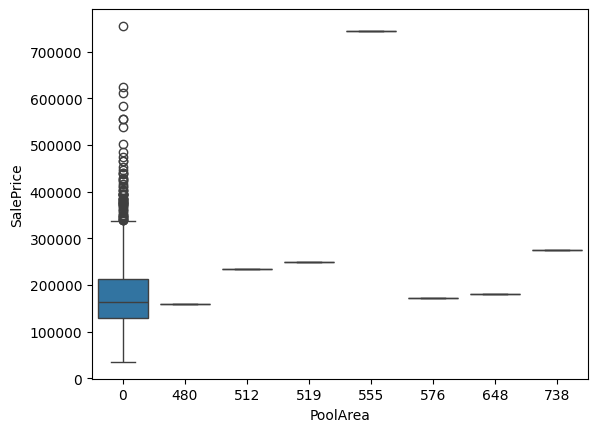

In [ ]:
print(df['PoolArea'].value_counts())

sns.boxplot(x='PoolArea', y='SalePrice', data=df)
plt.show()

df.drop('PoolArea', inplace=True, axis=1)

PoolQC
NaN    1453
Gd        3
Ex        2
Fa        2
Name: count, dtype: int64


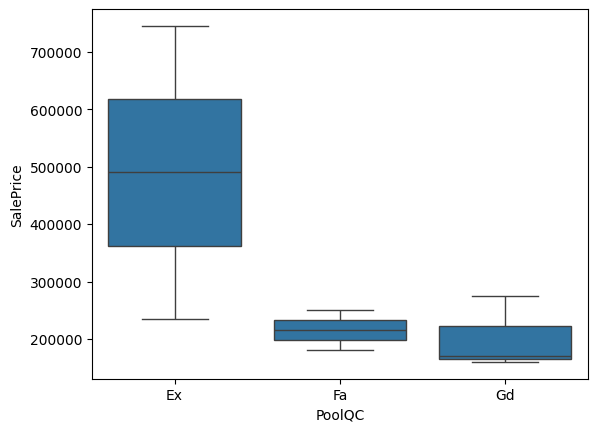

In [ ]:
print(df['PoolQC'].value_counts(dropna=False))

sns.boxplot(x='PoolQC', y='SalePrice', data=df)
plt.show()

df.drop('PoolQC', inplace=True, axis=1)

MiscFeature
NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: count, dtype: int64
96.30136986301369


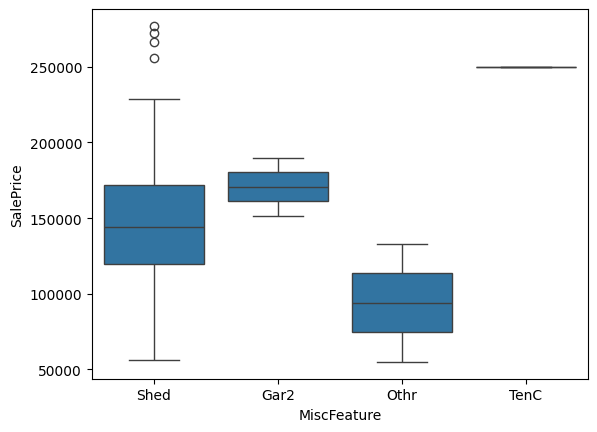

In [ ]:
print(df['MiscFeature'].value_counts(dropna=False))
print(df['MiscFeature'].isnull().sum()/df.shape[0]*100)

sns.boxplot(x='MiscFeature', y='SalePrice', data=df)
plt.show()

df.drop('MiscFeature', inplace=True, axis=1)

In [ ]:
missing_percent = (df.isnull().sum() / df.shape[0]*100)
drop_columns = missing_percent[missing_percent > 60].index
percent = missing_percent[missing_percent > 60]
df.drop(drop_columns, axis=1, inplace=True)

df.shape[1]

74

In [ ]:
df['LandSlope'].value_counts()
df.drop('LandSlope', inplace=True, axis=1)

In [ ]:
print(df['MasVnrType'].value_counts(dropna=False))
print(df['MasVnrArea'].value_counts(dropna=False))

df['MasVnrType'] = df['MasVnrType'].replace({np.nan : 'None'})
masVnrType_target_mean = df.groupby('MasVnrType')['SalePrice'].mean()
df['MasVnrType'] = df['MasVnrType'].map(masVnrType_target_mean)
print(df['MasVnrType'].corr(df['SalePrice']))
print(df['MasVnrType'].value_counts(dropna=False))

#target encoding may not be the best solution

# Identify rows where MasVnrType is 'None' but MasVnrArea is not 0
# inconsistent_rows = df[(df['MasVnrType'] == 'None') & (df['MasVnrArea'] > 0)]
# print(inconsistent_rows)

# rows_all_nan = df[(df['MasVnrType'] == 'None') & df['MasVnrArea'].isnull()]
# print(rows_all_nan)

print(df['MasVnrArea'].corr(df['SalePrice']))

MasVnrType
NaN        872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64
MasVnrArea
0.0      861
108.0      8
NaN        8
72.0       8
180.0      8
        ... 
426.0      1
96.0       1
438.0      1
194.0      1
119.0      1
Name: count, Length: 328, dtype: int64
0.42810849361371867
MasVnrType
156958.243119    872
204691.871910    445
265583.625000    128
146318.066667     15
Name: count, dtype: int64
0.4774930470957163


234     156958.243119
529     156958.243119
650     156958.243119
936     156958.243119
973     156958.243119
977     156958.243119
1243    156958.243119
1278    156958.243119
Name: MasVnrType, dtype: float64
0.4774930470957163
0.47261449900457475


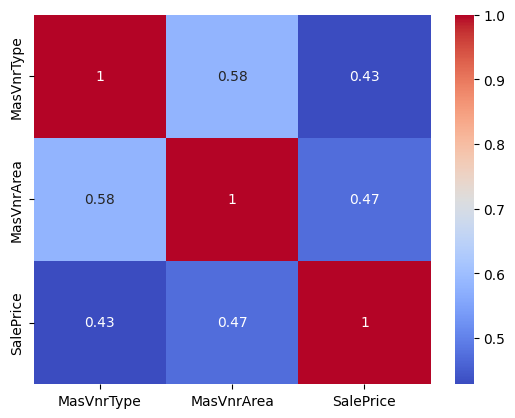

In [ ]:
rows_all_nan = df[df['MasVnrArea'].isnull()]
print(rows_all_nan['MasVnrType'])

print(df['MasVnrArea'].corr(df['SalePrice']))

df['MasVnrArea'] = df['MasVnrArea'].replace({np.nan : 0})

print(df['MasVnrArea'].corr(df['SalePrice']))

corr_mat = df[['MasVnrType', 'MasVnrArea', 'SalePrice']].corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns


print("Missing values after filling:\n", df[categorical_cols].isnull().sum())


Missing values after filling:
 MSZoning           0
LotShape           0
LandContour        0
LotConfig          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64


In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
  if df[col].value_counts(normalize=True).max() > 0.5 :
    print(f"{col}: {df[col].value_counts(dropna=False)}")


OverallCond: OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64
MasVnrType: MasVnrType
156958.243119    872
204691.871910    445
265583.625000    128
146318.066667     15
Name: count, dtype: int64
MasVnrArea: MasVnrArea
0.0      869
108.0      8
72.0       8
180.0      8
16.0       7
        ... 
426.0      1
96.0       1
438.0      1
194.0      1
119.0      1
Name: count, Length: 327, dtype: int64
BsmtFinSF2: BsmtFinSF2
0       1293
180        5
374        3
93         2
287        2
        ... 
872        1
110        1
627        1
163        1
1029       1
Name: count, Length: 144, dtype: int64
2ndFlrSF: 2ndFlrSF
0       829
728      10
504       9
672       8
546       8
       ... 
908       1
989       1
932       1
358       1
1392      1
Name: count, Length: 417, dtype: int64
LowQualFinSF: LowQualFinSF
0      1434
80        3
360       2
513       1
528       1
572       1
144       1
234       1
392       1


Correlation between MiscVal and SalePrice: -0.02118957964030325


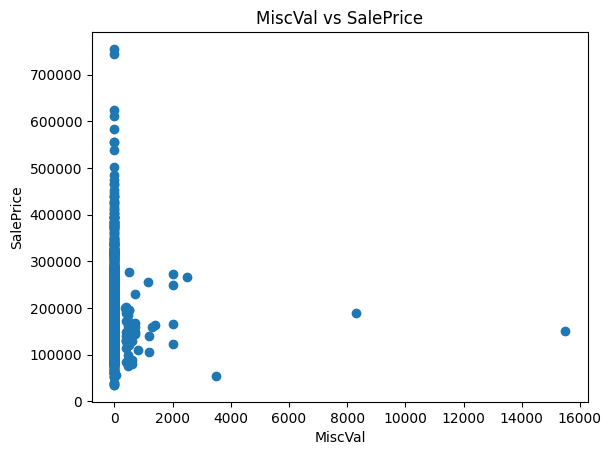

In [ ]:
correlation = df['MiscVal'].corr(df['SalePrice'])
print(f"Correlation between MiscVal and SalePrice: {correlation}")

plt.scatter(df['MiscVal'], df['SalePrice'])
plt.xlabel('MiscVal')
plt.ylabel('SalePrice')
plt.title('MiscVal vs SalePrice')
plt.show()

df.drop('MiscVal', inplace=True, axis=1)

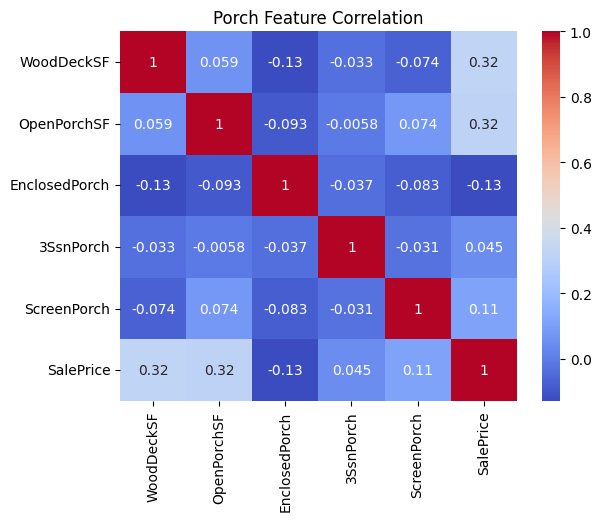

In [ ]:
porch_features = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']


sns.heatmap(df[porch_features + ['SalePrice']].corr(), annot=True, cmap='coolwarm')
plt.title('Porch Feature Correlation')
plt.show()




*   WoodDeckSF and OpenPorchSF: Since these have similar correlations and meanings (open outdoor spaces), merging makes sense.

*   EnclosedPorch: It reduces the sale price, behaving differently—keep it separate.
* 3SsnPorch and ScreenPorch: These have weak relationships with SalePrice, and we could either drop them or merge if you want to keep all porch-related data.

note: when we merged them with the total it increased the correalrion




In [ ]:
df['TotalOpenPorchSF'] = df['WoodDeckSF'] + df['OpenPorchSF']

df.drop(['WoodDeckSF', 'OpenPorchSF'], axis=1, inplace=True)

print(df['TotalOpenPorchSF'].corr(df['SalePrice']))

0.42425779335963104


In [ ]:
df['TotalOpenPorchSF'] += df['3SsnPorch'] + df['ScreenPorch']

df.drop(['3SsnPorch', 'ScreenPorch'], axis=1, inplace=True)
print(df['TotalOpenPorchSF'].corr(df['SalePrice']))

0.44436432865032516


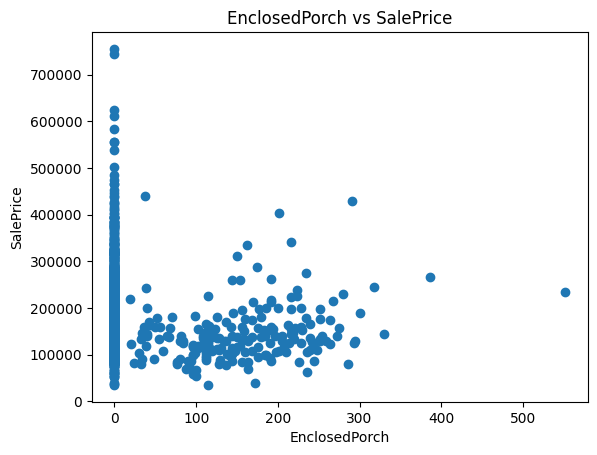

In [ ]:

plt.scatter(df['EnclosedPorch'], df['SalePrice'])
plt.xlabel('EnclosedPorch')
plt.ylabel('SalePrice')
plt.title('EnclosedPorch vs SalePrice')
plt.show()

#df['TotalOpenPorchSF'] -= df['EnclosedPorch']

df.drop(['EnclosedPorch'], axis=1, inplace=True)

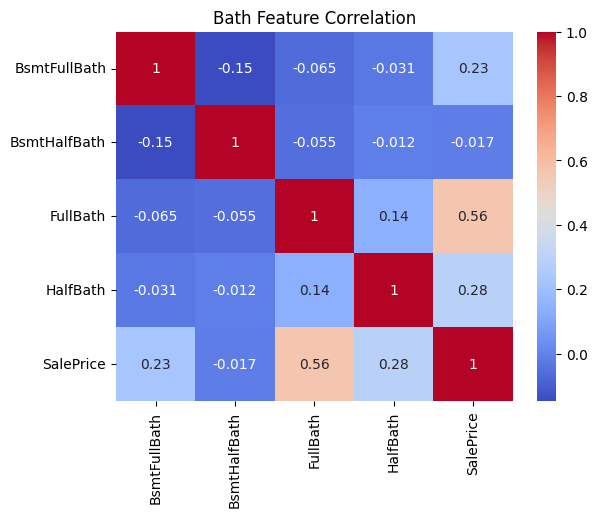

In [ ]:
bath_features = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']


sns.heatmap(df[bath_features + ['SalePrice']].corr(), annot=True, cmap='coolwarm')
plt.title('Bath Feature Correlation')
plt.show()

In [ ]:
df['TotalBath'] = df['FullBath']
print(df['TotalBath'].corr(df['SalePrice']))

df['TotalBath'] += 0.5*df['HalfBath']
print(df['TotalBath'].corr(df['SalePrice']))

df['TotalBath'] += df['BsmtFullBath']
print(df['TotalBath'].corr(df['SalePrice']))

df['TotalBath'] += 0.5*df['BsmtHalfBath']
print(df['TotalBath'].corr(df['SalePrice']))

df.drop(['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'], axis=1, inplace=True)

0.5606637627484449
0.5979656210064282
0.628218596674967
0.6317310679319873


In [ ]:
heating_mapping = {
    'GasA': 5,    # Best
    'GasW': 4,    # Good
    'OthW': 3,    # Neutral
    'Floor': 2,   # Lower
    'Wall': 1,    # Lower
    'Grav': 0     # Worst
}

heating_qc_mapping = {
    'Ex': 4,   # Excellent
    'Gd': 3,   # Good
    'TA': 2,   # Average
    'Fa': 1,   # Fair
    'Po': 0    # Poor
}

df['Heating'] = df['Heating'].map(heating_mapping).fillna(0)
df['HeatingQC'] = df['HeatingQC'].map(heating_qc_mapping).fillna(0)

df['HeatingScore'] = (df['Heating'] * 5) + df['HeatingQC']

df.drop(['HeatingQC'], axis=1, inplace=True)

print(df['HeatingScore'].describe())
print(df['HeatingScore'].value_counts())
print(df['HeatingScore'].unique().tolist())
print(df['HeatingScore'].corr(df['SalePrice']))


count    1460.000000
mean       27.884932
std         2.544285
min         1.000000
25%        27.000000
50%        29.000000
75%        29.000000
max        29.000000
Name: HeatingScore, dtype: float64
HeatingScore
29    739
27    415
28    239
26     34
22     11
1       7
21      3
6       3
24      2
23      2
16      2
25      1
7       1
12      1
Name: count, dtype: int64
[29, 28, 27, 26, 22, 24, 1, 23, 25, 6, 21, 7, 16, 12]
0.26168256266551954


CentralAir
Y    1365
N      95
Name: count, dtype: int64


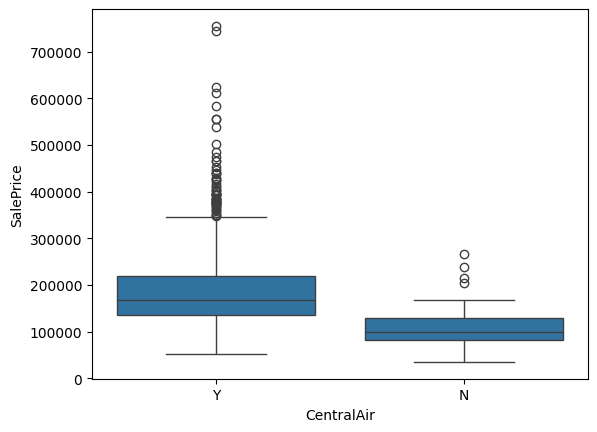

0.25132816384015527


In [ ]:
print(df['CentralAir'].value_counts())

sns.boxplot(x='CentralAir', y='SalePrice', data=df)
plt.show()

df['CentralAir'] = df['CentralAir'].map({'Y': 1, 'N': 0})

print(df['CentralAir'].corr(df['SalePrice']))

#we will leave it as it has high correlation with the target

In [ ]:
# from sklearn.linear_model import Lasso
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.metrics import mean_squared_error

# # Encode categorical features
# df_encoded = pd.get_dummies(df, drop_first=True)

# # Features and target
# X = df_encoded.drop('SalePrice', axis=1)
# y = df_encoded['SalePrice']

# # Fit Lasso
# lasso = Lasso(alpha=0.1)
# lasso.fit(X, y)

# # Show important coefficients
# importance = pd.Series(lasso.coef_, index=X.columns).sort_values(ascending=False)
# print(importance[importance != 0])


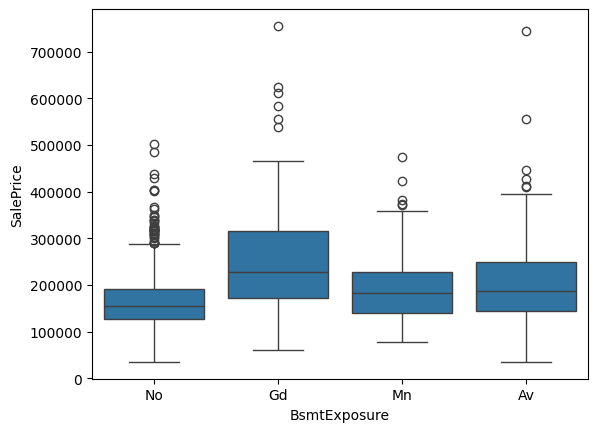

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [ ]:
sns.boxplot(x='BsmtExposure', y='SalePrice', data=df)
plt.show()

df['BsmtExposure'].value_counts()


In [ ]:
ordinal_mappings = {
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},
    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
    'BsmtFinType2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}
}

for col, mapping in ordinal_mappings.items():
    df[col] = df[col].map(mapping)
    print(df[col].value_counts())

BsmtExposure
1.0    953
3.0    221
4.0    134
2.0    114
Name: count, dtype: int64
BsmtQual
3.0    649
4.0    618
5.0    121
2.0     35
Name: count, dtype: int64
BsmtCond
3.0    1311
4.0      65
2.0      45
1.0       2
Name: count, dtype: int64
BsmtFinType1
1.0    430
6.0    418
5.0    220
4.0    148
3.0    133
2.0     74
Name: count, dtype: int64
BsmtFinType2
1.0    1256
3.0      54
2.0      46
4.0      33
5.0      19
6.0      14
Name: count, dtype: int64


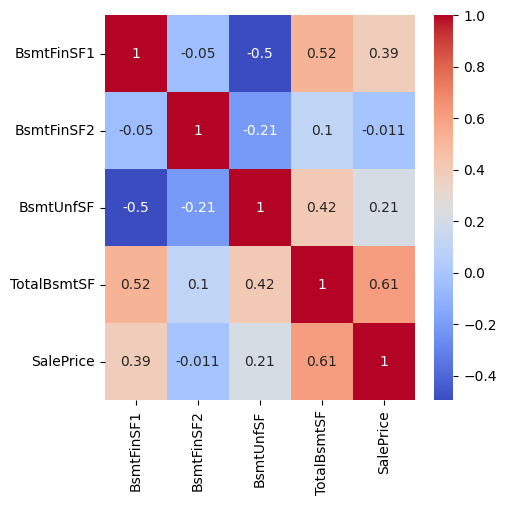

0.3864198062421532
0.36632769193495623
0.6135805515591956
BsmtScore
0    1460
Name: count, dtype: int64
{'BsmtFinSF1': np.float64(42.94079316187025), 'BsmtFinSF2': np.float64(-0.0), 'BsmtUnfSF': np.float64(28.970480058460577), 'TotalBsmtSF': np.float64(75.07532172804859)}


In [ ]:
''' we left the TotalBsmtSF because it is derived form the other features this is proven
    via the heatmap and the following code and we fruther ensured this with the lasso regression'''

bsmt_features = [ 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF']
plt.figure(figsize=(5,5))
sns.heatmap(df[bsmt_features + ['SalePrice']].corr(), annot=True, cmap='coolwarm')
plt.show()

df['TotalFinishedBsmtSF'] = df['BsmtFinSF1']
print(df['TotalFinishedBsmtSF'].corr(df['SalePrice']))

df['TotalFinishedBsmtSF'] += df['BsmtFinSF2']
print(df['TotalFinishedBsmtSF'].corr(df['SalePrice']))

df['TotalFinishedBsmtSF'] += df['BsmtUnfSF']
print(df['TotalFinishedBsmtSF'].corr(df['SalePrice']))

df['BsmtScore'] = df['TotalFinishedBsmtSF'] -  df['TotalBsmtSF']
print(df['BsmtScore'].value_counts())

X = df[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF']].fillna(0)
y = df['SalePrice'].fillna(0)

lasso = LassoCV().fit(X, y)
print(dict(zip(X.columns, lasso.coef_)))

df.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalFinishedBsmtSF', 'BsmtScore'], axis=1, inplace=True)

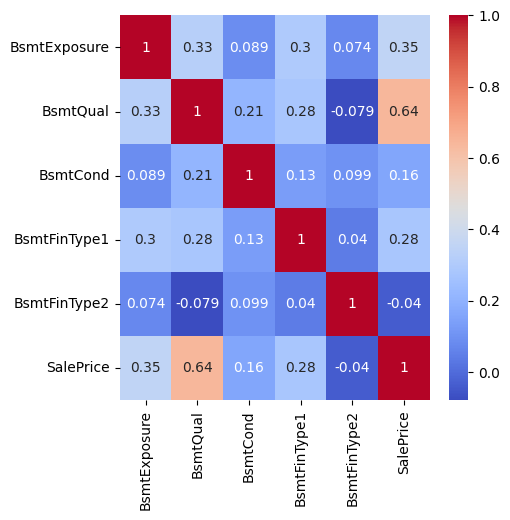

BsmtExposure
1.0    953
3.0    221
4.0    134
2.0    114
Name: count, dtype: int64
BsmtQual
3.0    649
4.0    618
5.0    121
2.0     35
Name: count, dtype: int64
BsmtCond
3.0    1311
4.0      65
2.0      45
1.0       2
Name: count, dtype: int64
BsmtFinType1
1.0    430
6.0    418
5.0    220
4.0    148
3.0    133
2.0     74
Name: count, dtype: int64
BsmtFinType2
1.0    1256
3.0      54
2.0      46
4.0      33
5.0      19
6.0      14
Name: count, dtype: int64
{'BsmtExposure': np.float64(11263.668859276944), 'BsmtQual': np.float64(59938.37278787418), 'BsmtCond': np.float64(-37839.168942202574), 'BsmtFinType1': np.float64(3145.4585609403075), 'BsmtFinType2': np.float64(-2184.4936462567325)}
F_onewayResult(statistic=np.float64(4.34811945849204), pvalue=np.float64(0.03722341535650497))
F_onewayResult(statistic=np.float64(20.55301403197904), pvalue=np.float64(6.274755969964173e-06))


In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df[list(ordinal_mappings.keys()) + ['SalePrice']].corr(), annot=True, cmap='coolwarm')
plt.show()

for col in list(ordinal_mappings.keys()):
  print(df[col].value_counts())

X = df[list(ordinal_mappings.keys())].fillna(0)
y = df['SalePrice'].fillna(0)

lasso = LassoCV().fit(X, y)
print(dict(zip(X.columns, lasso.coef_)))

anova_result = stats.f_oneway(
    df[df['BsmtCond'] == 1]['SalePrice'],
    df[df['BsmtCond'] != 1]['SalePrice']
)
print(anova_result)

anova_result = stats.f_oneway(
    df[df['BsmtFinType2'] == 1]['SalePrice'],
    df[df['BsmtFinType2'] != 1]['SalePrice']
)
print(anova_result)

df.drop(['BsmtCond','BsmtFinType2'], axis=1, inplace=True)

In [ ]:
df['BsmtQualityScore'] = df['BsmtQual'] * df['TotalBsmtSF']

print(df['TotalBsmtSF'].corr(df['SalePrice']))

print(df['BsmtQualityScore'].corr(df['SalePrice']))

print(df['TotalBsmtSF'].corr(df['BsmtQualityScore']))

df.drop(['BsmtQual', 'TotalBsmtSF'], axis=1, inplace=True)

0.6135805515591956
0.7150232452493844
0.9363410599577768


In [ ]:
df.drop(['Id'], axis=1, inplace=True) #should we drop it?

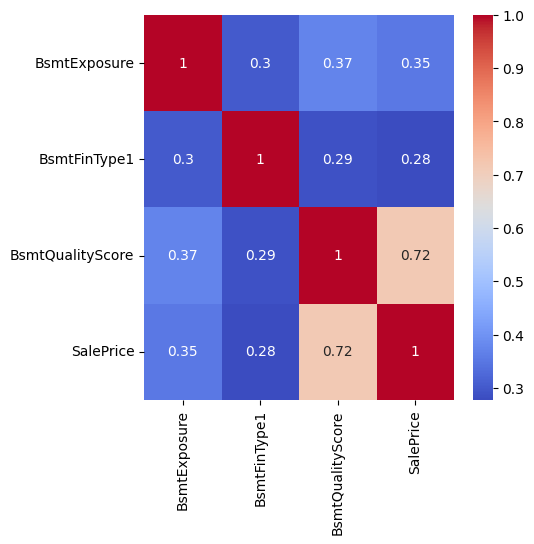

BsmtExposure
1.0    953
3.0    221
4.0    134
2.0    114
NaN     38
Name: count, dtype: int64
BsmtExposure
1.0    953
3.0    221
4.0    134
2.0    114
0.0     38
Name: count, dtype: int64
BsmtFinType1
1.0    430
6.0    418
5.0    220
4.0    148
3.0    133
2.0     74
NaN     37
Name: count, dtype: int64
BsmtFinType1
1.0    430
6.0    418
5.0    220
4.0    148
3.0    133
2.0     74
0.0     37
Name: count, dtype: int64
      BsmtExposure  BsmtFinType1  BsmtQualityScore
17             0.0           0.0               NaN
39             0.0           0.0               NaN
90             0.0           0.0               NaN
102            0.0           0.0               NaN
156            0.0           0.0               NaN
182            0.0           0.0               NaN
259            0.0           0.0               NaN
342            0.0           0.0               NaN
362            0.0           0.0               NaN
371            0.0           0.0               NaN
392            0.0 

In [ ]:
from sklearn.feature_selection import f_classif

matching_features = [col for col in df.columns if col.startswith('Bsmt')]
matching_features

plt.figure(figsize=(5,5))
sns.heatmap(df[matching_features + ['SalePrice']].corr(), annot=True, cmap='coolwarm')
plt.show()

print(df['BsmtExposure'].value_counts(dropna=False))
df['BsmtExposure'] = df['BsmtExposure'].replace({np.nan: 0})
print(df['BsmtExposure'].value_counts(dropna=False))

print(df['BsmtFinType1'].value_counts(dropna=False))
df['BsmtFinType1'] = df['BsmtFinType1'].replace({np.nan: 0})
print(df['BsmtFinType1'].value_counts(dropna=False))

nan_records = df[df['BsmtQualityScore'].isna()]
print(nan_records[matching_features])
df['BsmtQualityScore'] = df['BsmtQualityScore'].replace({np.nan: 0})


_, p_value1 = f_classif(df[['BsmtExposure']], df['SalePrice'])
_, p_value2 = f_classif(df[['BsmtQualityScore']], df['SalePrice'])
print(p_value1[0])
print(p_value2[0])

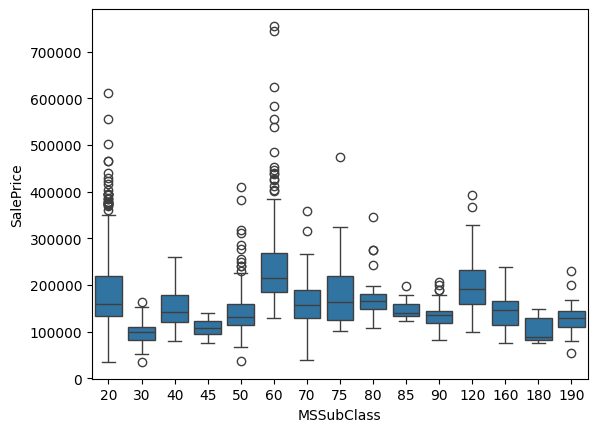

In [ ]:
df['MSSubClass'].value_counts()

df['MSSubClass'].corr(df['SalePrice'])

sns.boxplot(x='MSSubClass', y='SalePrice', data=df)
plt.show()

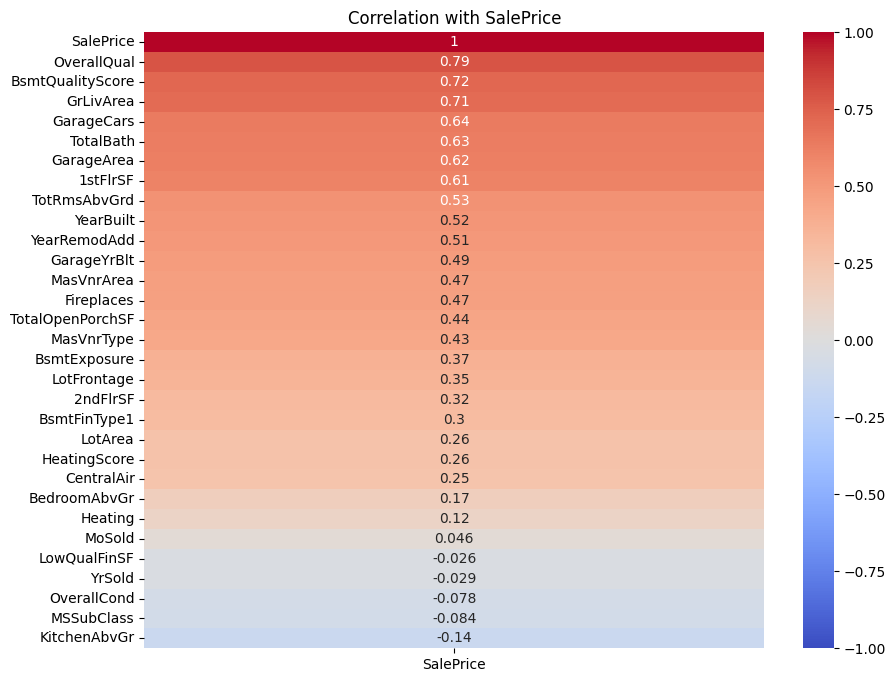

Columns with high correlation to SalePrice (sorted): ['OverallQual', 'BsmtQualityScore', 'GrLivArea', 'GarageCars', 'TotalBath', 'GarageArea', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'TotalOpenPorchSF', 'MasVnrType', 'BsmtExposure', 'LotFrontage', '2ndFlrSF', 'BsmtFinType1']
Columns that will be removed (sorted): ['LotArea', 'HeatingScore', 'CentralAir', 'BedroomAbvGr', 'Heating', 'MoSold', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass', 'KitchenAbvGr']


In [ ]:
num_columns = df.select_dtypes(include=['number']).columns.tolist()

gf = df[num_columns]

corr = gf.corr()


sorted_corr = corr['SalePrice'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(sorted_corr.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with SalePrice')
plt.show()

hg_corr = sorted_corr[sorted_corr > 0.3].index.tolist()
columns_to_remove_corr = sorted_corr[sorted_corr < 0.3].index.tolist()


hg_corr.remove('SalePrice') if 'SalePrice' in hg_corr else None

# Display the list of columns with high correlation in descending order
print("Columns with high correlation to SalePrice (sorted):", hg_corr)
print("Columns that will be removed (sorted):", columns_to_remove_corr)

df.drop(columns_to_remove_corr, axis=1, inplace=True)

In [ ]:
from scipy.stats import zscore


for col in hg_corr:
  print(f"{col} : {df[col].isna().sum()}")

print("\n\n")

df['GarageYrBlt'].value_counts(dropna=False)
df['LotFrontage'].value_counts(dropna=False)
df['MasVnrArea'].value_counts(dropna=False)

def features_with_outliers_zscore(df, threshold=3):
    outlier_features = []

    for col in df.select_dtypes(include='number').columns:
        z_scores = np.abs(zscore(df[col]))
        outlier_count = (z_scores > threshold).sum()

        if outlier_count > 0:
            outlier_features.append((col, outlier_count))

    return outlier_features

outlier_features_z = features_with_outliers_zscore(df)

for feature, count in outlier_features_z:
    print(f"{feature}: {count} outliers")

print(f"Total features with outliers: {len(outlier_features_z)}")


OverallQual : 0
BsmtQualityScore : 0
GrLivArea : 0
GarageCars : 0
TotalBath : 0
GarageArea : 0
1stFlrSF : 0
TotRmsAbvGrd : 0
YearBuilt : 0
YearRemodAdd : 0
GarageYrBlt : 81
MasVnrArea : 0
Fireplaces : 0
TotalOpenPorchSF : 0
MasVnrType : 0
BsmtExposure : 0
LotFrontage : 259
2ndFlrSF : 0
BsmtFinType1 : 0



OverallQual: 2 outliers
YearBuilt: 6 outliers
MasVnrArea: 32 outliers
1stFlrSF: 12 outliers
2ndFlrSF: 4 outliers
GrLivArea: 16 outliers
TotRmsAbvGrd: 12 outliers
Fireplaces: 5 outliers
GarageArea: 7 outliers
SalePrice: 22 outliers
TotalOpenPorchSF: 23 outliers
TotalBath: 2 outliers
BsmtQualityScore: 12 outliers
Total features with outliers: 13


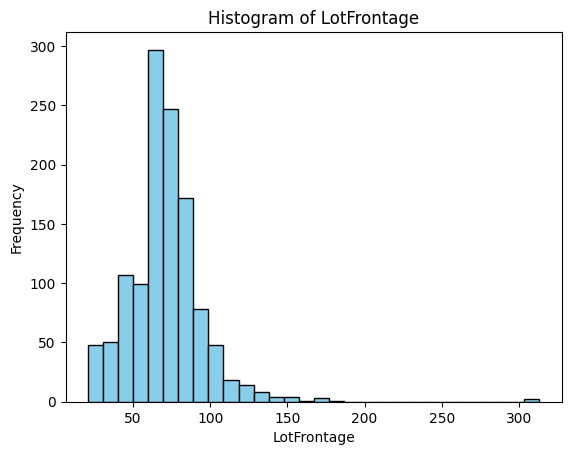

2.163569142324884


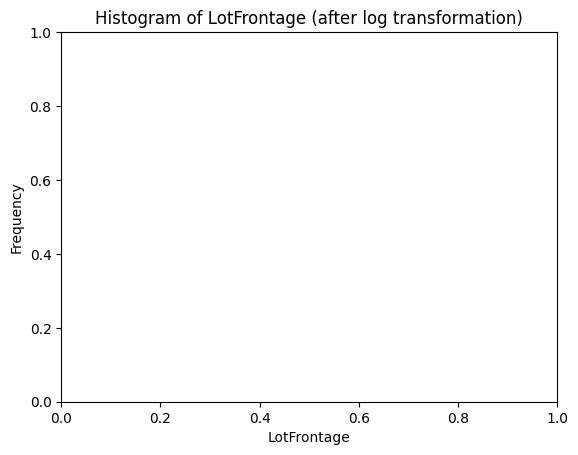

-0.7287278423055492
0.3324772024076358
LotFrontage
4.248495    270
4.110874    143
4.262680     70
4.394449     69
3.931826     57
           ... 
5.209486      1
5.081404      1
5.030438      1
5.036953      1
3.850148      1
Name: count, Length: 110, dtype: int64
5.749392985908253


In [ ]:
plt.hist(df['LotFrontage'], bins=30, color='skyblue', edgecolor='black')

plt.title('Histogram of LotFrontage')
plt.xlabel('LotFrontage')
plt.ylabel('Frequency')
plt.show()
print(df['LotFrontage'].skew())

df['LotFrontage'] = np.log1p(df['LotFrontage'])

plt.title('Histogram of LotFrontage (after log transformation)')
plt.xlabel('LotFrontage')
plt.ylabel('Frequency')
plt.show()
print(df['LotFrontage'].skew())


df['LotFrontage'] = df['LotFrontage'].replace({np.nan: df['LotFrontage'].median()})
print(df['LotFrontage'].corr(df['SalePrice']))
print(df['LotFrontage'].value_counts(dropna=False))

print(df['LotFrontage'].max())


Highly Correlated Features (Threshold > 0.8):
YearBuilt ↔ GarageYrBlt : 0.83
GrLivArea ↔ TotRmsAbvGrd : 0.83
TotRmsAbvGrd ↔ GrLivArea : 0.83
GarageYrBlt ↔ YearBuilt : 0.83
GarageCars ↔ GarageArea : 0.88
GarageArea ↔ GarageCars : 0.88


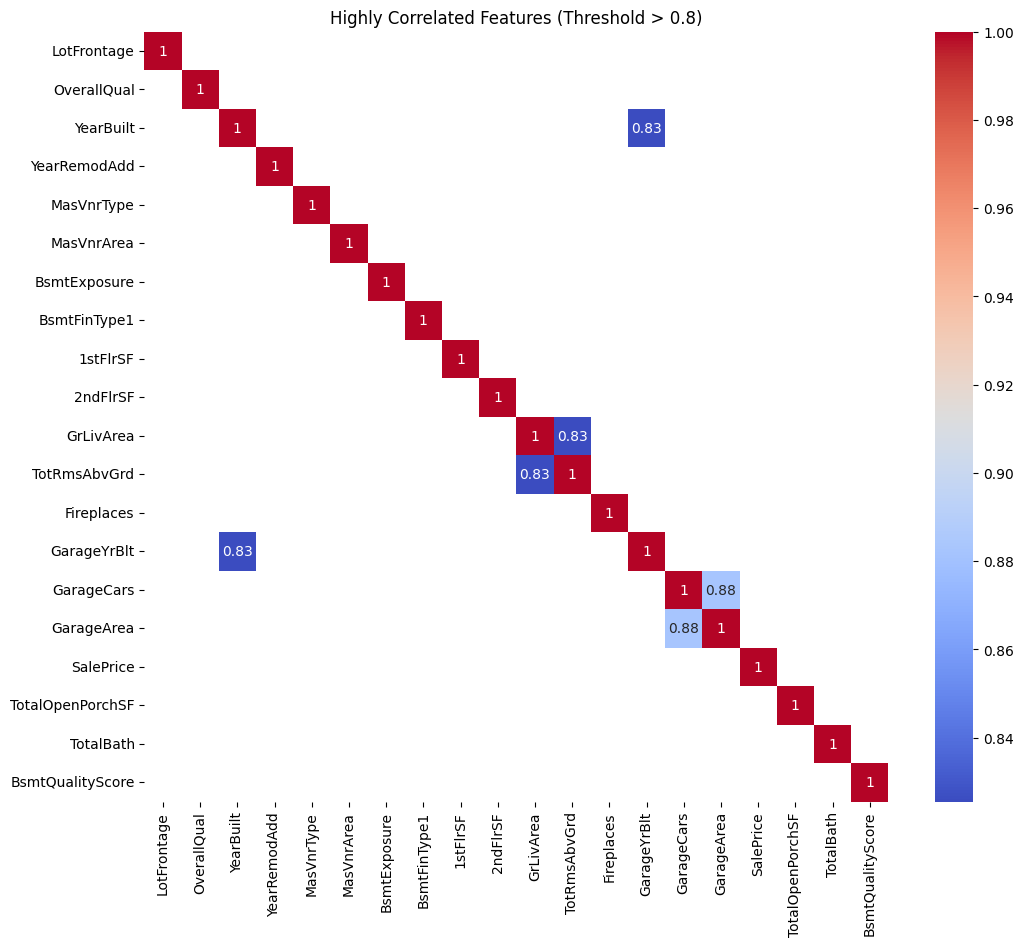

In [ ]:
numeric_cols = df.select_dtypes(include='number')

corr_matrix = numeric_cols.corr().abs()

threshold = 0.8

high_corr_pairs = [(i, j, corr_matrix.loc[i, j])
                   for i in corr_matrix.columns
                   for j in corr_matrix.columns
                   if i != j and corr_matrix.loc[i, j] > threshold]

print("Highly Correlated Features (Threshold > 0.8):")
for feature1, feature2, corr_value in high_corr_pairs:
    print(f"{feature1} ↔ {feature2} : {corr_value:.2f}")

mask = (corr_matrix < threshold)

# Plot the heatmap with only highly correlated values
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm')
plt.title('Highly Correlated Features (Threshold > 0.8)')
plt.show()

0.6234314389183618
0.6404091972583529
0.680057845858432


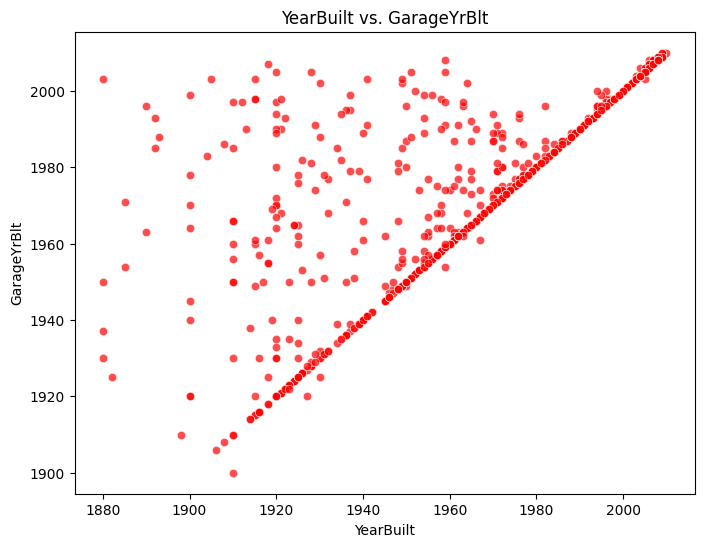

0.48636167748786097


In [ ]:
garage_features = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

df['GarageLuxury'] = df['GarageArea'] * df['GarageCars']
print(df['GarageArea'].corr(df['SalePrice']))
print(df['GarageCars'].corr(df['SalePrice']))
print(df['GarageLuxury'].corr(df['SalePrice']))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['YearBuilt'], y=df['GarageYrBlt'], alpha=0.7, color='red')

plt.title('YearBuilt vs. GarageYrBlt')
plt.xlabel('YearBuilt')
plt.ylabel('GarageYrBlt')
plt.show()
print(df['GarageYrBlt'].corr(df['SalePrice']))

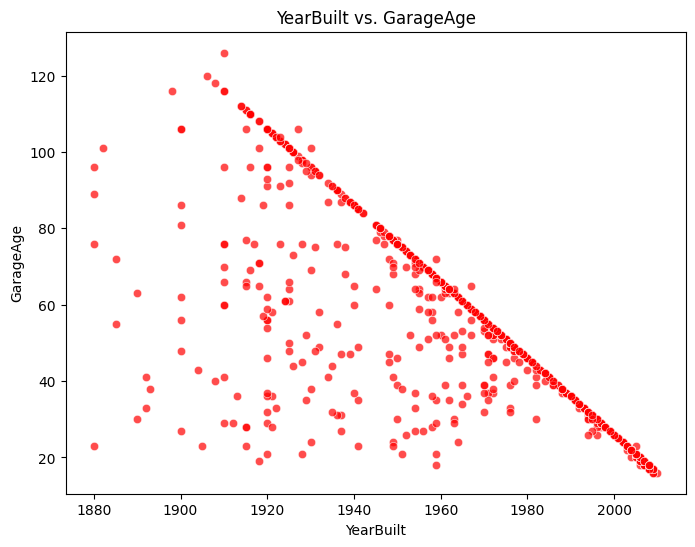

-0.48636167748786074


In [ ]:
df['GarageAge'] = 2026 - df['GarageYrBlt']

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['YearBuilt'], y=df['GarageAge'], alpha=0.7, color='red')

plt.title('YearBuilt vs. GarageAge')
plt.xlabel('YearBuilt')
plt.ylabel('GarageAge')
plt.show()

print(df['GarageAge'].corr(df['SalePrice']))

GarageType
Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64


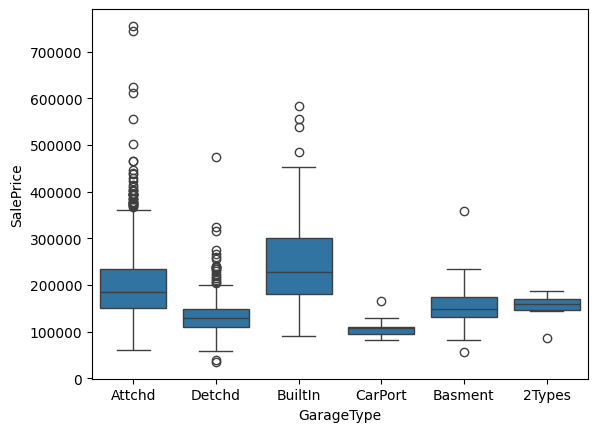

GarageType
Attchd     870
Detchd     468
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64


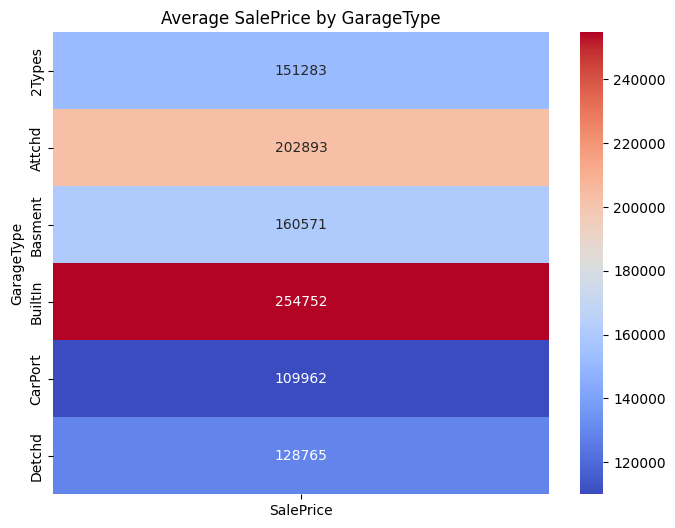

np.float64(0.49225529289964304)

In [ ]:
print(df['GarageType'].value_counts(dropna=False))
sns.boxplot(x='GarageType', y='SalePrice', data=df)
plt.show()

df['GarageType'] = df['GarageType'].replace({np.nan: df['GarageType'].value_counts().index[1]})
print(df['GarageType'].value_counts(dropna=False))

category_summary = df.pivot_table(index='GarageType', values='SalePrice', aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(category_summary, annot=True, cmap='coolwarm', fmt=".0f")

plt.title('Average SalePrice by GarageType')
plt.show()

#target encoding may not be the best solution
target_map = df.groupby('GarageType')['SalePrice'].mean().to_dict()
df['GarageType'] = df['GarageType'].map(target_map)
df['GarageType'].corr(df['SalePrice'])

In [ ]:
garage_mapping = {
    'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, np.nan: 0},
    'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0},
    'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0}
}

print(df['GarageLuxury'].value_counts(dropna=False))

nan_records = df[df['GarageLuxury'] == 0]
print(nan_records[list(garage_mapping.keys())])


for col, mapping in garage_mapping.items():
    df[col] = df[col].map(mapping)
    print(df[col].value_counts(dropna=False))


GarageLuxury
0       81
880     47
1152    47
240     38
968     33
        ..
213      1
2532     1
2580     1
287      1
1272     1
Name: count, Length: 490, dtype: int64
     GarageFinish GarageQual GarageCond
39            NaN        NaN        NaN
48            NaN        NaN        NaN
78            NaN        NaN        NaN
88            NaN        NaN        NaN
89            NaN        NaN        NaN
...           ...        ...        ...
1349          NaN        NaN        NaN
1407          NaN        NaN        NaN
1449          NaN        NaN        NaN
1450          NaN        NaN        NaN
1453          NaN        NaN        NaN

[81 rows x 3 columns]
GarageFinish
1    605
2    422
3    352
0     81
Name: count, dtype: int64
GarageQual
3    1311
0      81
2      48
4      14
5       3
1       3
Name: count, dtype: int64
GarageCond
3    1326
0      81
2      35
4       9
1       7
5       2
Name: count, dtype: int64


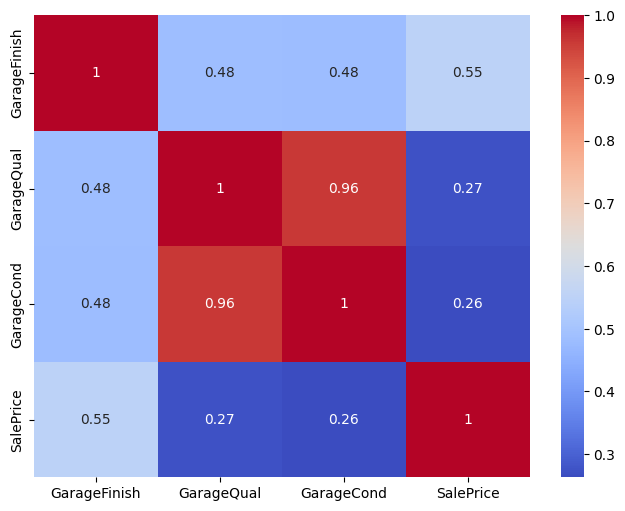

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[list(garage_mapping.keys()) + ['SalePrice']].corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df['GarageScore'] = df['GarageQual'] * df['GarageCond']
print(df['GarageScore'].corr(df['SalePrice']))

0.2740104771934045


In [ ]:
df.drop(['GarageArea', 'GarageCars', 'GarageYrBlt', 'GarageAge', 'GarageScore', 'GarageQual', 'GarageCond' ], axis=1, inplace=True)

In [ ]:
categorical_columns = df.select_dtypes(include=['category','object']).columns.tolist()

for col in categorical_columns:
    print(f"{col} : {df[col].isna().sum()}")


print(df['Electrical'].value_counts(dropna=False))

df['Electrical'].replace({np.nan: df['Electrical'].mode()[0]}, inplace=True)

electrical_mapping = {
    'SBrkr': 4,   # Best (Most modern and safest)
    'FuseA': 3,   # Average (Still reliable)
    'FuseF': 2,   # Fair (Older, less safe)
    'FuseP': 1,   # Poor (Outdated, least safe)
    'Mix': 0      # Mixed (Ambiguous or unknown)
}
df['Electrical'] = df['Electrical'].map(electrical_mapping)
print(df['Electrical'].corr(df['SalePrice']))

df.drop(['Electrical'], axis=1, inplace=True)

MSZoning : 0
LotShape : 0
LandContour : 0
LotConfig : 0
Neighborhood : 0
Condition1 : 0
Condition2 : 0
BldgType : 0
HouseStyle : 0
RoofStyle : 0
RoofMatl : 0
Exterior1st : 0
Exterior2nd : 0
ExterQual : 0
ExterCond : 0
Foundation : 0
Electrical : 1
KitchenQual : 0
Functional : 0
FireplaceQu : 690
PavedDrive : 0
SaleType : 0
SaleCondition : 0
Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: count, dtype: int64
0.233549037673985


<ipython-input-1954-911faa284569>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electrical'].replace({np.nan: df['Electrical'].mode()[0]}, inplace=True)


In [ ]:
print(df['Neighborhood'].value_counts(dropna=False))

neighborhood_mean_price = df.groupby('Neighborhood')['SalePrice'].mean()
df['Neighborhood'] = df['Neighborhood'].map(neighborhood_mean_price)

print(df['Neighborhood'].corr(df['SalePrice']))

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64
0.7386304832658636


In [ ]:
condition_mapping = {
    'PosA': 'Highly desirable',      # Adjacent to positive feature
    'PosN': 'More desirable',        # Near positive feature
    'Norm': 'Neutral',               # Normal location (baseline)
    'Feedr': 'Mildly undesirable',   # Adjacent to feeder street (light traffic)
    'Artery': 'Less desirable',      # Adjacent to arterial (busier)
    'RRNn': 'Mildly undesirable',    # Within 200' of North-South Railroad
    'RRNe': 'Mildly undesirable',    # Within 200' of East-West Railroad
    'RRAn': 'Most undesirable',      # Adjacent to North-South Railroad (worst)
    'RRAe': 'Most undesirable'       # Adjacent to East-West Railroad (worst)
}

Index(['MSZoning', 'LotFrontage', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType',
       'SaleCondition', 'SalePrice', 'TotalOpenPorchSF', 'TotalBath',
       'BsmtQualityScore', 'GarageLuxury', 'Condition1_Highly desirable',
       'Condition1_Less desirable', 'Condition1_Mildly undesirable',
       'Condition1_More desirable', 'Condition1_Most undesirable',
       'Condition1_Neutral', 'Condition2_Highly desirable',
       'Condition2_Less desirable', 'Condition2_Mildly undesirable',
       'Condition2_More desirable', 'Condition2_Most undesirable',


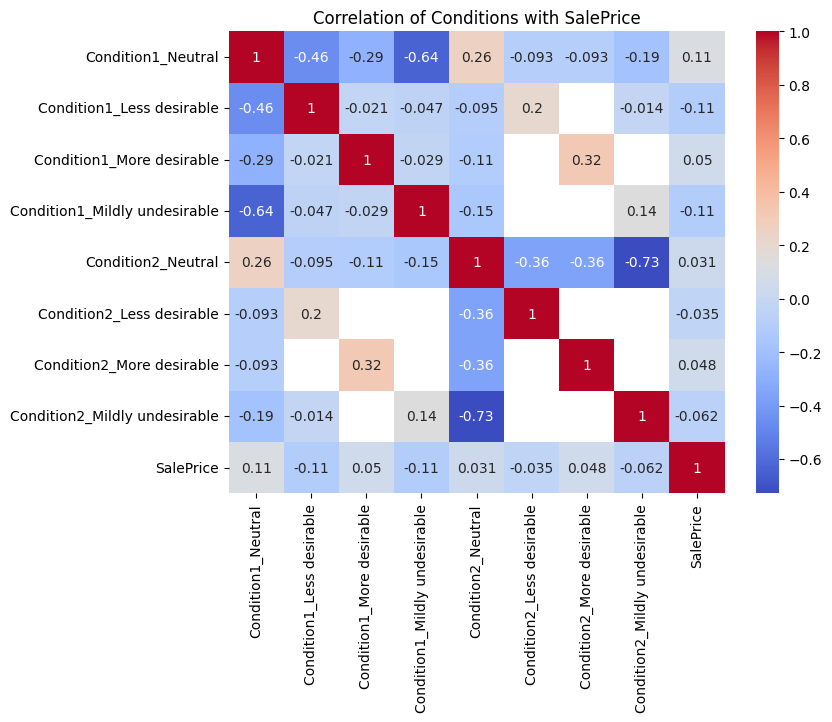

In [ ]:
df['Condition1'] = df['Condition1'].map(condition_mapping)
df['Condition2'] = df['Condition2'].map(condition_mapping)

df_encoded = pd.get_dummies(df, columns=['Condition1', 'Condition2'], drop_first=False)
print(df_encoded.columns)

corr_mat = df_encoded[['Condition1_Neutral',
          'Condition1_Less desirable',
          'Condition1_More desirable',
          'Condition1_Mildly undesirable',
          'Condition2_Neutral',
          'Condition2_Less desirable',
          'Condition2_More desirable',
          'Condition2_Mildly undesirable', 'SalePrice']].corr()

mask = (corr_mat.abs() <= 0.01)

# Visualize with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, mask=mask, annot=True, cmap='coolwarm')
plt.title('Correlation of Conditions with SalePrice')
plt.show()

In [ ]:
new_cond_mapping = {
    'Neutral': 2,
    'Less desirable': 1,
    'More desirable': 3,
    'Mildly undesirable': 0
}

df['Condition1'] = df['Condition1'].map(new_cond_mapping)
df['Condition2'] = df['Condition2'].map(new_cond_mapping)

df['ConditionScore'] = df['Condition1'] + df['Condition2']
print(df['Condition1'].corr(df['SalePrice']))
print(df['Condition2'].corr(df['SalePrice']))
print(df['ConditionScore'].corr(df['SalePrice']))

df.drop(['Condition1', 'Condition2', 'ConditionScore'], axis=1, inplace=True)

0.14714055396765638
0.07769072853747883
0.15535286392934075


Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64
Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64


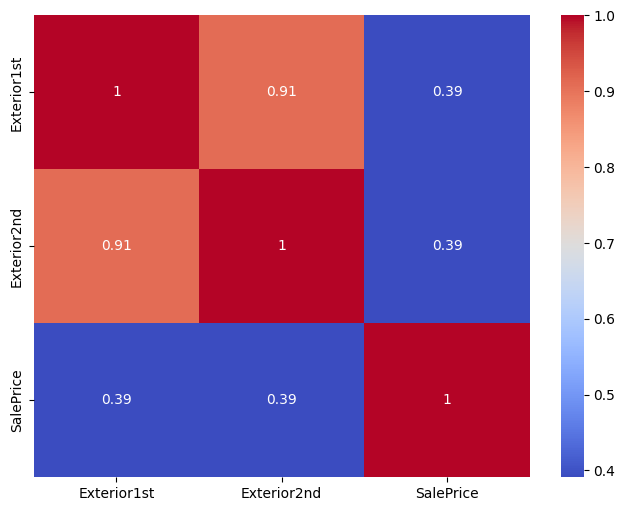

0.4008850167710475


In [ ]:
print(df['Exterior1st'].value_counts(dropna=False))
print(df['Exterior2nd'].value_counts(dropna=False))

exterior1st_mean_price = df.groupby('Exterior1st')['SalePrice'].mean()
df['Exterior1st'] = df['Exterior1st'].map(exterior1st_mean_price)

exterior2nd_mean_price = df.groupby('Exterior2nd')['SalePrice'].mean()
df['Exterior2nd'] = df['Exterior2nd'].map(exterior2nd_mean_price)

cor_mat = df[['Exterior1st', 'Exterior2nd', 'SalePrice']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm')
plt.show()

df['TotalExteriorScore'] = df['Exterior1st'] + df['Exterior2nd']
print(df['TotalExteriorScore'].corr(df['SalePrice']))

df.drop(['Exterior1st', 'Exterior2nd'], axis=1, inplace=True)

           ExterQual  ExterCond  SalePrice
ExterQual   1.000000   0.009184   0.682639
ExterCond   0.009184   1.000000   0.018899
SalePrice   0.682639   0.018899   1.000000


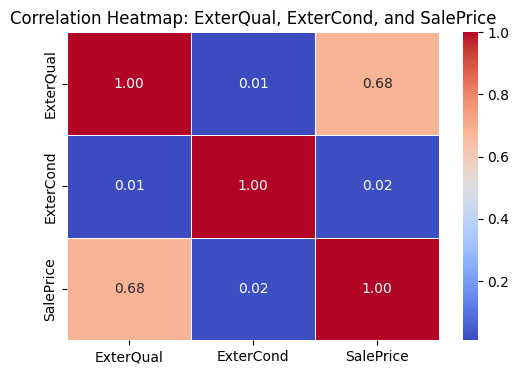

In [ ]:
ordinal_mapping = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}

df["ExterQual"] = df["ExterQual"].map(ordinal_mapping)
df["ExterCond"] = df["ExterCond"].map(ordinal_mapping)

correlation_matrix = df[["ExterQual", "ExterCond", "SalePrice"]].corr()
print(correlation_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: ExterQual, ExterCond, and SalePrice")
plt.show()

df = df.drop(columns=["ExterCond"])

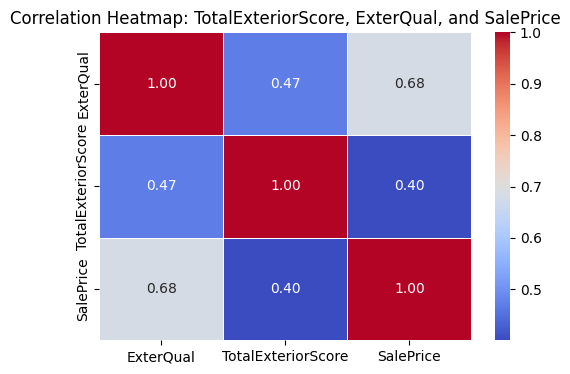

In [ ]:
corr_mat = df[["ExterQual", "TotalExteriorScore", "SalePrice"]].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: TotalExteriorScore, ExterQual, and SalePrice")
plt.show()

Fireplaces
0    690
1    650
2    115
3      5
Name: count, dtype: int64


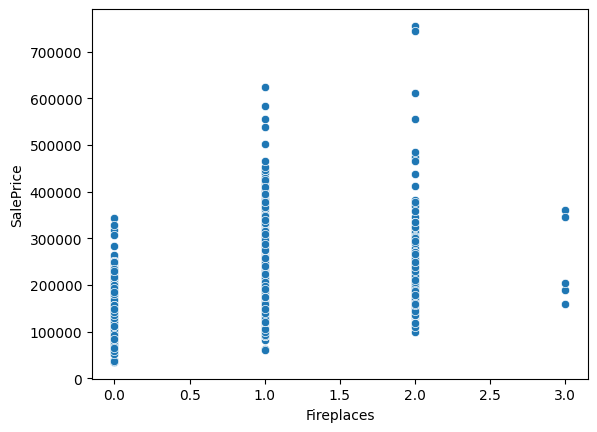

0.46692883675152724


In [ ]:
print(df['Fireplaces'].value_counts(dropna=False))

sns.scatterplot(x=df['Fireplaces'], y=df['SalePrice'])
plt.show()

print(df['Fireplaces'].corr(df['SalePrice']))

Before Mapping:
FireplaceQu
NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64
Fireplaces
0    690
1    650
2    115
3      5
Name: count, dtype: int64

After Mapping:
FireplaceQu
0    690
4    380
3    313
2     33
5     24
1     20
Name: count, dtype: int64


<ipython-input-1963-4ad951753ca8>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].replace(np.nan, 'NA', inplace=True)


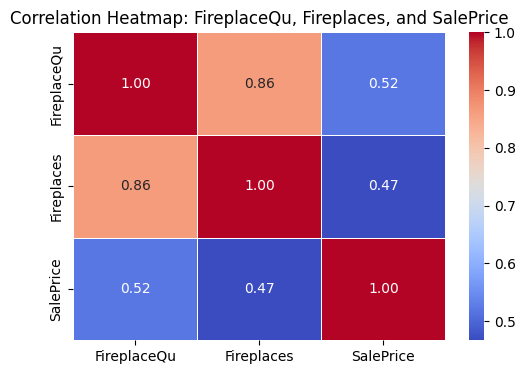


Correlation (FireplaceScore vs. SalePrice): 0.5100


In [ ]:
# Fireplace Quality Mapping (Ordinal)
fireplace_mapping = {
    'Ex': 5,   # Excellent
    'Gd': 4,   # Good
    'TA': 3,   # Average
    'Fa': 2,   # Fair
    'Po': 1,   # Poor
    'NA': 0    # No Fireplace (or Missing)
}

df['FireplaceQu'].replace(np.nan, 'NA', inplace=True)

print("Before Mapping:")
print(df['FireplaceQu'].value_counts(dropna=False))
print(df['Fireplaces'].value_counts(dropna=False))

df["FireplaceQu"] = df["FireplaceQu"].map(fireplace_mapping)

print("\nAfter Mapping:")
print(df['FireplaceQu'].value_counts(dropna=False))

corr_mat = df[["FireplaceQu", "Fireplaces", "SalePrice"]].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: FireplaceQu, Fireplaces, and SalePrice")
plt.show()

df['FireplaceScore'] = df['FireplaceQu'] * df['Fireplaces']

print(f"\nCorrelation (FireplaceScore vs. SalePrice): {df['FireplaceScore'].corr(df['SalePrice']):.4f}")

df.drop(['FireplaceScore', 'Fireplaces'], axis=1, inplace=True)

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64
SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64


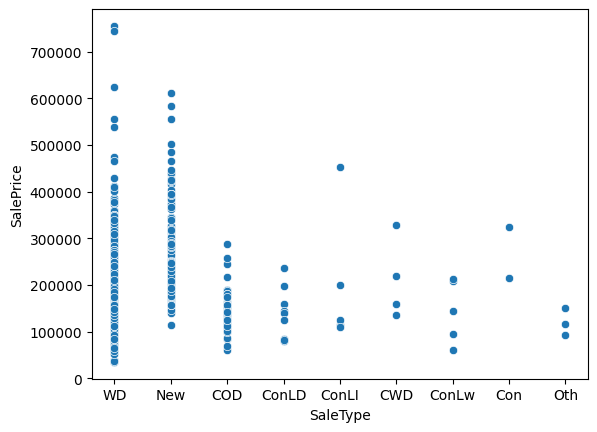

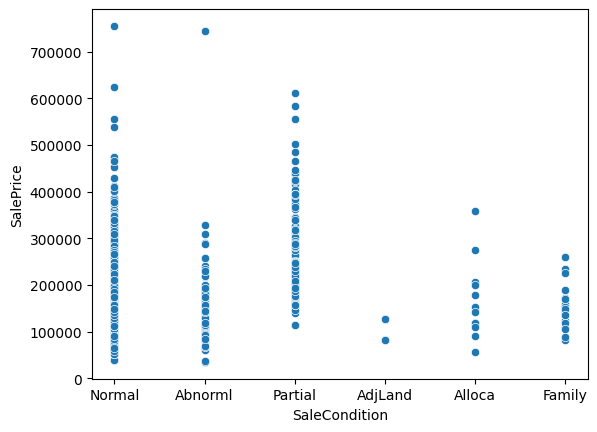

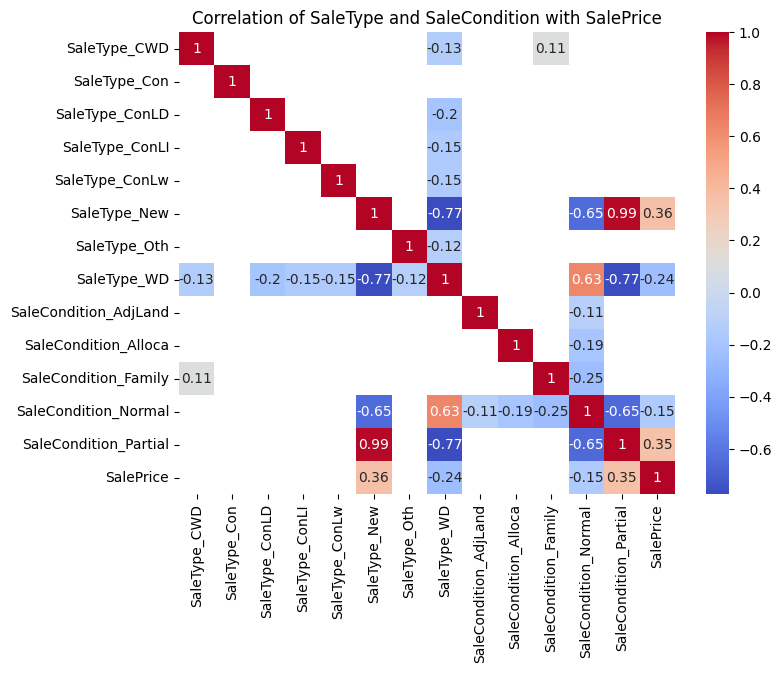

Index(['MSZoning', 'LotFrontage', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'Foundation', 'BsmtExposure', 'BsmtFinType1', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'PavedDrive', 'SalePrice',
       'TotalOpenPorchSF', 'TotalBath', 'BsmtQualityScore', 'GarageLuxury',
       'TotalExteriorScore', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object')


In [ ]:
print(df['SaleType'].value_counts(dropna=False))
print(df['SaleCondition'].value_counts(dropna=False))

sns.scatterplot(x=df['SaleType'], y=df['SalePrice'])
plt.show()

sns.scatterplot(x=df['SaleCondition'], y=df['SalePrice'])
plt.show()

df_encoded = pd.get_dummies(df, columns=['SaleType'], prefix='SaleType', drop_first=True)
df_encoded = pd.get_dummies(df_encoded, columns=['SaleCondition'], prefix='SaleCondition', drop_first=True)

corr_mat = df_encoded[['SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'SalePrice']].corr()

mask = (corr_mat.abs() <= 0.1)

# Visualize with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, mask=mask, annot=True, cmap='coolwarm')
plt.title('Correlation of SaleType and SaleCondition with SalePrice')
plt.show()
print(df_encoded.columns)

df['SaleType_New'] = df_encoded['SaleType_New']
df.drop(['SaleType', 'SaleCondition'], axis=1, inplace=True)

MSZoning : 0
LotShape : 0
LandContour : 0
LotConfig : 0
BldgType : 0
HouseStyle : 0
RoofStyle : 0
RoofMatl : 0
Foundation : 0
KitchenQual : 0
Functional : 0
PavedDrive : 0
PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64


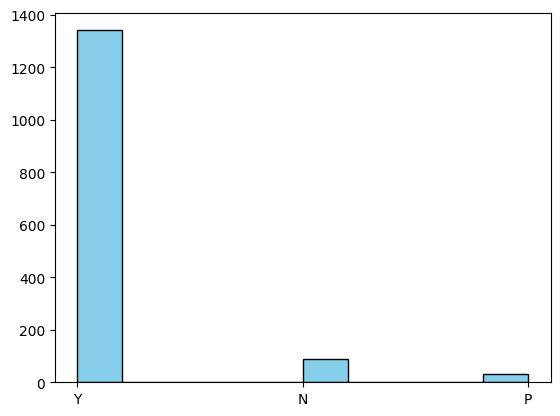

0.23135695225722677


In [ ]:
categorical_columns = df.select_dtypes(include=['category','object']).columns.tolist()

for col in categorical_columns:
    print(f"{col} : {df[col].isna().sum()}")

print(df['PavedDrive'].value_counts())

plt.hist(df['PavedDrive'], bins=10, color='skyblue', edgecolor='black')
plt.show()

df['PavedDrive'] = df['PavedDrive'].map({'Y': 2, 'P': 1, 'N': 0})

print(df['PavedDrive'].corr(df['SalePrice']))
df.drop(['PavedDrive'], axis=1, inplace=True)

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64


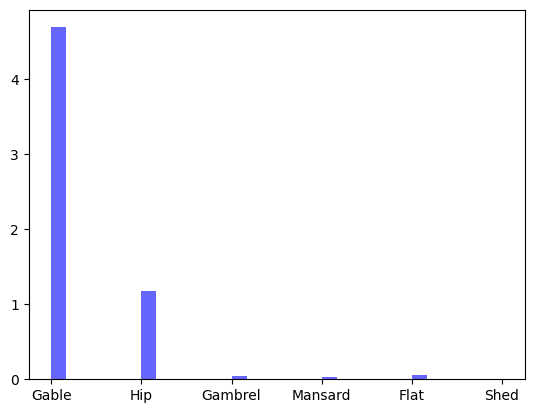

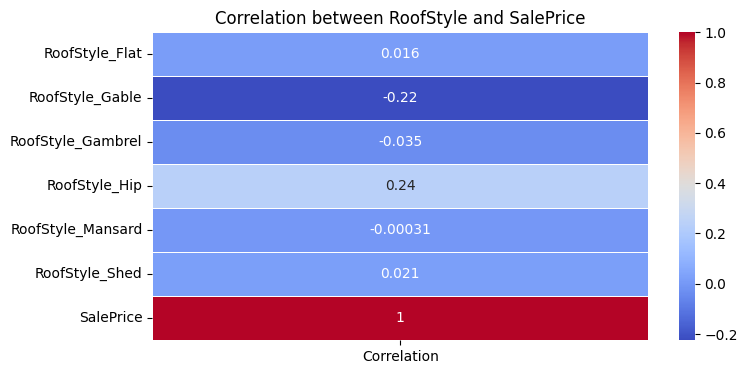

In [ ]:
print(df['RoofStyle'].value_counts())
plt.hist(df['RoofStyle'], bins=30, density=True, alpha=0.6, color='blue')
plt.show()

get_dummies = pd.get_dummies(df['RoofStyle'], prefix='RoofStyle')
get_dummies['SalePrice'] = df['SalePrice']

corr_with_target = get_dummies.corrwith(df['SalePrice']).to_frame(name='Correlation')

plt.figure(figsize=(8, 4))
sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between RoofStyle and SalePrice')
plt.show()


df.drop(['RoofStyle'], axis=1, inplace=True)

In [ ]:
print(df['KitchenQual'].value_counts())

kitchen_map = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1
}
df['KitchenQual'] = df['KitchenQual'].map(kitchen_map)
print(df['KitchenQual'].corr(df['SalePrice']))

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64
0.6595997207286639


MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


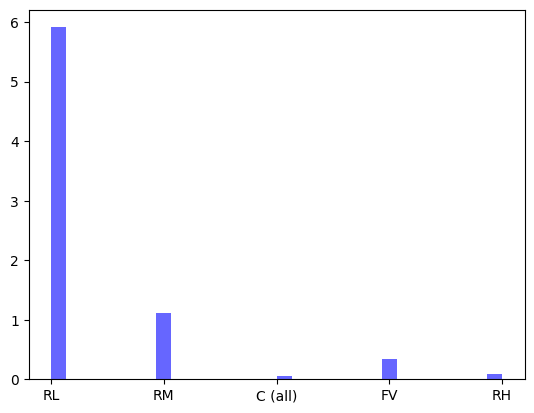

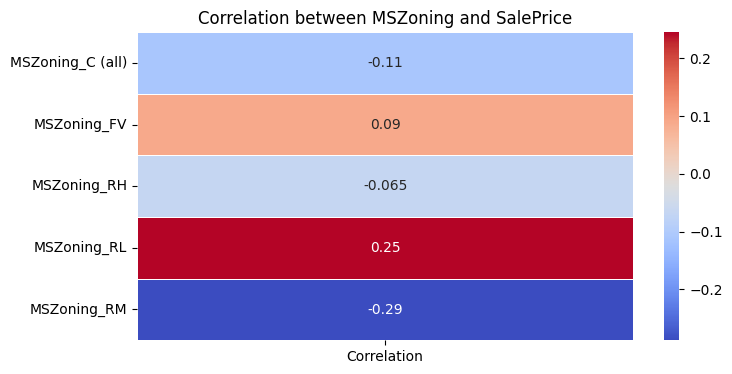

In [ ]:
print(df['MSZoning'].value_counts())
plt.hist(df['MSZoning'], bins=30, density=True, alpha=0.6, color='blue')
plt.show()

get_dummies = pd.get_dummies(df['MSZoning'], prefix='MSZoning')

corr_with_target = get_dummies.corrwith(df['SalePrice']).to_frame(name='Correlation')

plt.figure(figsize=(8, 4))
sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between MSZoning and SalePrice')
plt.show()

df.drop(['MSZoning'], axis=1, inplace=True)

In [ ]:
functional_map = {
    'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4,
    'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0
}

print(df['Functional'].value_counts())

df['Functional'] = df['Functional'].map(functional_map)
print(df['Functional'].value_counts())

print(df['Functional'].corr(df['SalePrice']))
df.drop(['Functional'], axis=1, inplace=True)

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64
Functional
7    1360
5      34
6      31
4      15
3      14
2       5
1       1
Name: count, dtype: int64
0.10761889324399447


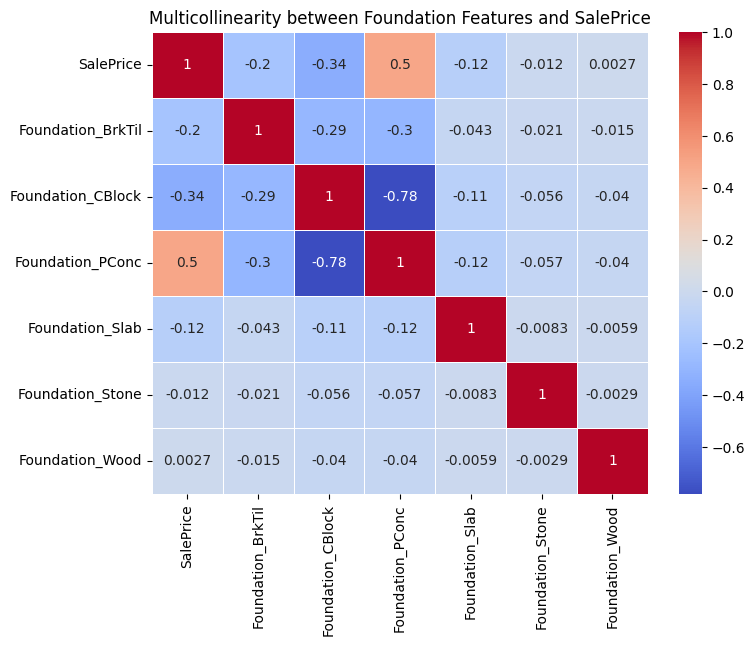

In [ ]:
get_dummies = pd.get_dummies(df['Foundation'], prefix='Foundation')

df_encoded = pd.concat([df['SalePrice'], get_dummies], axis=1)

corr_matrix = df_encoded.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Multicollinearity between Foundation Features and SalePrice')
plt.show()

df['Foundation_PConc'] = df_encoded['Foundation_PConc']
df.drop(['Foundation'], axis=1, inplace=True)

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64


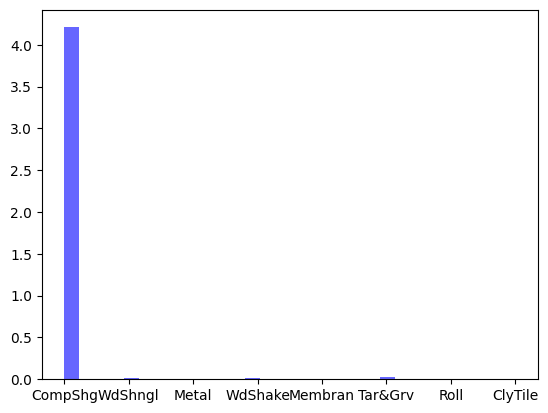

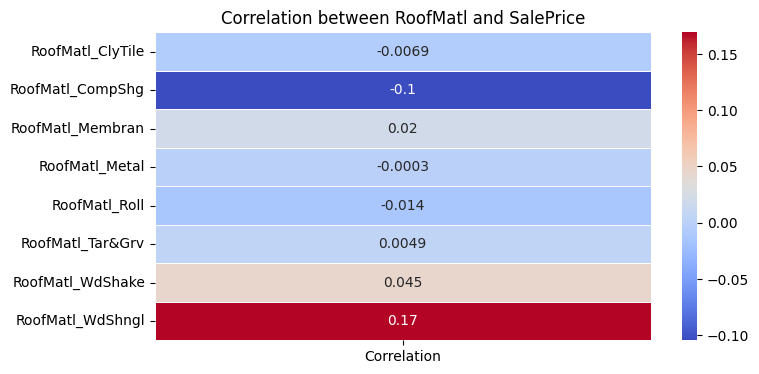

In [ ]:
print(df['RoofMatl'].value_counts())
plt.hist(df['RoofMatl'], bins=30, density=True, alpha=0.6, color='blue')
plt.show()

get_dummies = pd.get_dummies(df['RoofMatl'], prefix='RoofMatl')

corr_with_target = get_dummies.corrwith(df['SalePrice']).to_frame(name='Correlation')

plt.figure(figsize=(8, 4))
sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between RoofMatl and SalePrice')
plt.show()

df.drop(['RoofMatl'], axis=1, inplace=True)

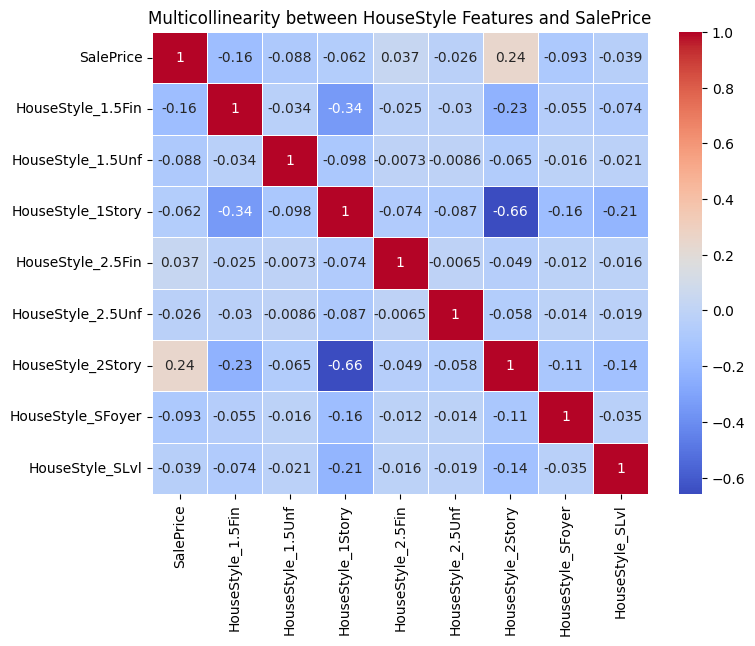

In [ ]:
get_dummies = pd.get_dummies(df['HouseStyle'], prefix='HouseStyle')

df_encoded = pd.concat([df['SalePrice'], get_dummies], axis=1)

corr_matrix = df_encoded.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Multicollinearity between HouseStyle Features and SalePrice')
plt.show()

df.drop(['HouseStyle'], axis=1, inplace=True)

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64


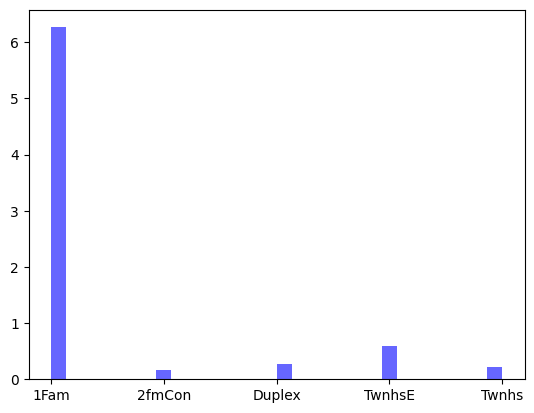

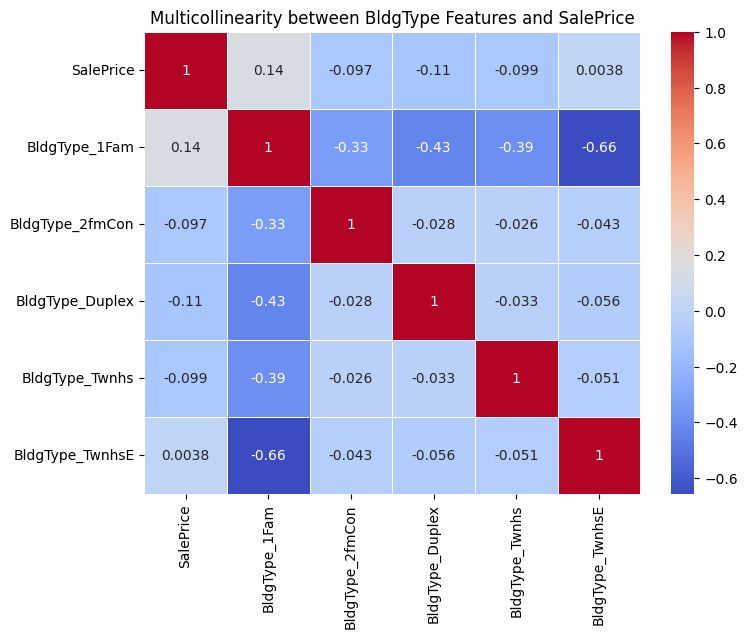

In [ ]:
print(df['BldgType'].value_counts())

plt.hist(df['BldgType'], bins=30, density=True, alpha=0.6, color='blue')
plt.show()

get_dummies = pd.get_dummies(df['BldgType'], prefix='BldgType')

df_encoded = pd.concat([df['SalePrice'], get_dummies], axis=1)

corr_matrix = df_encoded.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Multicollinearity between BldgType Features and SalePrice')
plt.show()

df.drop(['BldgType'], axis=1, inplace=True)

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64


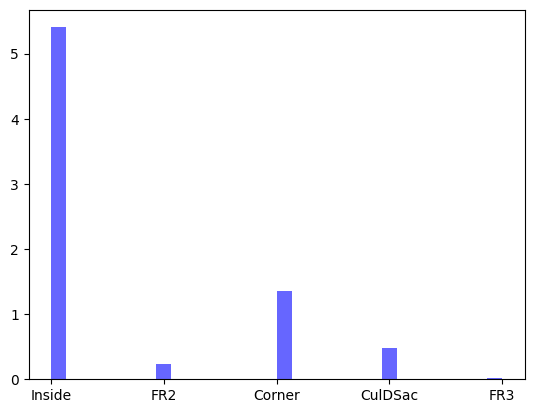

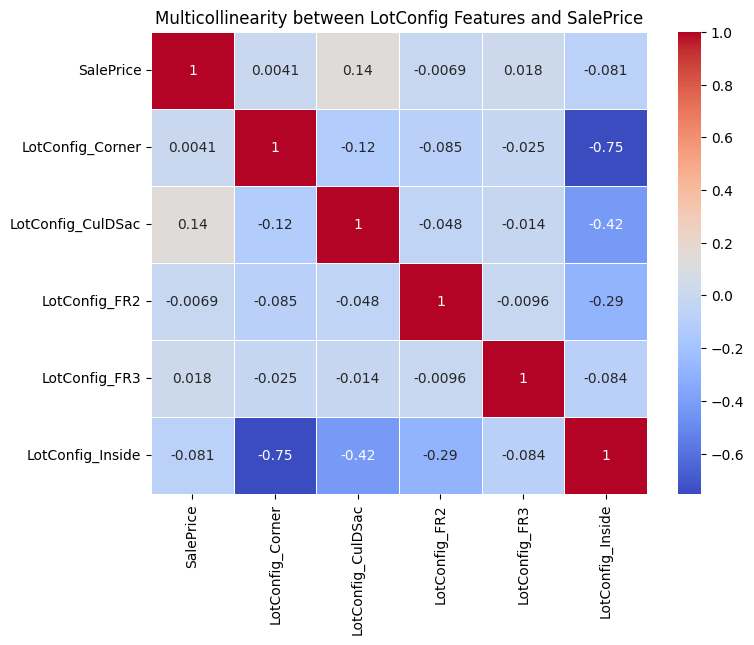

In [ ]:
print(df['LotConfig'].value_counts())

plt.hist(df['LotConfig'], bins=30, density=True, alpha=0.6, color='blue')
plt.show()

get_dummies = pd.get_dummies(df['LotConfig'], prefix='LotConfig')

df_encoded = pd.concat([df['SalePrice'], get_dummies], axis=1)

corr_matrix = df_encoded.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Multicollinearity between LotConfig Features and SalePrice')
plt.show()

df.drop(['LotConfig'], axis=1, inplace=True)

In [ ]:
print(df['LotShape'].value_counts())

lotshape_mapping = {
    'Reg': 3,   # Most regular (most desirable)
    'IR1': 2,   # Slightly irregular (less desirable)
    'IR2': 1,   # Moderately irregular (even less desirable)
    'IR3': 0    # Irregular (least desirable)
}

df['LotShape'] = df['LotShape'].map(lotshape_mapping)
print(df['LotShape'].corr(df['SalePrice']))

df.drop(['LotShape'], axis=1, inplace=True)

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
-0.26775931391782376


In [ ]:
print(df['LandContour'].value_counts())

landcontour_mapping = {
    'Lvl': 3,   # Flat/Level (Most desirable)
    'Bnk': 2,   # Banked (Moderately desirable)
    'HLS': 1,   # Hillside (Less desirable)
    'Low': 0    # Depression (Least desirable)
}

# Apply the ordinal mapping
df['LandContour'] = df['LandContour'].map(landcontour_mapping)
print(df['LandContour'].corr(df['SalePrice']))

df.drop(['LandContour'], axis=1, inplace=True)

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
-0.0730415748938043


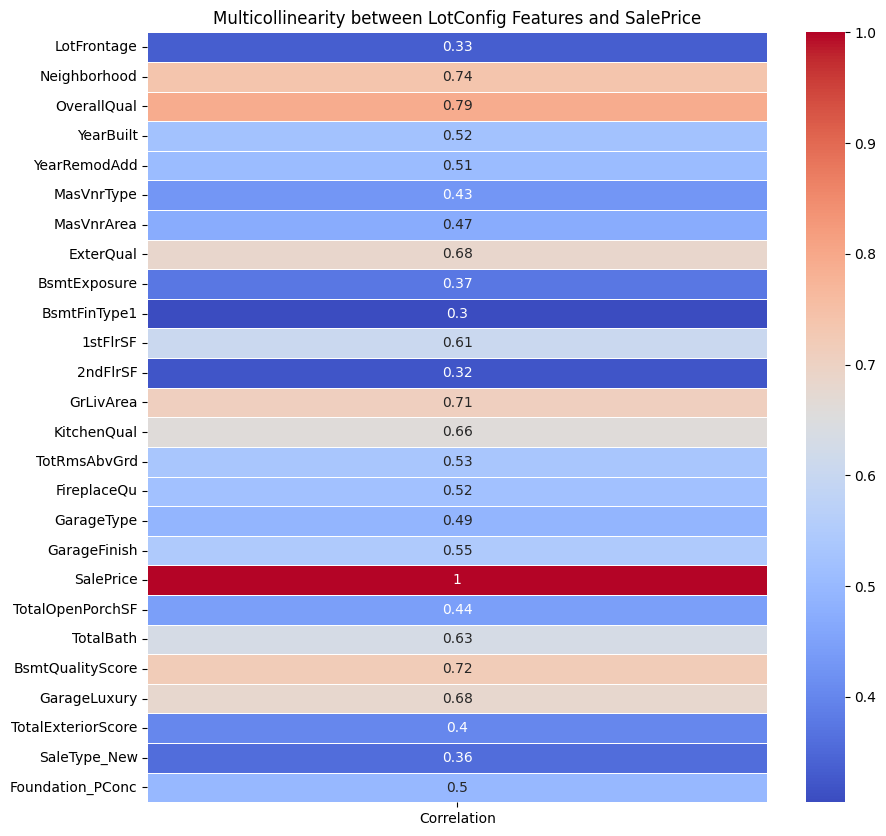

In [ ]:
corr_with_target = df.corrwith(df['SalePrice']).to_frame(name='Correlation')

plt.figure(figsize=(10, 10))
sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Multicollinearity between LotConfig Features and SalePrice')
plt.show()

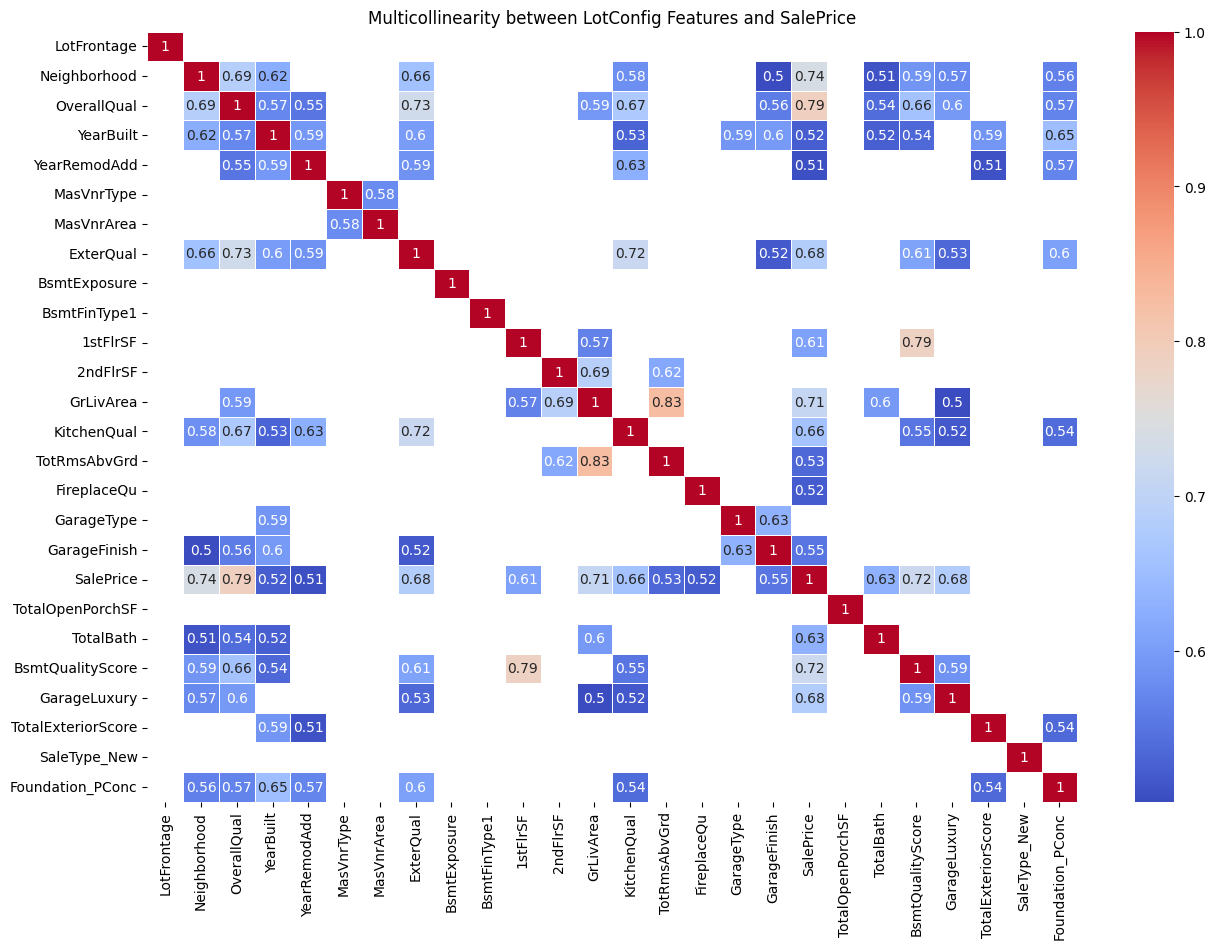

In [ ]:
mask = (df.corr().abs() <= 0.5)

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, mask=mask, cmap='coolwarm', linewidths=0.5)
plt.title('Multicollinearity between LotConfig Features and SalePrice')
plt.show()

In [ ]:
print(df['GrLivArea'].corr(df['SalePrice']))
print(df['TotRmsAbvGrd'].corr(df['SalePrice']))
print(df['GrLivArea'].corr(df['TotRmsAbvGrd']))

df.drop(['TotRmsAbvGrd'], axis=1, inplace=True)

0.7086244776126523
0.5337231555820282
0.8254893743088426


In [ ]:
for col in df.columns:
    print(df[col].value_counts(dropna=False))


LotFrontage
4.248495    270
4.110874    143
4.262680     70
4.394449     69
3.931826     57
           ... 
5.209486      1
5.081404      1
5.030438      1
5.036953      1
3.850148      1
Name: count, Length: 110, dtype: int64
Neighborhood
145847.080000    225
197965.773333    150
128225.300885    113
128219.700000    100
225379.837209     86
192854.506329     79
316270.623377     77
136793.135135     74
189050.068493     73
186555.796610     59
124834.051724     58
210624.725490     51
156270.122449     49
335295.317073     41
242247.447368     38
100123.783784     37
212565.428571     28
142591.360000     25
310499.000000     25
194870.882353     17
98576.470588      17
104493.750000     16
238772.727273     11
142694.444444      9
137500.000000      2
Name: count, dtype: int64
OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64
YearBuilt
2006    67
2005    64
2004    54
2007    49
2003    45
      

In [ ]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers = detect_outliers_iqr(df, "SalePrice")
print(outliers.info())

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 11 to 1437
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LotFrontage         61 non-null     float64
 1   Neighborhood        61 non-null     float64
 2   OverallQual         61 non-null     int64  
 3   YearBuilt           61 non-null     int64  
 4   YearRemodAdd        61 non-null     int64  
 5   MasVnrType          61 non-null     float64
 6   MasVnrArea          61 non-null     float64
 7   ExterQual           61 non-null     int64  
 8   BsmtExposure        61 non-null     float64
 9   BsmtFinType1        61 non-null     float64
 10  1stFlrSF            61 non-null     int64  
 11  2ndFlrSF            61 non-null     int64  
 12  GrLivArea           61 non-null     int64  
 13  KitchenQual         61 non-null     int64  
 14  FireplaceQu         61 non-null     int64  
 15  GarageType          61 non-null     float64
 16  GarageFinish

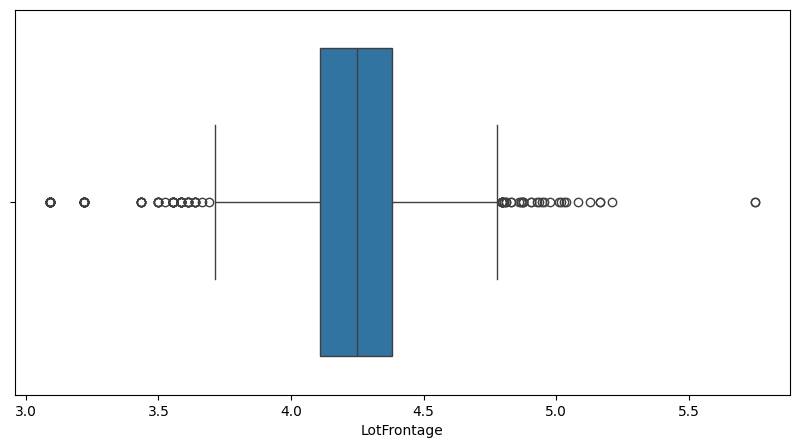

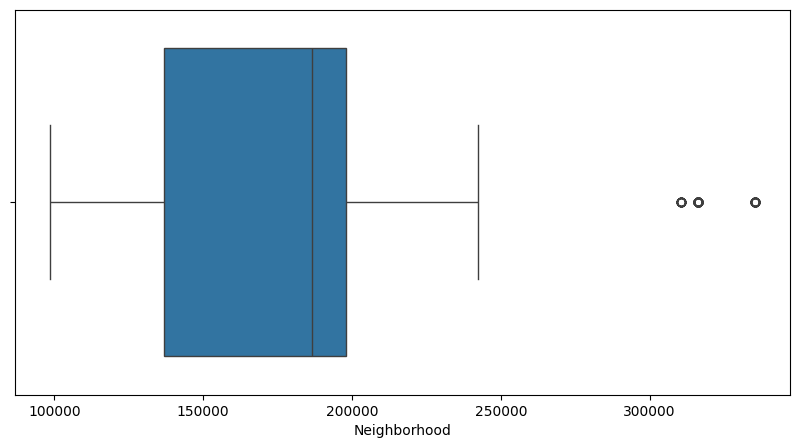

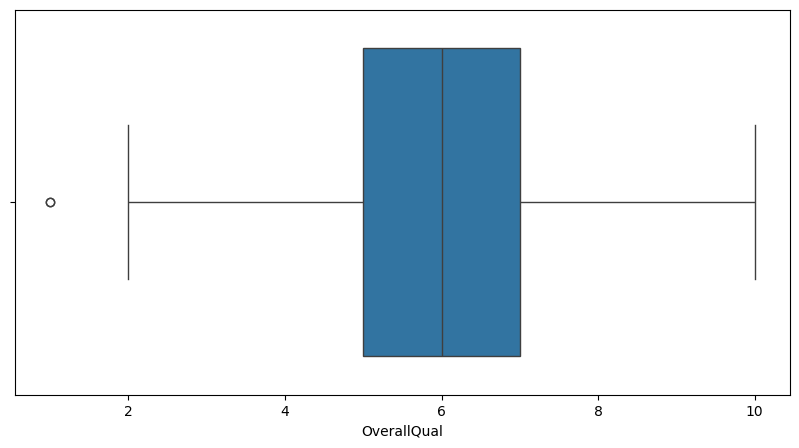

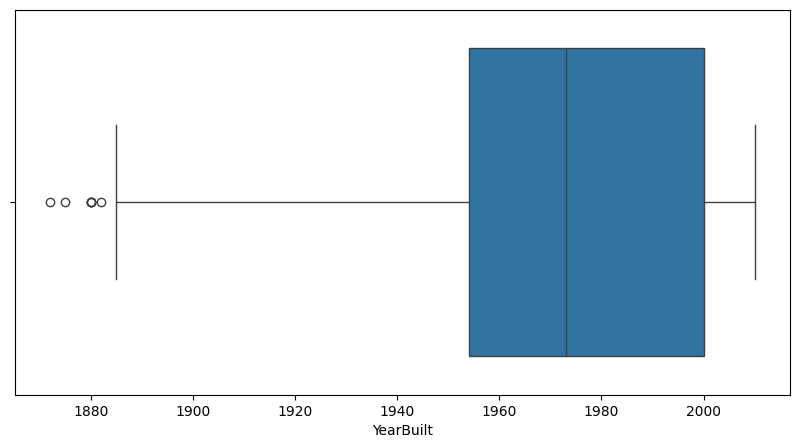

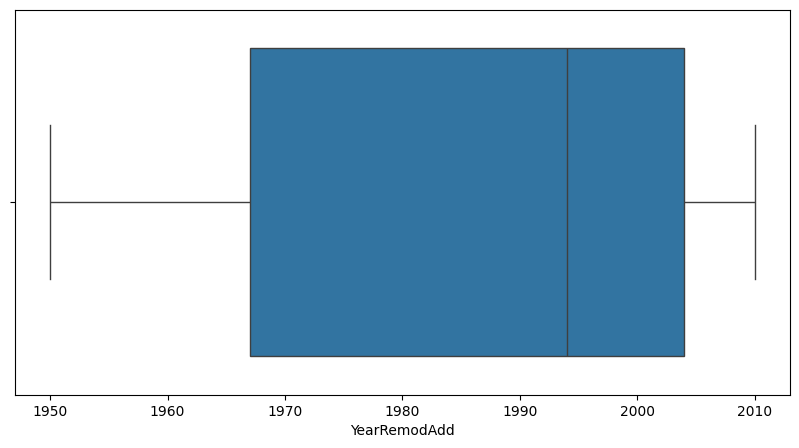

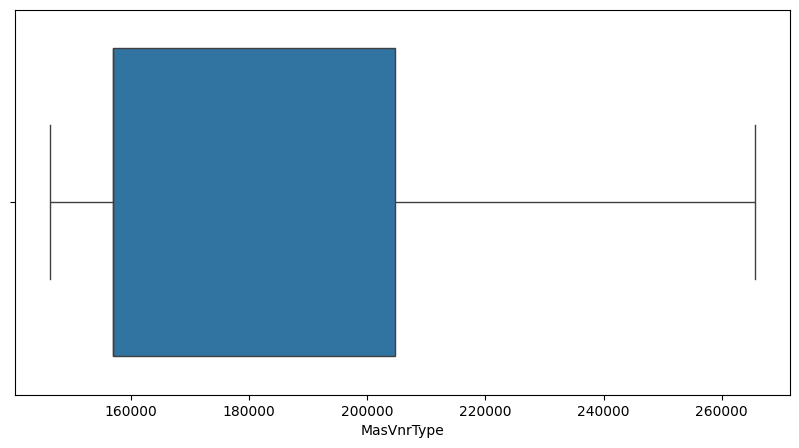

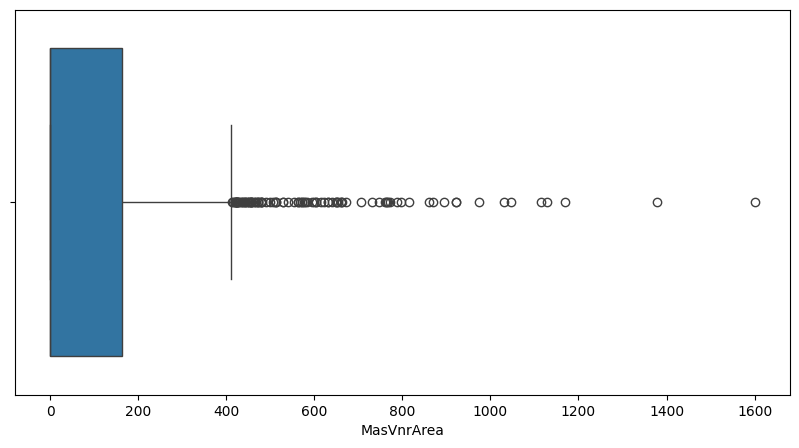

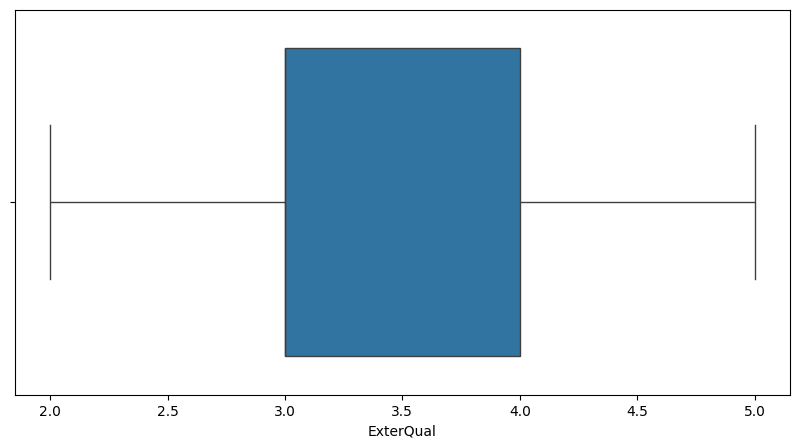

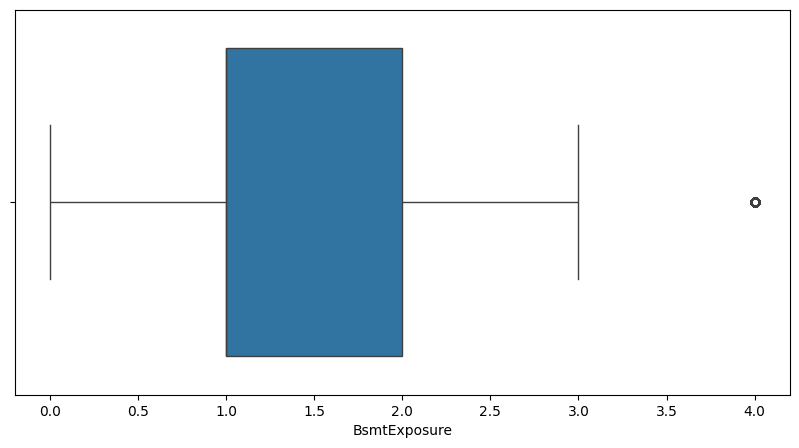

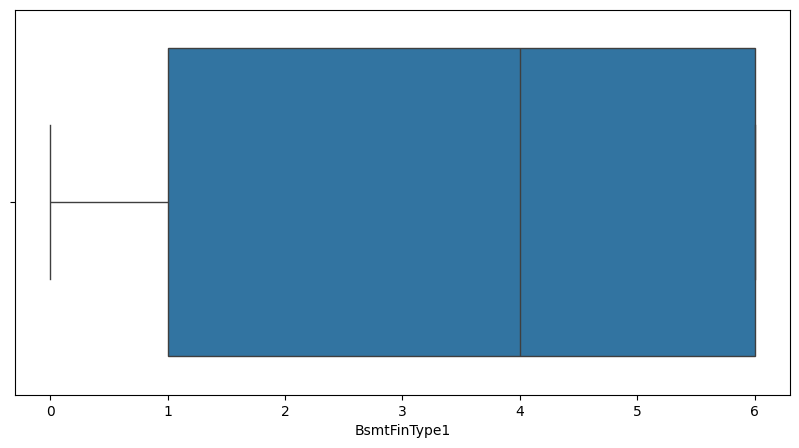

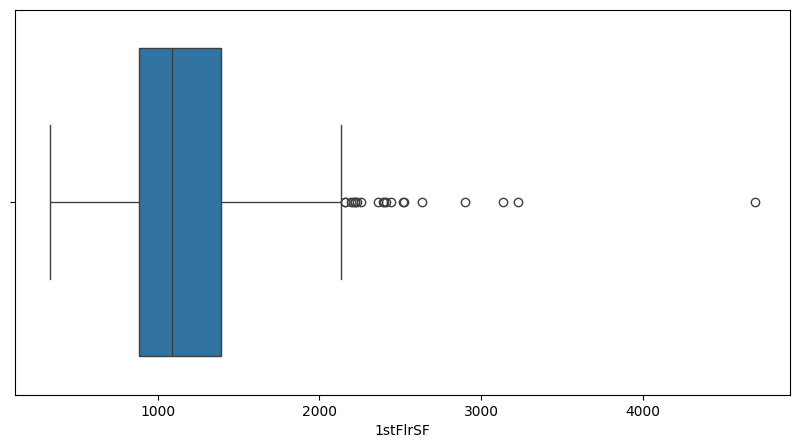

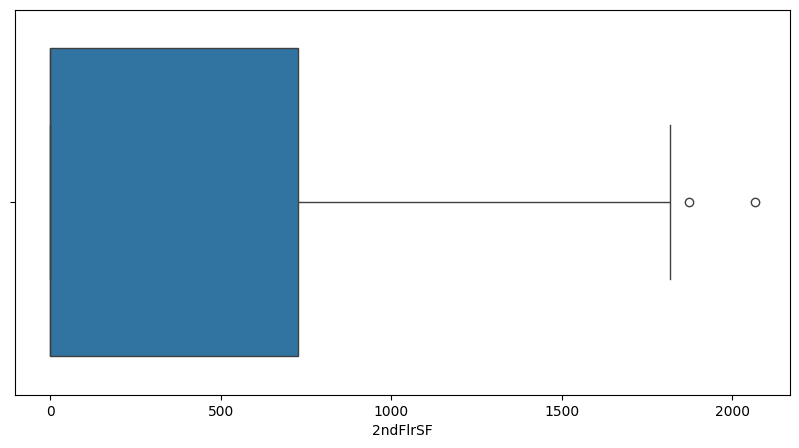

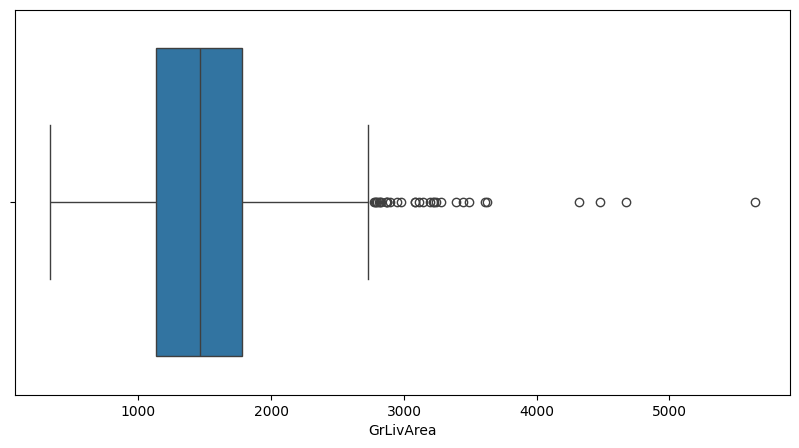

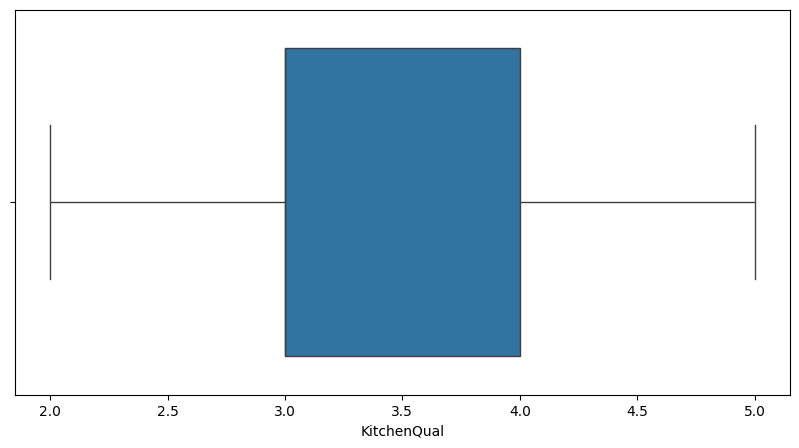

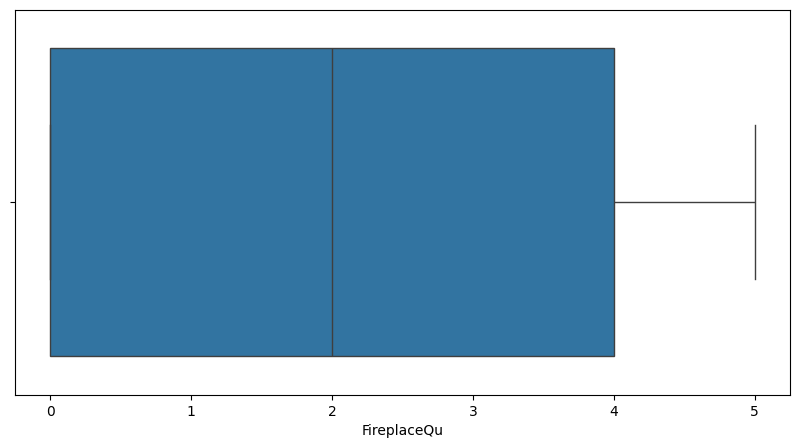

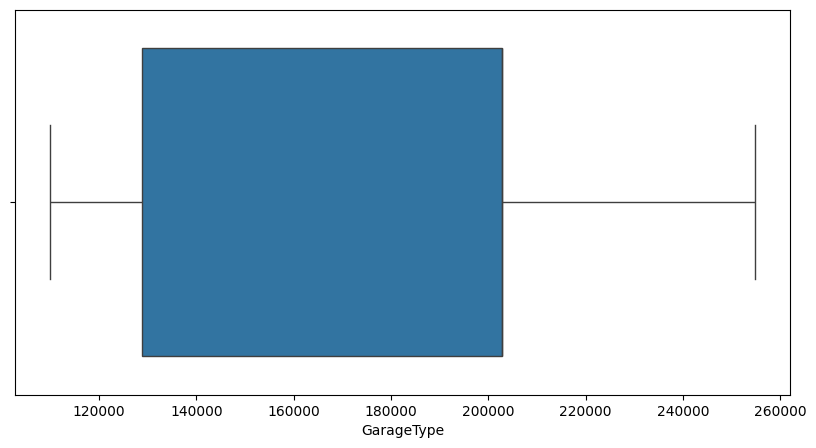

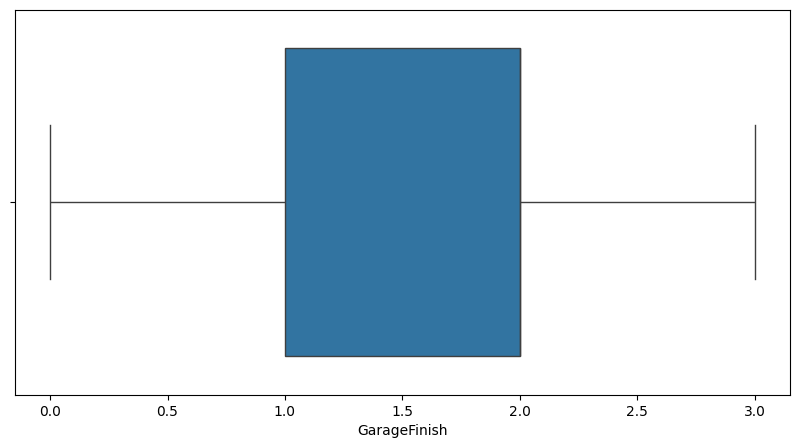

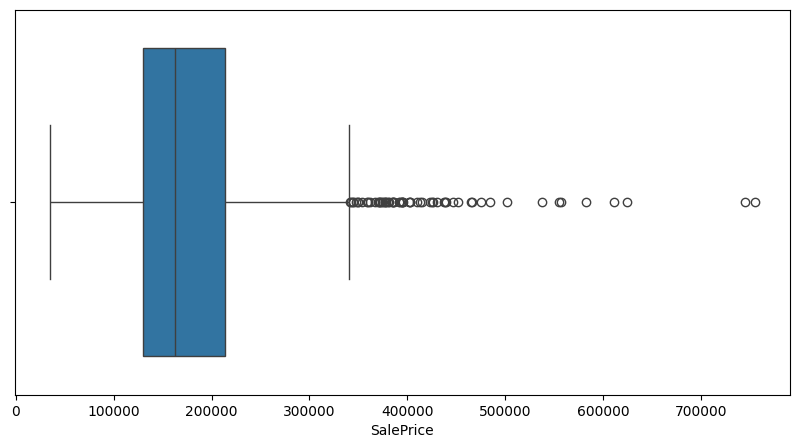

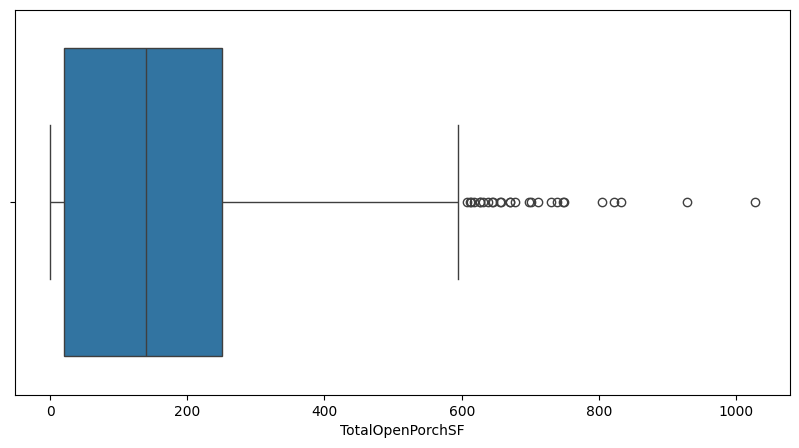

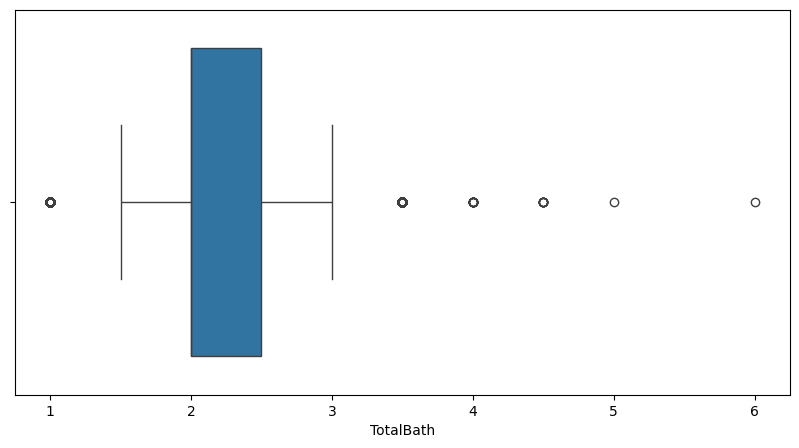

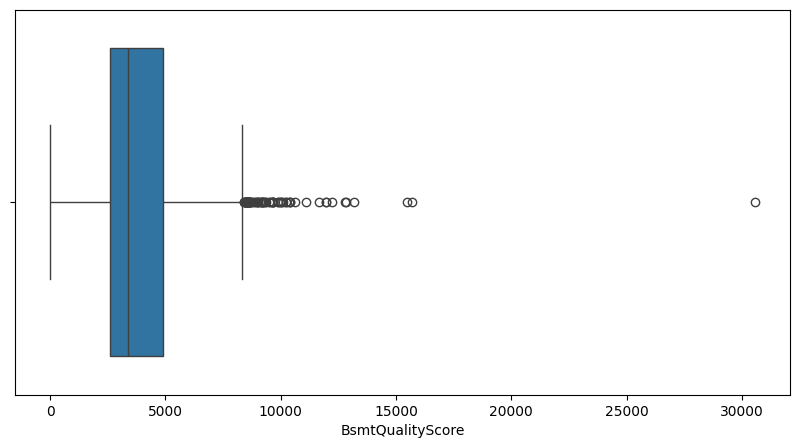

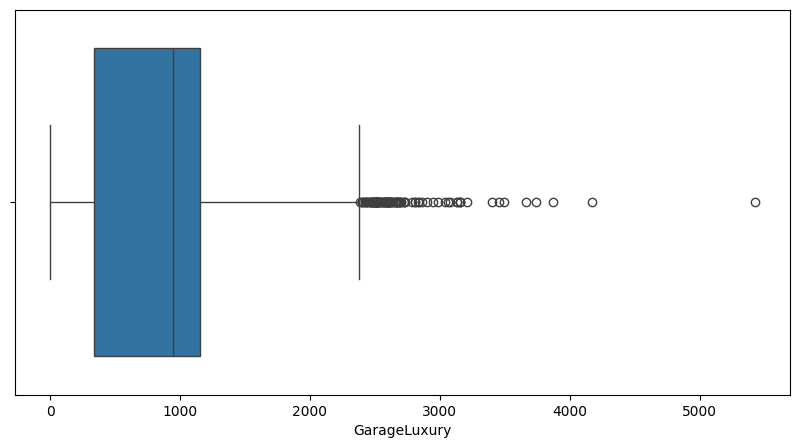

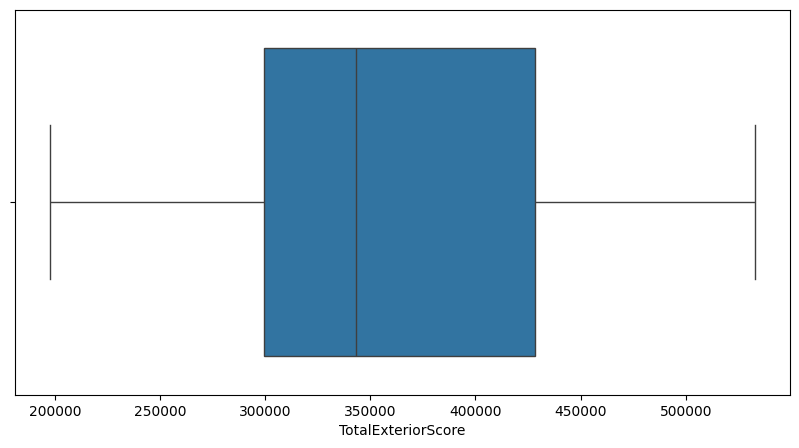

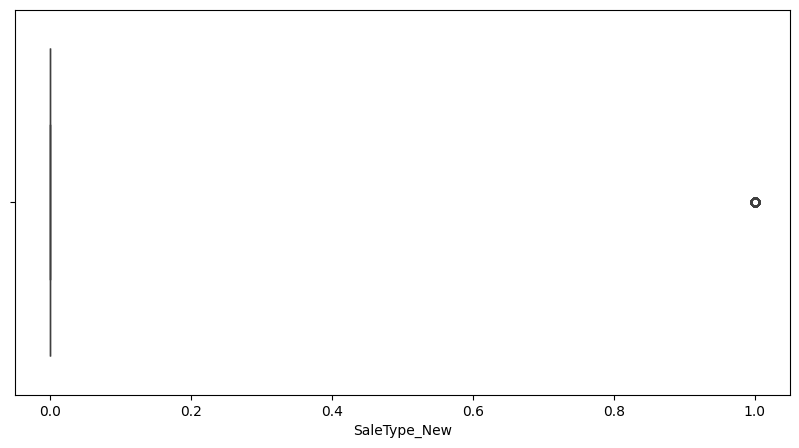

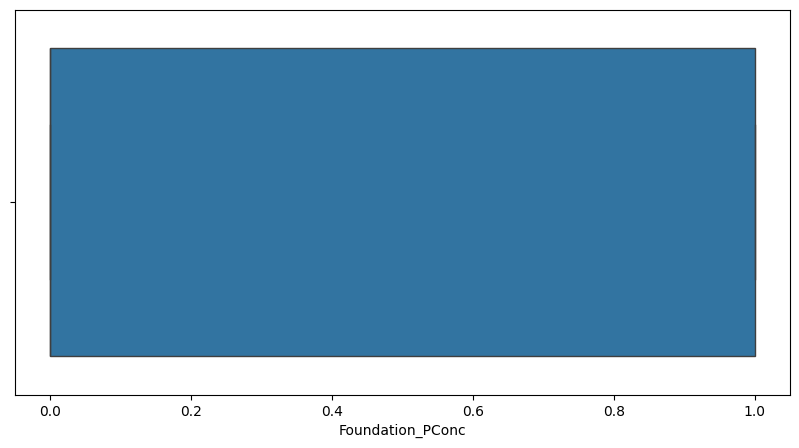

In [ ]:
for col in df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.show()

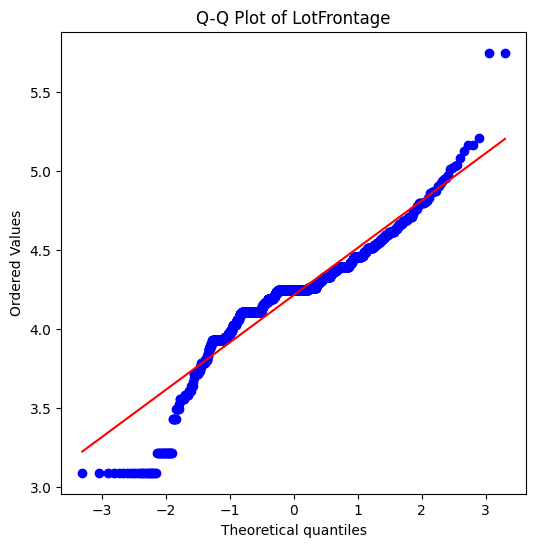

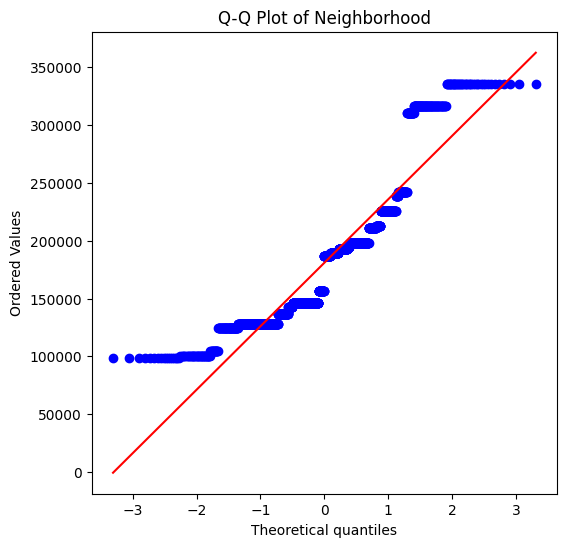

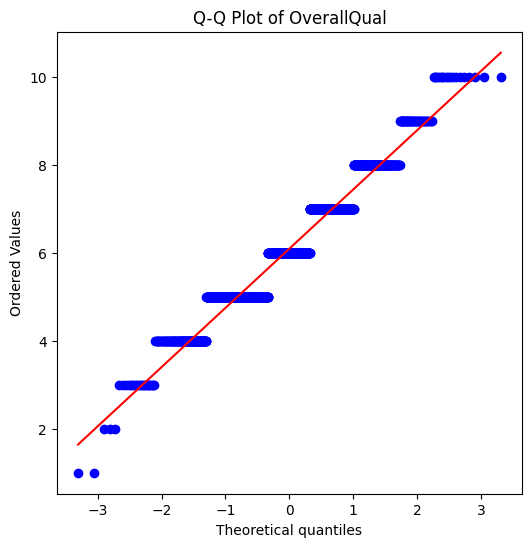

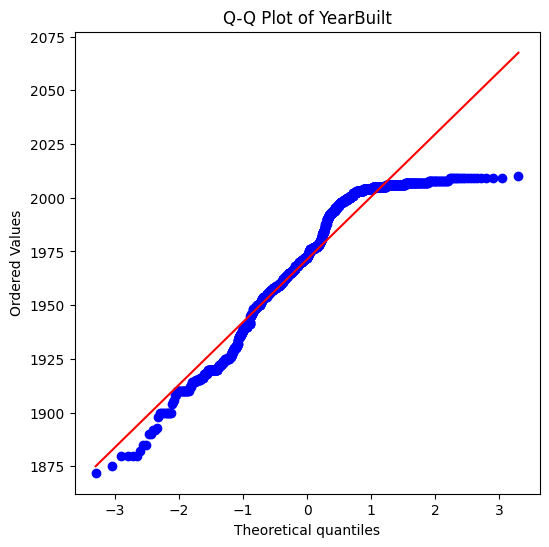

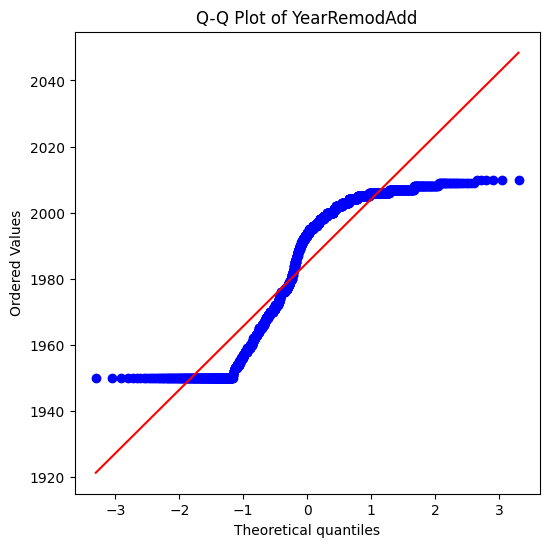

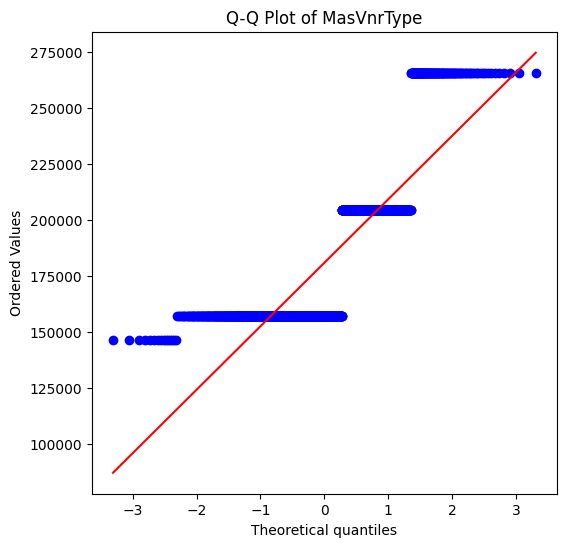

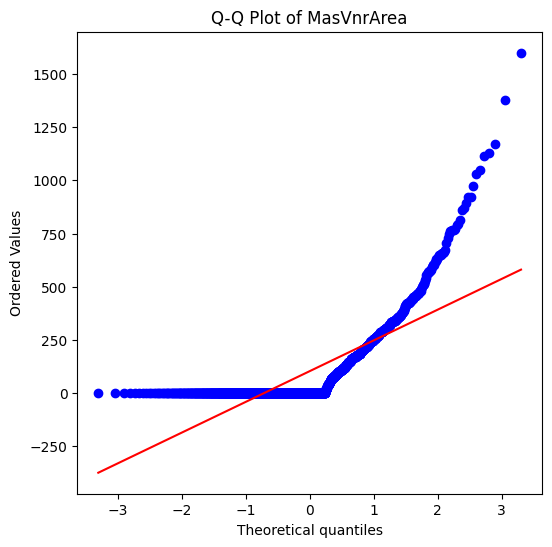

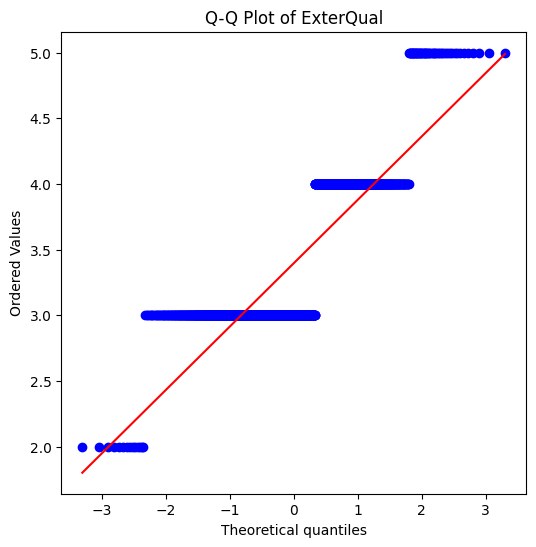

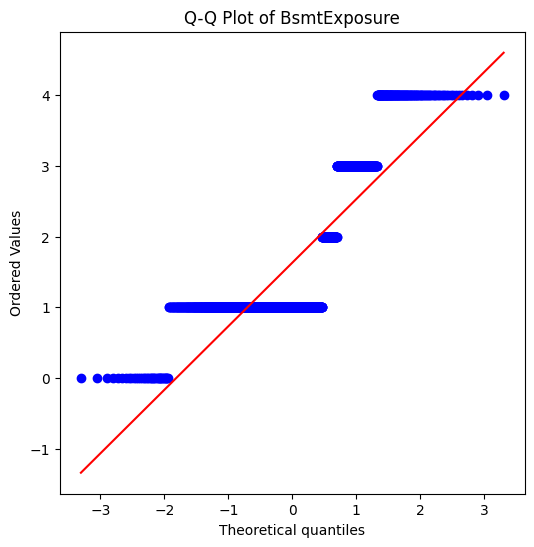

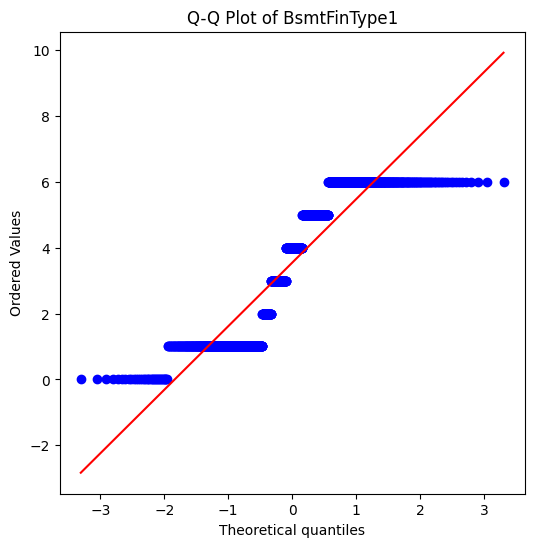

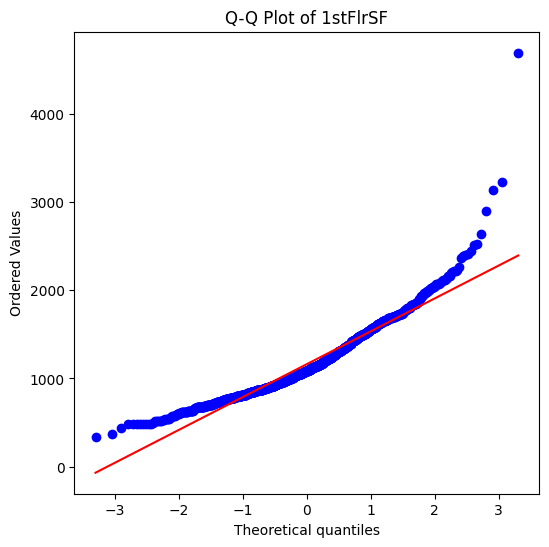

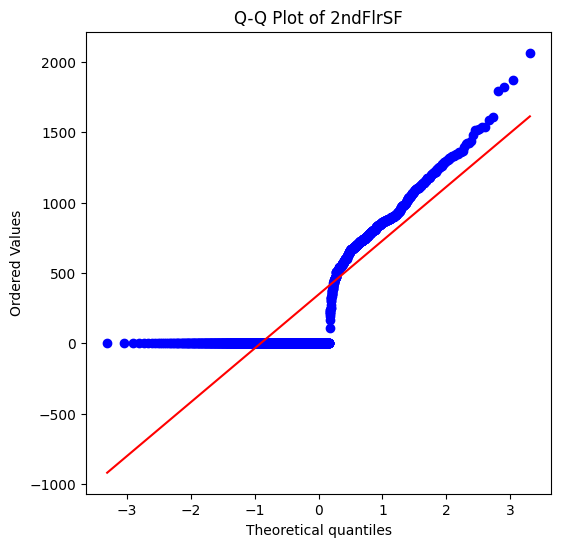

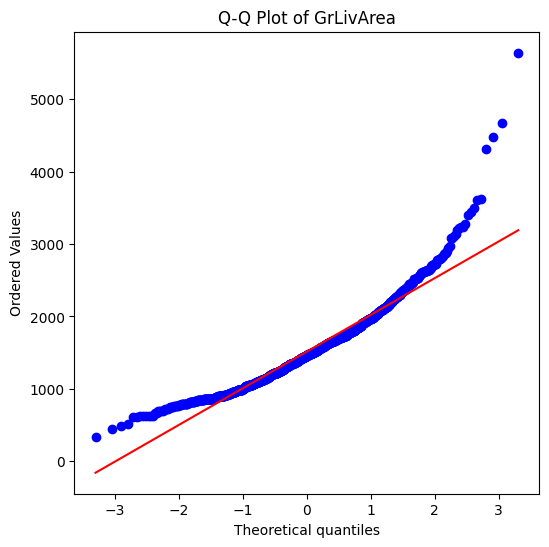

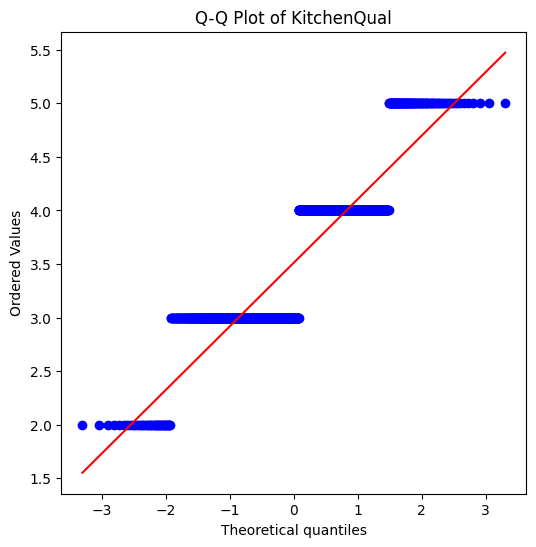

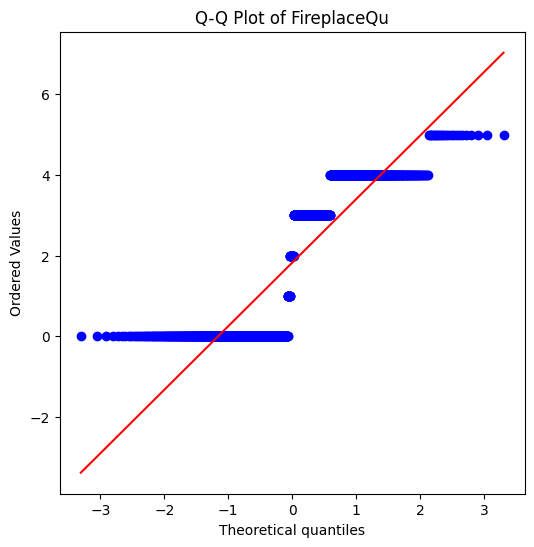

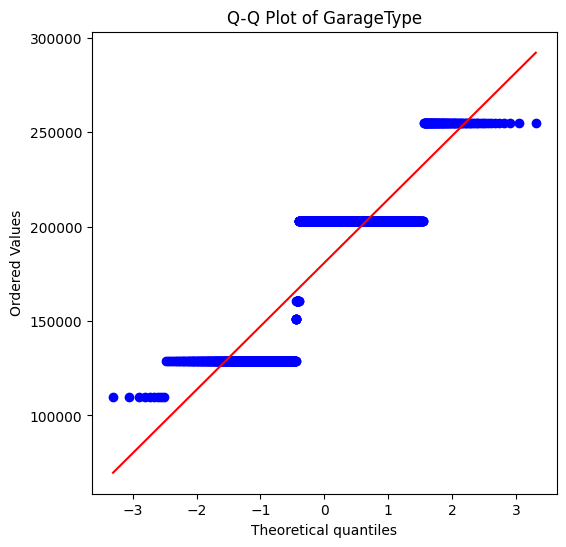

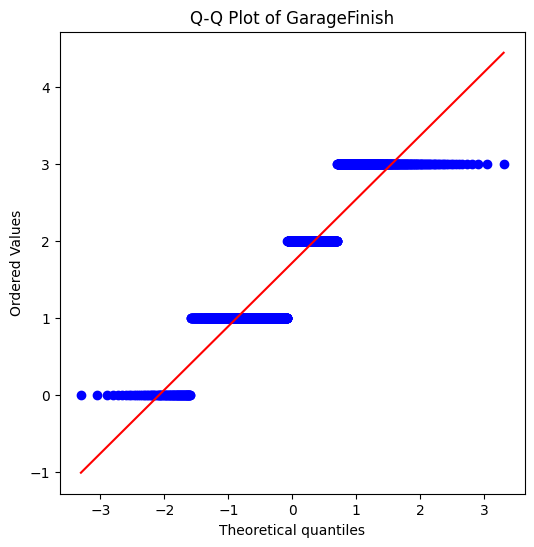

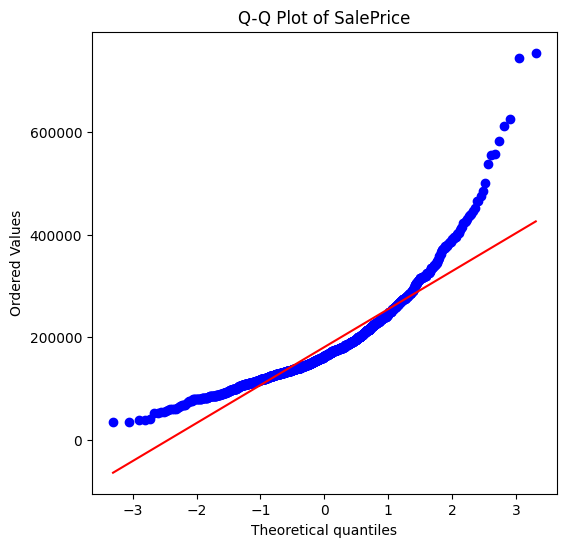

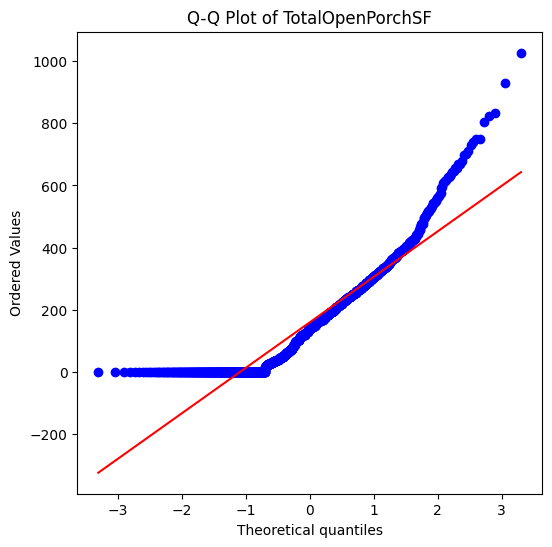

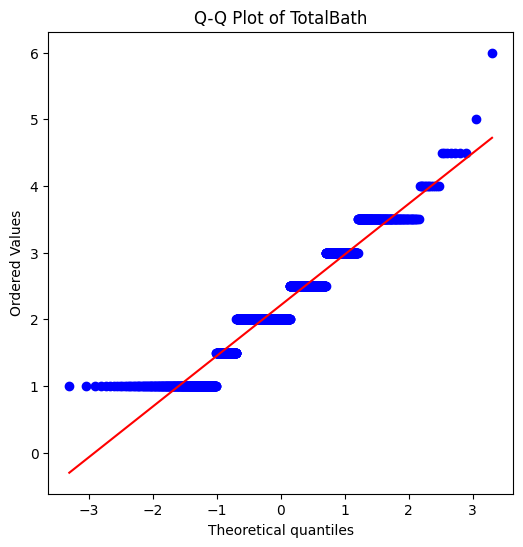

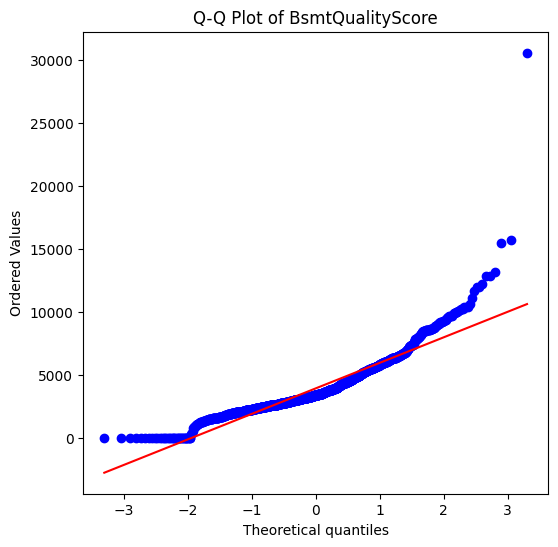

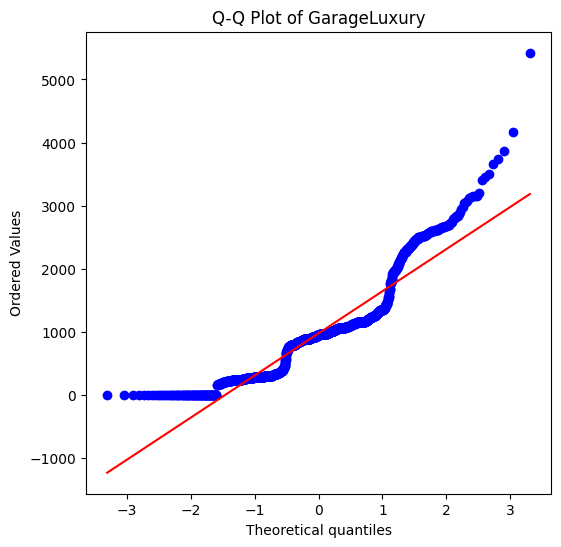

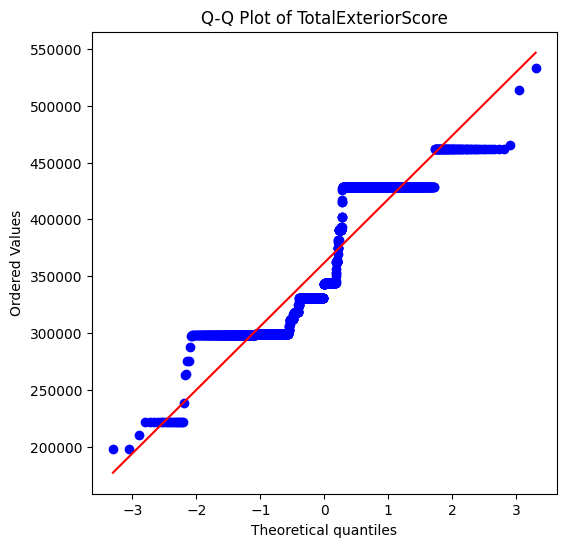

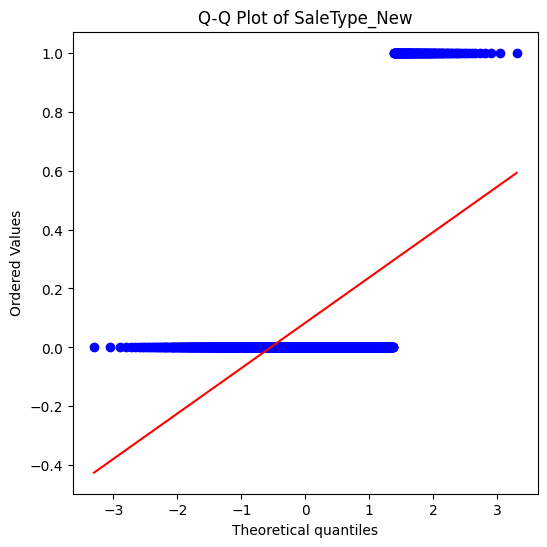

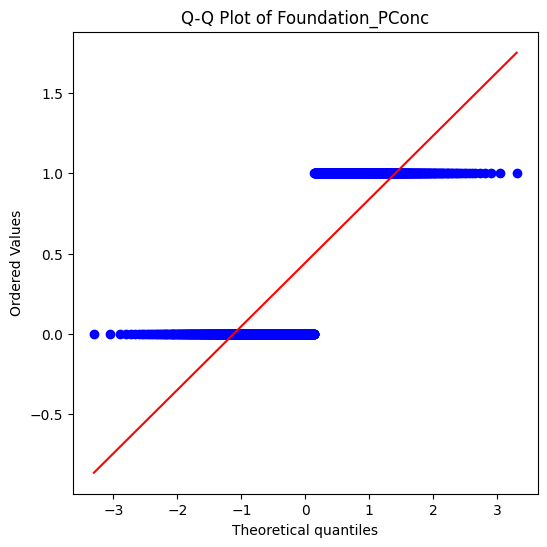

In [ ]:
for col in df.columns:
    plt.figure(figsize=(6, 6))
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {col}")  # Fixing variable reference
    plt.show()

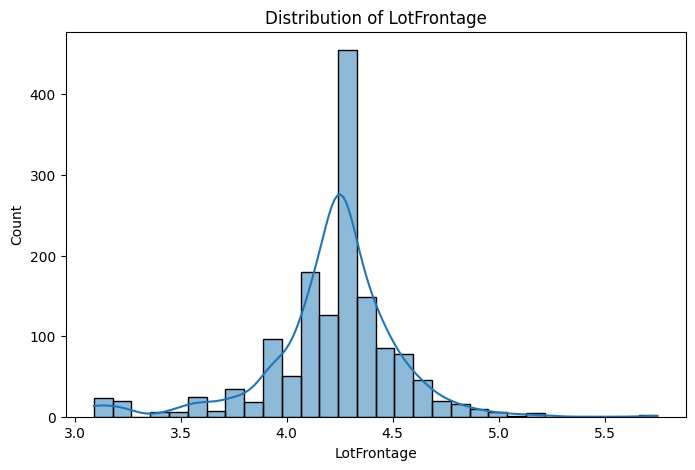

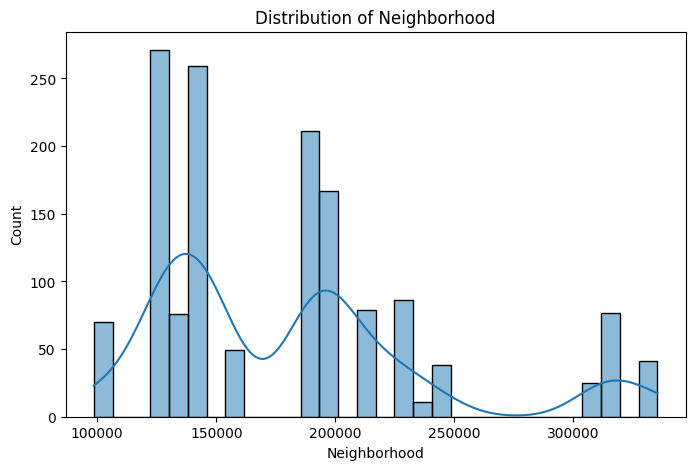

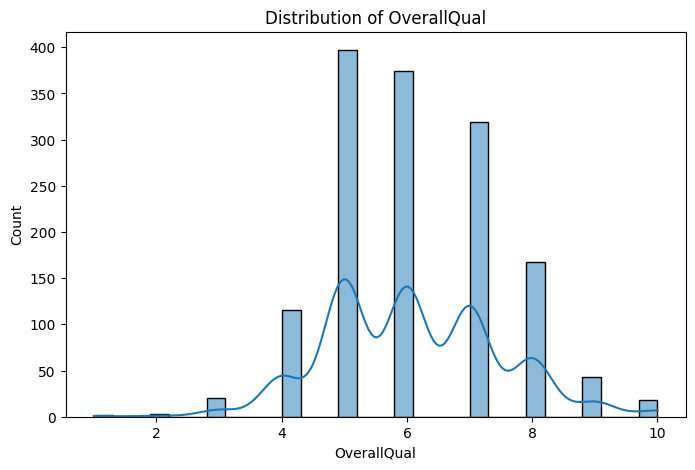

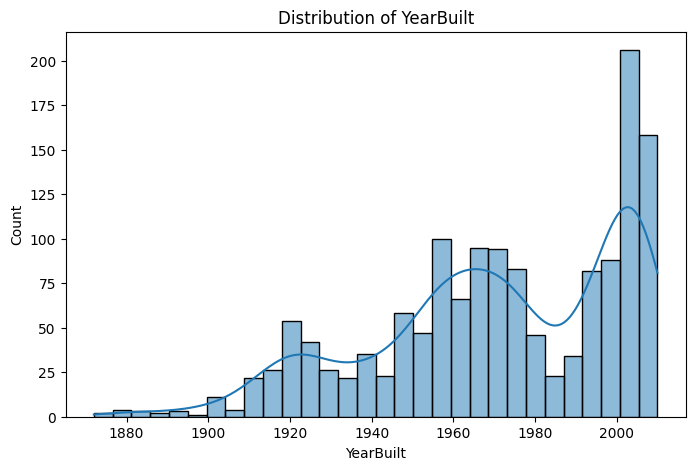

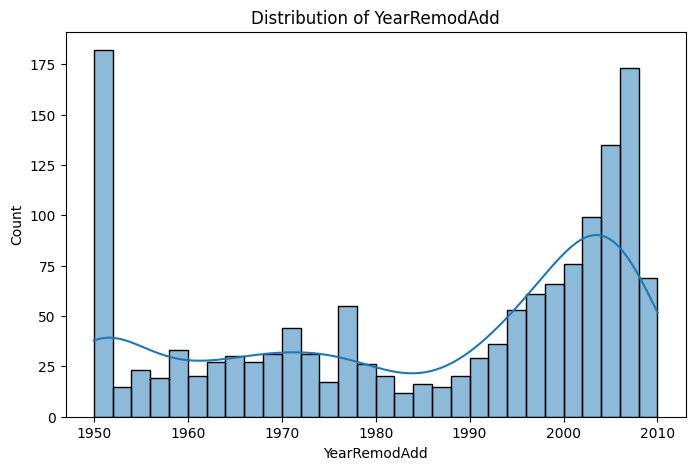

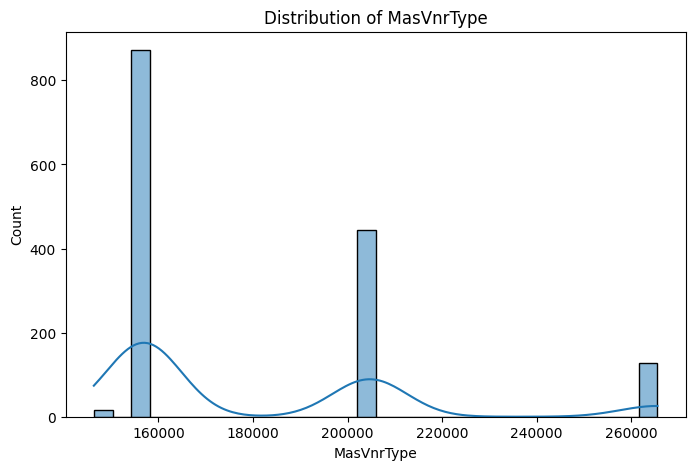

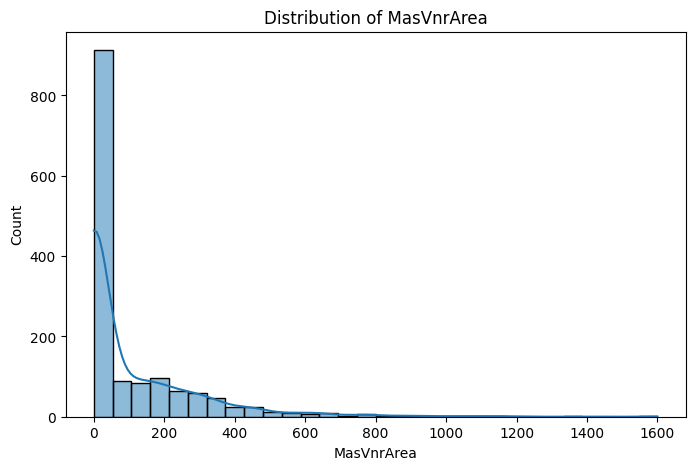

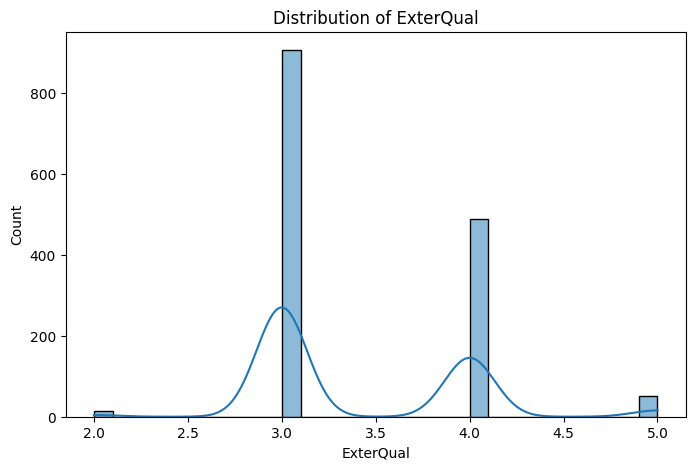

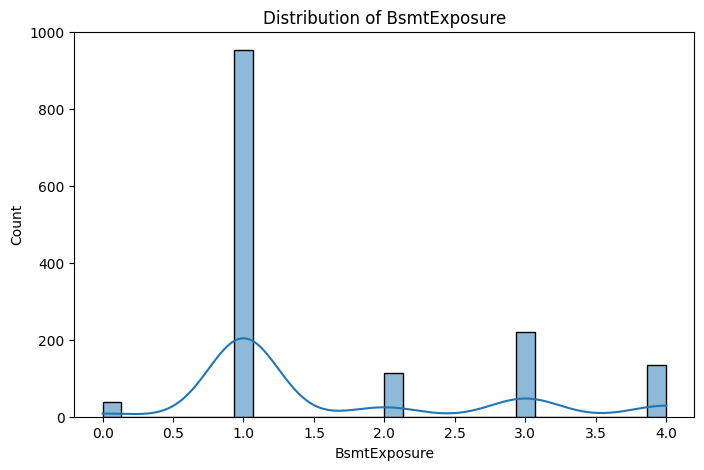

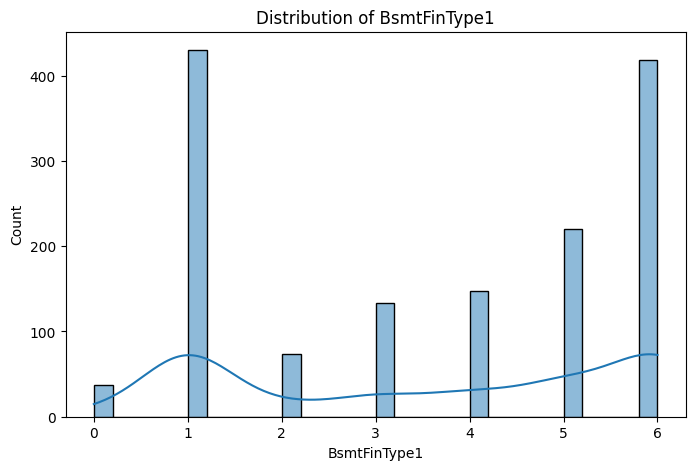

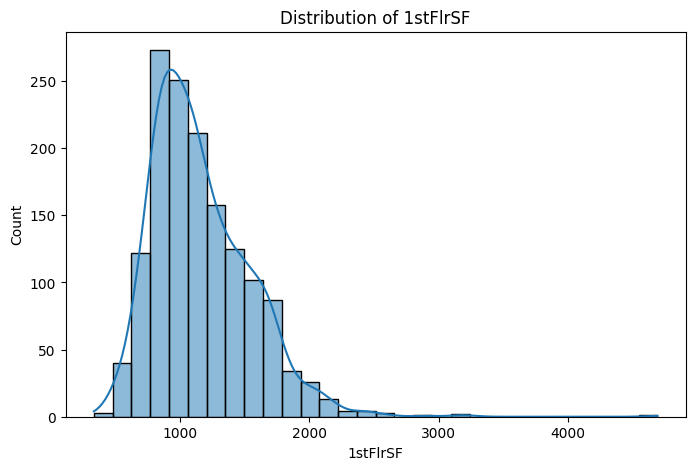

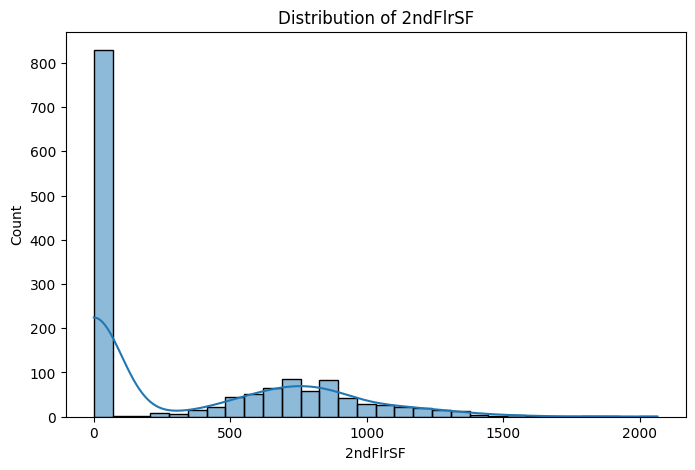

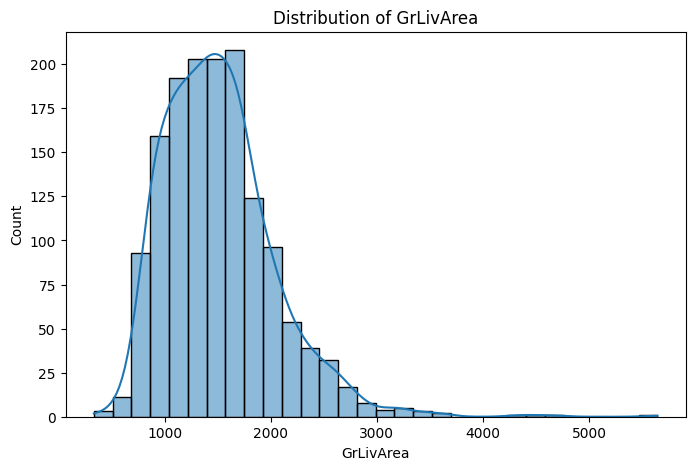

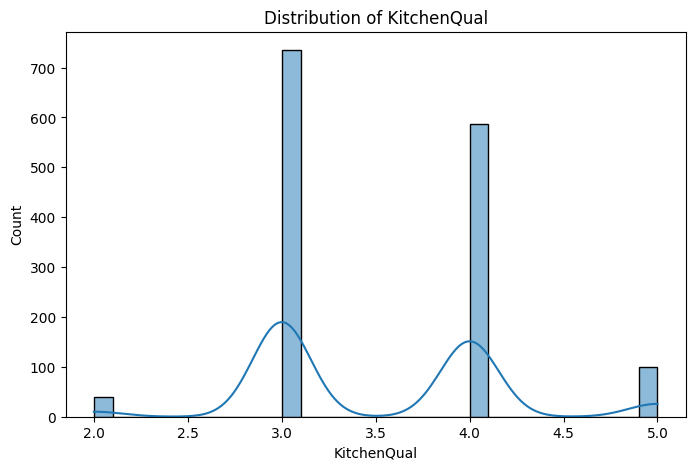

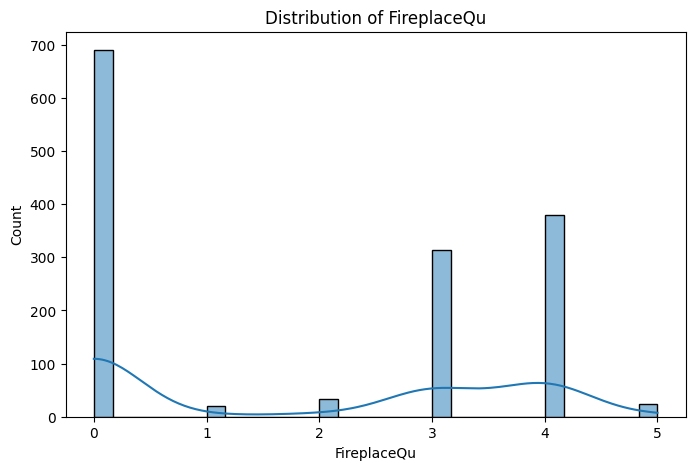

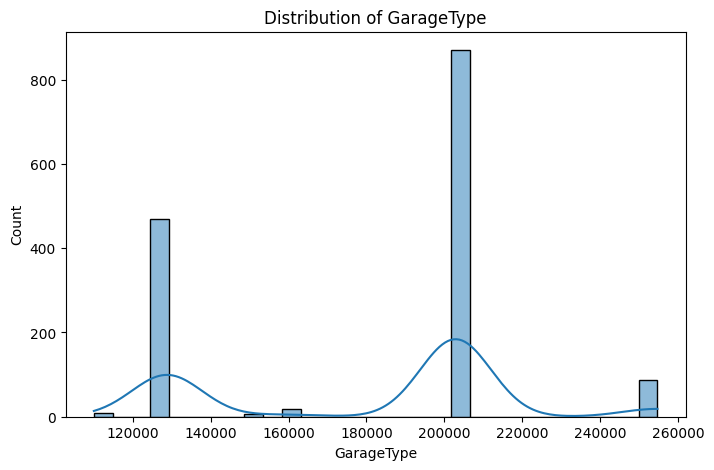

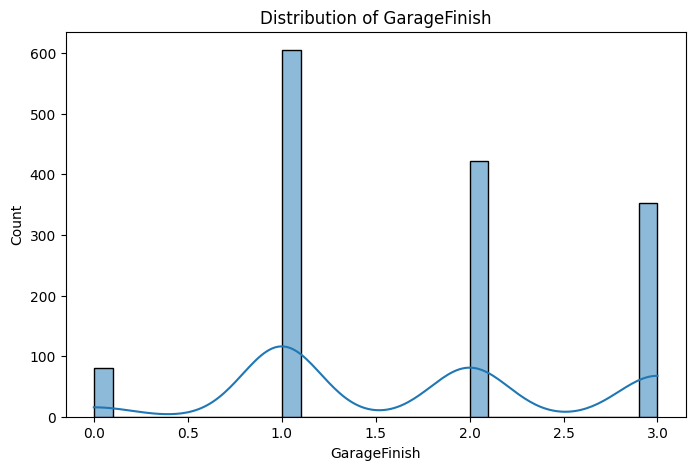

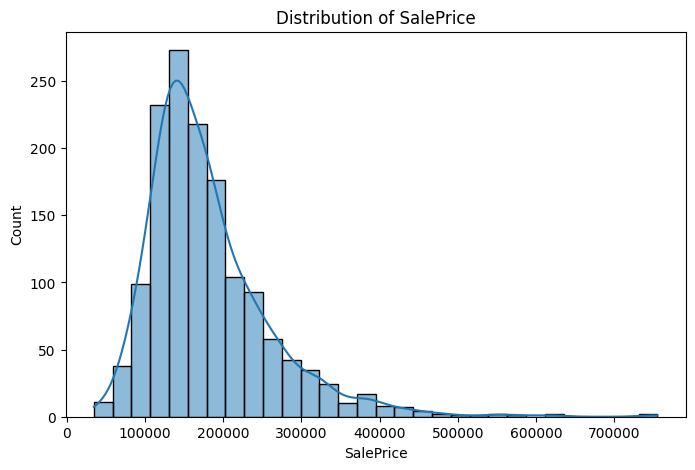

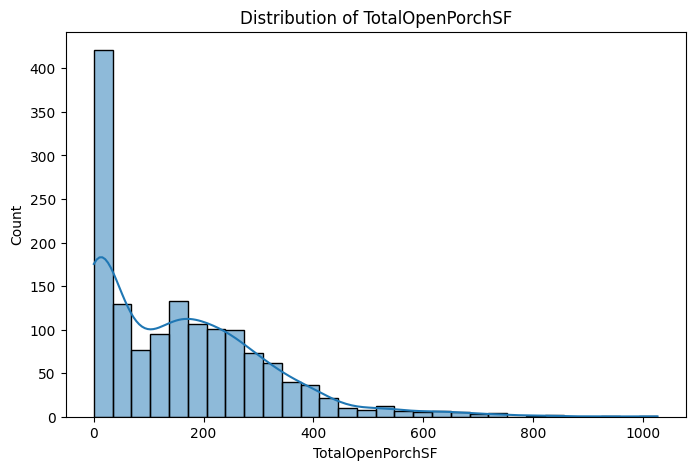

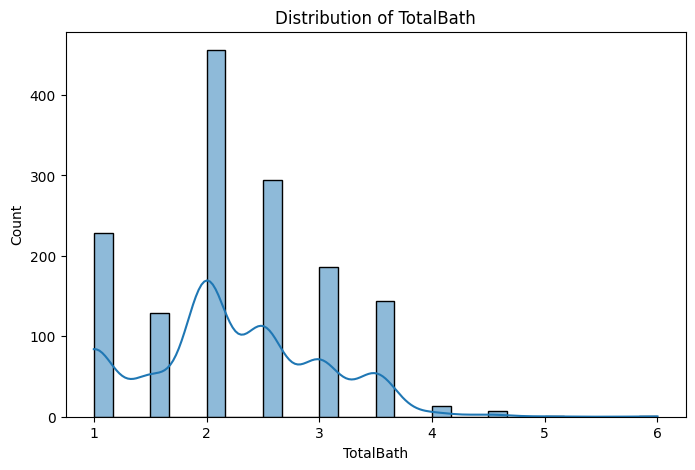

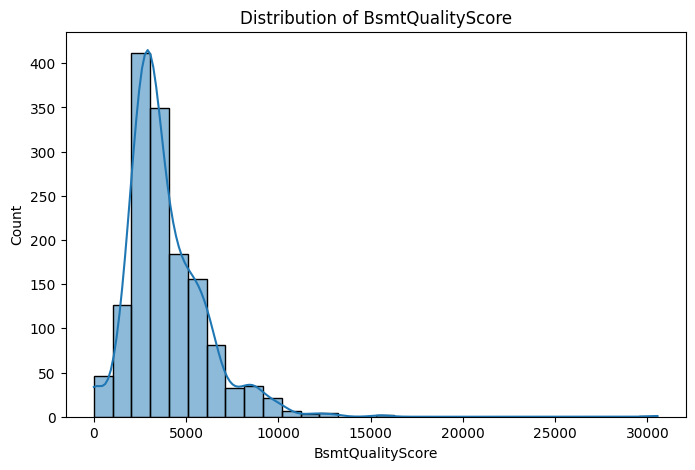

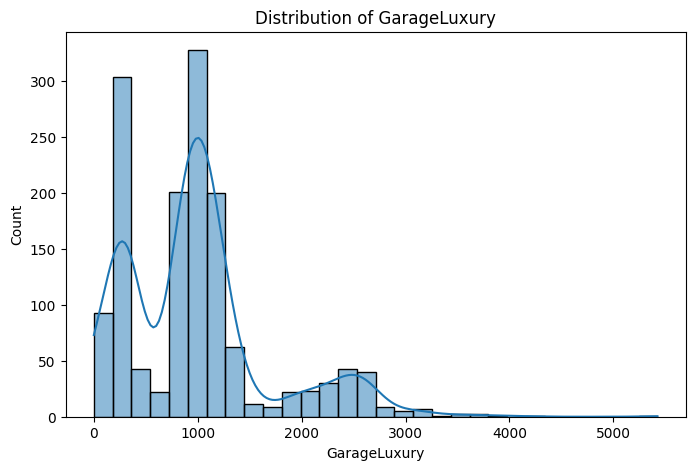

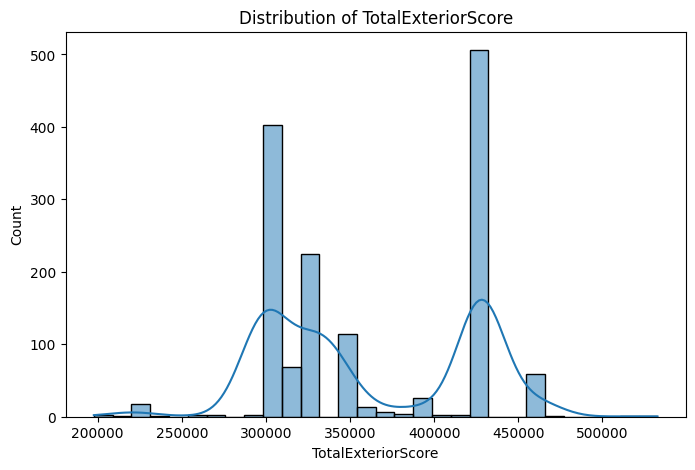

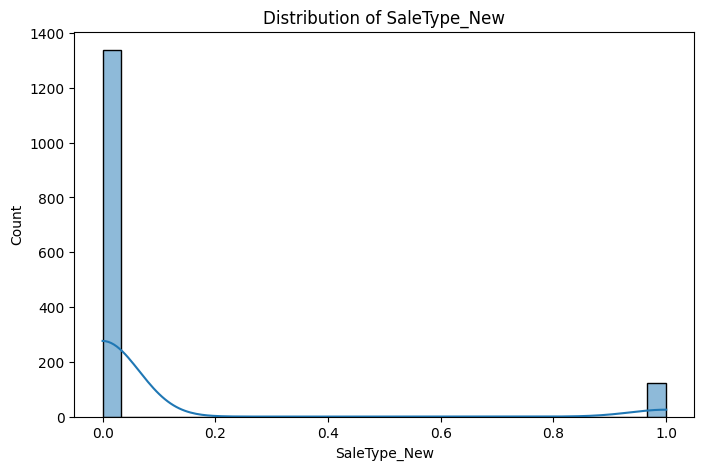

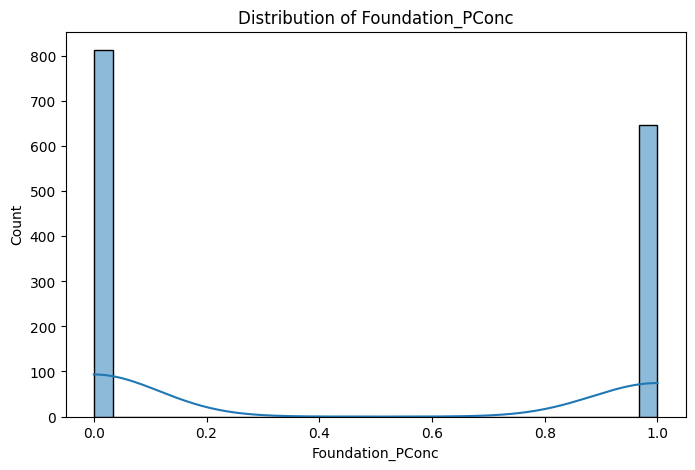

In [ ]:
for col in df.columns:
    # print(df[col].value_counts(dropna=False))

  plt.figure(figsize=(8, 5))
  sns.histplot(df[col], bins=30, kde=True)
  plt.title(f"Distribution of {col}")
  plt.show()

In [ ]:
from sklearn.preprocessing import MaxAbsScaler, RobustScaler


def scale_sparse_features(df, zero_threshold=0.4):
    """
    Identifies features with a high proportion of zeros and applies MaxAbs scaling.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - zero_threshold (float): Minimum proportion of zeros required to apply MaxAbs scaling (default=0.5).

    Returns:
    - pd.DataFrame: DataFrame with scaled sparse features.
    """
    scaler = MaxAbsScaler()

    zero_proportions = (df == 0).mean()
    sparse_features = zero_proportions[zero_proportions >= zero_threshold].index.tolist()

    print(f"Features with >= {zero_threshold * 100}% zeros: {sparse_features}")

    if sparse_features:
        df[sparse_features] = scaler.fit_transform(df[sparse_features])

    return df

In [ ]:
new_df = df
# print("Columns with negative values:", df.columns[(df < 0).any()].tolist())

# # Compute initial skewness
# skewness = df.skew()

# for col, skew in skewness.items():
#     if skew > 0.8:
#         print(f"Before: Feature: {col} | Skewness: {skew:.2f}")

#         # Apply log transformation
#         if col == 'BsmtQualityScore' or col == 'GarageLuxury':
#           continue

#         df[col] = np.log1p(df[col])

#         # Recalculate skewness after transformation
#         new_skew = df[col].skew()
#         print(f"After: Feature: {col} | Skewness: {new_skew:.2f}")

Columns with negative values: []
After: Feature: Neighborhood | Skewness: 3.01
After: Feature: MasVnrType | Skewness: 1.00
After: Feature: MasVnrArea | Skewness: 2.15
After: Feature: ExterQual | Skewness: 0.56
After: Feature: BsmtExposure | Skewness: 0.56
After: Feature: 1stFlrSF | Skewness: 0.56
After: Feature: 2ndFlrSF | Skewness: 0.56
After: Feature: GrLivArea | Skewness: -0.01
After: Feature: SalePrice | Skewness: 0.12
After: Feature: TotalOpenPorchSF | Skewness: -0.90
After: Feature: SaleType_New | Skewness: 3.01


In [ ]:
df = scale_sparse_features(df)

Features with >= 40.0% zeros: ['MasVnrArea', '2ndFlrSF', 'FireplaceQu', 'SaleType_New', 'Foundation_PConc']


In [ ]:
robust_scaler = RobustScaler()
df[:] = robust_scaler.fit_transform(df)

# scaler = StandardScaler()


# df[:] = scaler.fit_transform(df)

# Check the first few rows
print(df.head())


   LotFrontage  Neighborhood  OverallQual  YearBuilt  YearRemodAdd  \
0    -0.217001      0.186521          0.5   0.652174      0.243243   
1     0.538272      0.853599          0.0   0.065217     -0.486486   
2    -0.053065      0.186521          0.5   0.608696      0.216216   
3    -0.507542      0.393459          0.5  -1.260870     -0.648649   
4     0.716039      2.431471          1.0   0.586957      0.162162   

   MasVnrType  MasVnrArea  ExterQual  BsmtExposure  BsmtFinType1  ...  \
0         1.0    1.182521        1.0           0.0           0.4  ...   
1         0.0    0.000000        0.0           3.0           0.2  ...   
2         1.0    0.986941        1.0           1.0           0.4  ...   
3         0.0    0.000000        0.0           0.0           0.2  ...   
4         1.0    2.024372        1.0           2.0           0.4  ...   

   GarageType  GarageFinish  SalePrice  TotalOpenPorchSF  TotalBath  \
0         0.0             0   0.489913         -0.331176        3.0  

<ipython-input-1988-db58f1d731c4>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.5  0.   0.5 ...  0.5 -0.5 -0.5]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[:] = robust_scaler.fit_transform(df).astype('float64')
<ipython-input-1988-db58f1d731c4>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.65217391  0.06521739  0.60869565 ... -0.69565217 -0.5
 -0.17391304]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[:] = robust_scaler.fit_transform(df).astype('float64')
<ipython-input-1988-db58f1d731c4>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.24324324 -0.48648649  0.21621622 ...  0.32432432  0.05405405
 -0.78378378]' has dtype incompatible with int64, please explicitl

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures,MinMaxScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score


# Separate features and target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Split into train (70%), validation (15%), and test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


#  Define Model Pipelines
lasso_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=10000, tol=0.001, random_state=42))
])

ridge_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('ridge', Ridge(random_state=42))
])

poly_pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler()),  # Move scaler here
    ('poly', PolynomialFeatures(include_bias=False)),
    ('ridge', Ridge(random_state=42))
])

lasso_params = {
    'lasso__alpha': np.logspace(-6, 0, 100),
    'lasso__max_iter': [5000, 7000, 9000, 11000]
}

ridge_params = {
    'ridge__alpha': [1000, 100,10,1,0.1]
}

poly_params = {
    'poly__degree': [2, 3],
    'ridge__alpha': [1000, 100, 10,1,0.1]
}
lasso_grid = GridSearchCV(lasso_pipe, param_grid=lasso_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, return_train_score=True)
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, return_train_score=True)
poly_grid = GridSearchCV(poly_pipe, param_grid=poly_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, return_train_score=True)

print(" Tuning Lasso...")
lasso_grid.fit(X_train, y_train)

print("\n Tuning Ridge...")
ridge_grid.fit(X_train, y_train)

print("\n Tuning Polynomial Regression...")
poly_grid.fit(X_train, y_train)

#  Best Hyperparameters
print("\n Best Lasso Alpha:", lasso_grid.best_params_)
print(" Best Ridge Alpha:", ridge_grid.best_params_)
print(" Best Polynomial Degree & Alpha:", poly_grid.best_params_)

#  Model Evaluation Function
def evaluate_model(model, X, y):
    pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, pred))
    r2 = r2_score(y, pred)
    return rmse, r2

#  Training Results
print("\nTraining Results:")
for name, model in [('Lasso', lasso_grid.best_estimator_), ('Ridge', ridge_grid.best_estimator_), ('Polynomial', poly_grid.best_estimator_)]:
    rmse, r2 = evaluate_model(model, X_train, y_train)
    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.4f}")


#  Validation Results
print("\nValidation Results:")
for name, model in [('Lasso', lasso_grid.best_estimator_), ('Ridge', ridge_grid.best_estimator_), ('Polynomial', poly_grid.best_estimator_)]:
    rmse, r2 = evaluate_model(model, X_val, y_val)
    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.4f}")

#  Test Results
print("\nTest Results:")
for name, model in [('Lasso', lasso_grid.best_estimator_), ('Ridge', ridge_grid.best_estimator_), ('Polynomial', poly_grid.best_estimator_)]:
    rmse, r2 = evaluate_model(model, X_test, y_test)
    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.4f}")


 Tuning Lasso...

 Tuning Ridge...

 Tuning Polynomial Regression...

 Best Lasso Alpha: {'lasso__alpha': np.float64(0.007564633275546291), 'lasso__max_iter': 5000}
 Best Ridge Alpha: {'ridge__alpha': 100}
 Best Polynomial Degree & Alpha: {'poly__degree': 3, 'ridge__alpha': 1}

Training Results:
Lasso: RMSE = 0.30, R² = 0.8595
Ridge: RMSE = 0.30, R² = 0.8570
Polynomial: RMSE = 0.21, R² = 0.9324

Validation Results:
Lasso: RMSE = 0.30, R² = 0.8700
Ridge: RMSE = 0.31, R² = 0.8654
Polynomial: RMSE = 0.31, R² = 0.8686

Test Results:
Lasso: RMSE = 0.28, R² = 0.8777
Ridge: RMSE = 0.28, R² = 0.8795
Polynomial: RMSE = 0.26, R² = 0.8961


In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    poly_grid.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error'
)

train_scores = -train_scores
val_scores = -val_scores

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

In [ ]:
def plot_learning_curve(model, X, y, cv=5):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=cv, scoring='neg_mean_squared_error'
    )

    train_scores = -train_scores
    val_scores = -val_scores

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Training Error", color="blue", marker="o")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)

    plt.plot(train_sizes, val_mean, label="Validation Error", color="red", marker="o")
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="red", alpha=0.2)

    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.title("Learning Curve")
    plt.legend()
    plt.grid(True)
    plt.show()


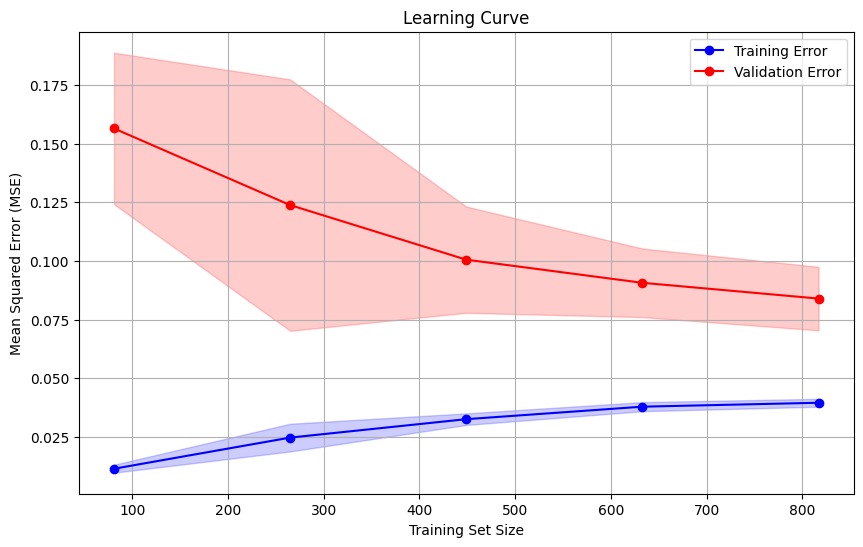

In [ ]:
plot_learning_curve(poly_grid.best_estimator_, X_train, y_train, cv=5)

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X_train, y_train, X_test, y_test, cv=5):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error'
    )

    train_scores = -train_scores  # Convert negative MSE to positive
    val_scores = -val_scores

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Compute test set error for different training sizes
    test_errors = []
    for size in train_sizes:
        model.fit(X_train[:size], y_train[:size])  # Train on subset
        test_pred = model.predict(X_test)
        test_mse = mean_squared_error(y_test, test_pred)
        test_errors.append(test_mse)

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Training Error", color="blue", marker="o")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)

    plt.plot(train_sizes, val_mean, label="Validation Error", color="red", marker="o")
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="red", alpha=0.2)

    plt.plot(train_sizes, test_errors, label="Test Error", color="green", marker="o")

    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.title("Learning Curve")
    plt.legend()
    plt.grid(True)
    plt.show()


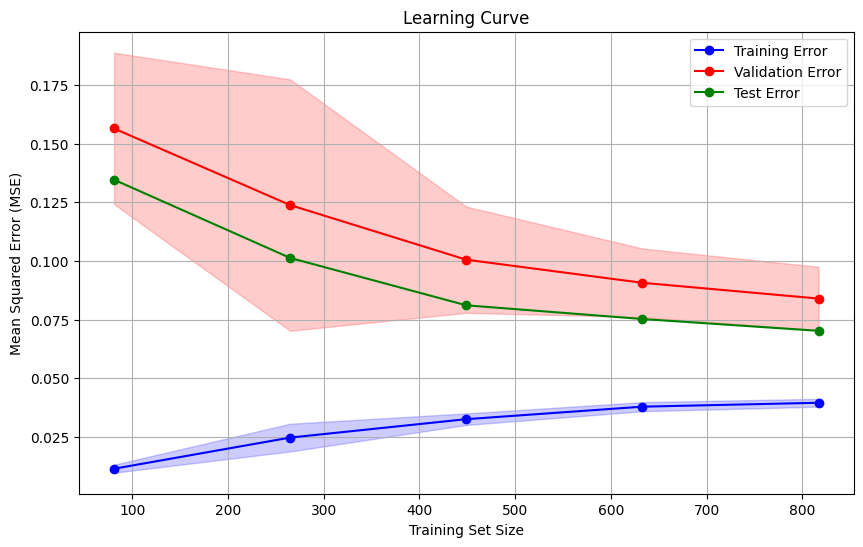

In [ ]:
plot_learning_curve(poly_grid.best_estimator_, X_train, y_train,  X_test, y_test, cv=5)

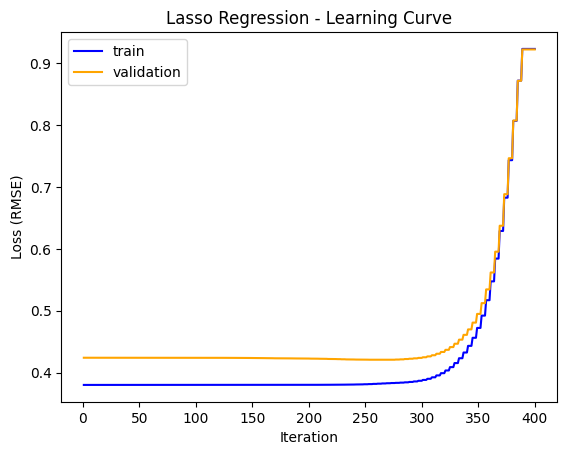

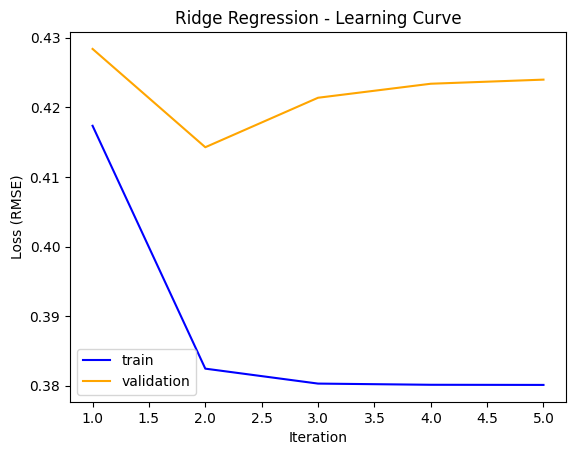

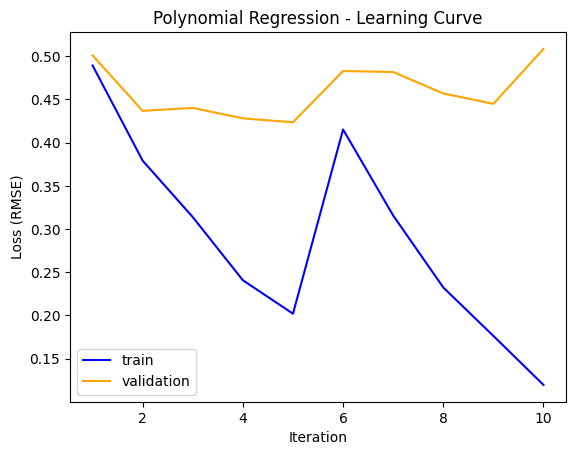

In [ ]:

def plot_learning_curve(grid, title):
    train_sizes = np.arange(1, len(grid.cv_results_['mean_train_score']) + 1)

    train_loss = -grid.cv_results_['mean_train_score']
    val_loss = -grid.cv_results_['mean_test_score']

    plt.plot(train_sizes, train_loss, label='train', color='blue')
    plt.plot(train_sizes, val_loss, label='validation', color='orange')

    plt.title(title)
    plt.xlabel("Iteration")
    plt.ylabel("Loss (RMSE)")
    plt.legend()
    plt.show()

# Plot learning curves for each model
plot_learning_curve(lasso_grid, "Lasso Regression - Learning Curve")
plot_learning_curve(ridge_grid, "Ridge Regression - Learning Curve")
plot_learning_curve(poly_grid, "Polynomial Regression - Learning Curve")
